In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

Machine Learning

1. Supervised learning:
<br>
We have a target variable (label), which we try to predict as accurately as possible.
<br>
<br>
1.1. Regression problems:
<br>
The target variable is a continuous number, like income or house price.
<br>
<br>
1.2. Classification problems:
<br>
The target variable is a class, either binary or multi-class.  
<br>
For example, whether a borrower will default (or not) in next 12 months; or the customer satisfaction (bad, neutral, good, etc.)

2. Unsupervised learning:
<br>
There is no target, we try to use different techniques to draw some insights from the data.

<br>
<br>

In this Handout, we will work on a binary classification problem in the financial industry.
<br>
<br>
The dataset used in the handout was collected in a Taiwanese bank in October 2005, which is contributed to the UC Irvine Machine Learning Repository.
<br>
<br>
The original data file can be found at https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

The goal of this study was to use some basic information about customers (i.e., gender, age, education level), together with their past repayment history, to predict which of them were likely to default.
<br>
<br>
To bespecific, we will use the previous 6-month repayment history (April - September 2005) to predict whether customers will default in October 2005.

<br>
<br>

1. Preparing the dataset:

In [3]:
import pandas as pd

1.1 Load the data from the CSV file:

In [4]:
df = pd.read_csv("../Handout15/credit_card_default.csv", 
                 na_values="")
df

limit_bal     sex    education marriage   age  \
0          20000  Female   University  Married  24.0   
1         120000  Female   University   Single  26.0   
2          90000  Female   University   Single  34.0   
3          50000  Female   University  Married  37.0   
4          50000    Male   University  Married  57.0   
...          ...     ...          ...      ...   ...   
29995     220000     NaN  High school  Married  39.0   
29996     150000    Male  High school   Single  43.0   
29997      30000    Male   University   Single  37.0   
29998      80000    Male  High school  Married  41.0   
29999      50000    Male   University  Married  46.0   

             payment_status_sep        payment_status_aug  \
0      Payment delayed 2 months  Payment delayed 2 months   
1                    Payed duly  Payment delayed 2 months   
2                       Unknown                   Unknown   
3                       Unknown                   Unknown   
4                    Payed duly                   Unknown   
...                         ...                       ...   
29995                   Unknown                   Unknown   
29996                Payed duly                Payed duly   
29997  Payment delayed 4 months  Payment delayed 3 months   
29998   Payment delayed 1 month                Payed duly   
29999                   Unknown                   Unknown   

             payment_status_jul payment_status_jun payment_status_may  ...  \
0                    Payed duly         Payed duly            Unknown  ...   
1                       Unknown            Unknown            Unknown  ...   
2                       Unknown            Unknown            Unknown  ...   
3                       Unknown            Unknown            Unknown  ...   
4                    Payed duly            Unknown            Unknown  ...   
...                         ...                ...                ...  ...   
29995                   Unknown            Unknown            Unknown  ...   
29996                Payed duly         Payed duly            Unknown  ...   
29997  Payment delayed 2 months         Payed duly            Unknown  ...   
29998                   Unknown            Unknown            Unknown  ...   
29999                   Unknown            Unknown            Unknown  ...   

      bill_statement_jun  bill_statement_may  bill_statement_apr  \
0                      0                   0                   0   
1                   3272                3455                3261   
2                  14331               14948               15549   
3                  28314               28959               29547   
4                  20940               19146               19131   
...                  ...                 ...                 ...   
29995              88004               31237               15980   
29996               8979                5190                   0   
29997              20878               20582               19357   
29998              52774               11855               48944   
29999              36535               32428               15313   

       previous_payment_sep  previous_payment_aug  previous_payment_jul  \
0                         0                   689                     0   
1                         0                  1000                  1000   
2                      1518                  1500                  1000   
3                      2000                  2019                  1200   
4                      2000                 36681                 10000   
...                     ...                   ...                   ...   
29995                  8500                 20000                  5003   
29996                  1837                  3526                  8998   
29997                     0                     0                 22000   
29998                 85900                  3409                  1178   
29999                 

1.2 View the summary of the DataFrame:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_bal                   30000 non-null  int64  
 1   sex                         29850 non-null  object 
 2   education                   29850 non-null  object 
 3   marriage                    29850 non-null  object 
 4   age                         29850 non-null  float64
 5   payment_status_sep          30000 non-null  object 
 6   payment_status_aug          30000 non-null  object 
 7   payment_status_jul          30000 non-null  object 
 8   payment_status_jun          30000 non-null  object 
 9   payment_status_may          30000 non-null  object 
 10  payment_status_apr          30000 non-null  object 
 11  bill_statement_sep          30000 non-null  int64  
 12  bill_statement_aug          30000 non-null  int64  
 13  bill_statement_jul          300

Variables:
<br>
<br>
0: the amount of the given credit (NT dollars);
<br>
1: biological sex;
<br>
2: level of education;
<br>
3: marital status;
<br>
4: age of the customer;
<br>
 5 ~ 10: status of payments in one of the previous 6 months;
<br>
 11 ~ 16: the number of bill statements in one of the previous 6 months;
<br>
 17 ~ 22: the number of previous payments in one of the previous 6 months;
<br>
 23: the target variable indiciting whether the customer will default in October 2005.
<br>

Datatype:
<br>
<br>
1. float: floating-point numbers, such as 3.14;
<br>
2. integer;
<br>
3. object: this stands for string variables in Pandas.

1.3 Define a function for inspecting the exact memory usage of a DataFrame:

In [6]:
def get_df_memory_usage(df, top_columns=5):
    """
    Function for quick analysis of a pandas DataFrame's memory usage.
    It prints the top `top_columns` columns in terms of memory usage 
    and the total usage of the DataFrame.
    
    Parameters
    ------------
    df : pd.DataFrame
        DataFrame to be inspected
    top_columns : int
        Number of top columns (in terms of memory used) to display
    """
    print("Memory usage ----")
    memory_per_column = df.memory_usage(deep=True) / (1024 ** 2)
    print(f"Top {top_columns} columns by memory (MB):")
    print(memory_per_column.sort_values(ascending=False) \
                           .head(top_columns))
    print(f"Total size: {memory_per_column.sum():.2f} MB")

In [7]:
get_df_memory_usage(df, 5)

Memory usage ----
Top 5 columns by memory (MB):
education             1.965001
payment_status_sep    1.954342
payment_status_aug    1.920288
payment_status_jul    1.916343
payment_status_jun    1.904229
dtype: float64
Total size: 20.47 MB


From above, it is clear even a small dataset can use a lot of memory.
<br>
<br>
So we need to keep the memory-saving principles in mind.
<br>
<br>
Below are some trearment we can do to save memory. 

1.3.1 First of all, the object data-type use a lot of memory.  We can covert it to pandas-native "category" type.
<br>
<br>
Convert the columns with object data type into category type:

In [8]:
object_columns = df.select_dtypes(include="object").columns
df[object_columns] = df[object_columns].astype("category")

get_df_memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
bill_statement_sep      0.228882
bill_statement_aug      0.228882
previous_payment_apr    0.228882
previous_payment_may    0.228882
previous_payment_jun    0.228882
dtype: float64
Total size: 3.70 MB


After the first step, we save almost 80% memory.

1.3.2 Next, for the numbers stored as int64, some of them are just number of month (range 1-12).
<br>
So, we don't need 64bytes space to store them.  We can convert them from in64 to int8 or uint8, which are only 8bytes.
<br>
<br>
Downcast the numeric columns to integers:

In [9]:
numeric_columns = df.select_dtypes(include="number").columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], downcast="integer")

get_df_memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
age                     0.228882
bill_statement_sep      0.114441
limit_bal               0.114441
previous_payment_jun    0.114441
previous_payment_jul    0.114441
dtype: float64
Total size: 2.01 MB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   30000 non-null  int32   
 1   sex                         29850 non-null  category
 2   education                   29850 non-null  category
 3   marriage                    29850 non-null  category
 4   age                         29850 non-null  float64 
 5   payment_status_sep          30000 non-null  category
 6   payment_status_aug          30000 non-null  category
 7   payment_status_jul          30000 non-null  category
 8   payment_status_jun          30000 non-null  category
 9   payment_status_may          30000 non-null  category
 10  payment_status_apr          30000 non-null  category
 11  bill_statement_sep          30000 non-null  int32   
 12  bill_statement_aug          30000 non-null  int32   
 13  bill_statement_j

1.3.3 Lastly, the age is encoded using a float data-type.  But still, we don't need float64 to store it, considering age mostly like ranges 0-99.
<br>
<br>
Downcast the age column using the float data type:

In [11]:
df["age"] = pd.to_numeric(df["age"], downcast="float")

get_df_memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
bill_statement_sep      0.114441
limit_bal               0.114441
previous_payment_jun    0.114441
previous_payment_jul    0.114441
previous_payment_aug    0.114441
dtype: float64
Total size: 1.90 MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   30000 non-null  int32   
 1   sex                         29850 non-null  category
 2   education                   29850 non-null  category
 3   marriage                    29850 non-null  category
 4   age                         29850 non-null  float32 
 5   payment_status_sep          30000 non-null  category
 6   payment_status_aug          30000 non-null  category
 7   payment_status_jul          30000 non-null  category
 8   payment_status_jun          30000 non-null  category
 9   payment_status_may          30000 non-null  category
 10  payment_status_apr          30000 non-null  category
 11  bill_statement_sep          30000 non-null  int32   
 12  bill_statement_aug          30000 non-null  int32   
 13  bill_statement_j

Alternatively, the dataset can be too large that cannot fit into the memory in the first place. In that case, we can
<br>
<br>
1. Use "chunk" argument of pd.read_csv to load the dataset in chunks;
<br>
<br>
2. Use "usecols" argument of pd.read_csv to load only the columns we actually need;
<br>
<br>
3. Directly define the data types with "column_dtypes" argument when loading the data.

In [ ]:
# column_dtypes = {
#     "education": "category", 
#     "marriage": "category", 
#     "sex": "category"
# }
# df_cat = pd.read_csv("../Datasets/credit_card_default.csv", 
#                      na_values="", dtype=column_dtypes)

# get_df_memory_usage(df_cat)

<br>
<br>

2. Exploratory data analysis (EDA)

Next, we will conduct exploratory data analysis.  
<br>
By doing so, we get to know the data we are supposed to work with.  We should able to answer the following questions:
<br>
<br>
1. what kind of data we have and how should we treat them?
2. what is the distribution of the variables?
3. are the any outliers?
4. are any transformations required? For example, we might need log transformation to make the data normally distributed.
5. does the distribution vary per group (male vs. female)? 
6. do we have missing data?
7. is there a linear relationship between variables?
8. can we create new features using the existing data?
9. are there any irralevent variables we can remove?

In [ ]:
# import pandas as pd
# df = pd.read_csv("../Datasets/credit_card_default.csv", na_values="")

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio

2.1 Get summary statistics of the numeric variables:

In [14]:
df.describe().transpose().round(2)

count       mean        std       min       25%  \
limit_bal                   30000.0  167484.32  129747.66   10000.0  50000.00   
age                         29850.0      35.49       9.22      21.0     28.00   
bill_statement_sep          30000.0   51223.33   73635.86 -165580.0   3558.75   
bill_statement_aug          30000.0   49179.08   71173.77  -69777.0   2984.75   
bill_statement_jul          30000.0   47013.15   69349.39 -157264.0   2666.25   
bill_statement_jun          30000.0   43262.95   64332.86 -170000.0   2326.75   
bill_statement_may          30000.0   40311.40   60797.16  -81334.0   1763.00   
bill_statement_apr          30000.0   38871.76   59554.11 -339603.0   1256.00   
previous_payment_sep        30000.0    5663.58   16563.28       0.0   1000.00   
previous_payment_aug        30000.0    5921.16   23040.87       0.0    833.00   
previous_payment_jul        30000.0    5225.68   17606.96       0.0    390.00   
previous_payment_jun        30000.0    4826.08   15666.16       0.0    296.00   
previous_payment_may        30000.0    4799.39   15278.31       0.0    252.50   
previous_payment_apr        30000.0    5215.50   17777.47       0.0    117.75   
default_payment_next_month  30000.0       0.22       0.42       0.0      0.00   

                                 50%        75%        max  
limit_bal                   140000.0  240000.00  1000000.0  
age                             34.0      41.00       79.0  
bill_statement_sep           22381.5   67091.00   964511.0  
bill_statement_aug           21200.0   64006.25   983931.0  
bill_statement_jul           20088.5   60164.75  1664089.0  
bill_statement_jun           19052.0   54506.00   891586.0  
bill_statement_may           18104.5   50190.50   927171.0  
bill_statement_apr           17071.0   49198.25   961664.0  
previous_payment_sep          2100.0    5006.00   873552.0  
previous_payment_aug          2009.0    5000.00  1684259.0  
previous_payment_jul          1800.0    4505.00   896040.0  
previous_payment_jun          1500.0    4013.25   621000.0  
previous_payment_may          1500.0    4031.50   426529.0  
previous_payment_apr          1500.0    4000.00   528666.0  
default_payment_next_month       0.0       0.00        1.0

2.2 Get summary statistics of the categorical variables:

In [15]:
df.describe(include="category").transpose()

# df.describe(include="object").transpose()

count unique         top   freq
sex                 29850      2      Female  18027
education           29850      4  University  13960
marriage            29850      3      Single  15891
payment_status_sep  30000     10     Unknown  17496
payment_status_aug  30000     10     Unknown  19512
payment_status_jul  30000     10     Unknown  19849
payment_status_jun  30000     10     Unknown  20803
payment_status_may  30000      9     Unknown  21493
payment_status_apr  30000      9     Unknown  21181

Alternatively, we can get the summary statistics of all columns in one table using the following snippet:

In [ ]:
# df.describe(include="all").transpose()

2.3 Plot the distribution of age and, additionally, split it by gender:

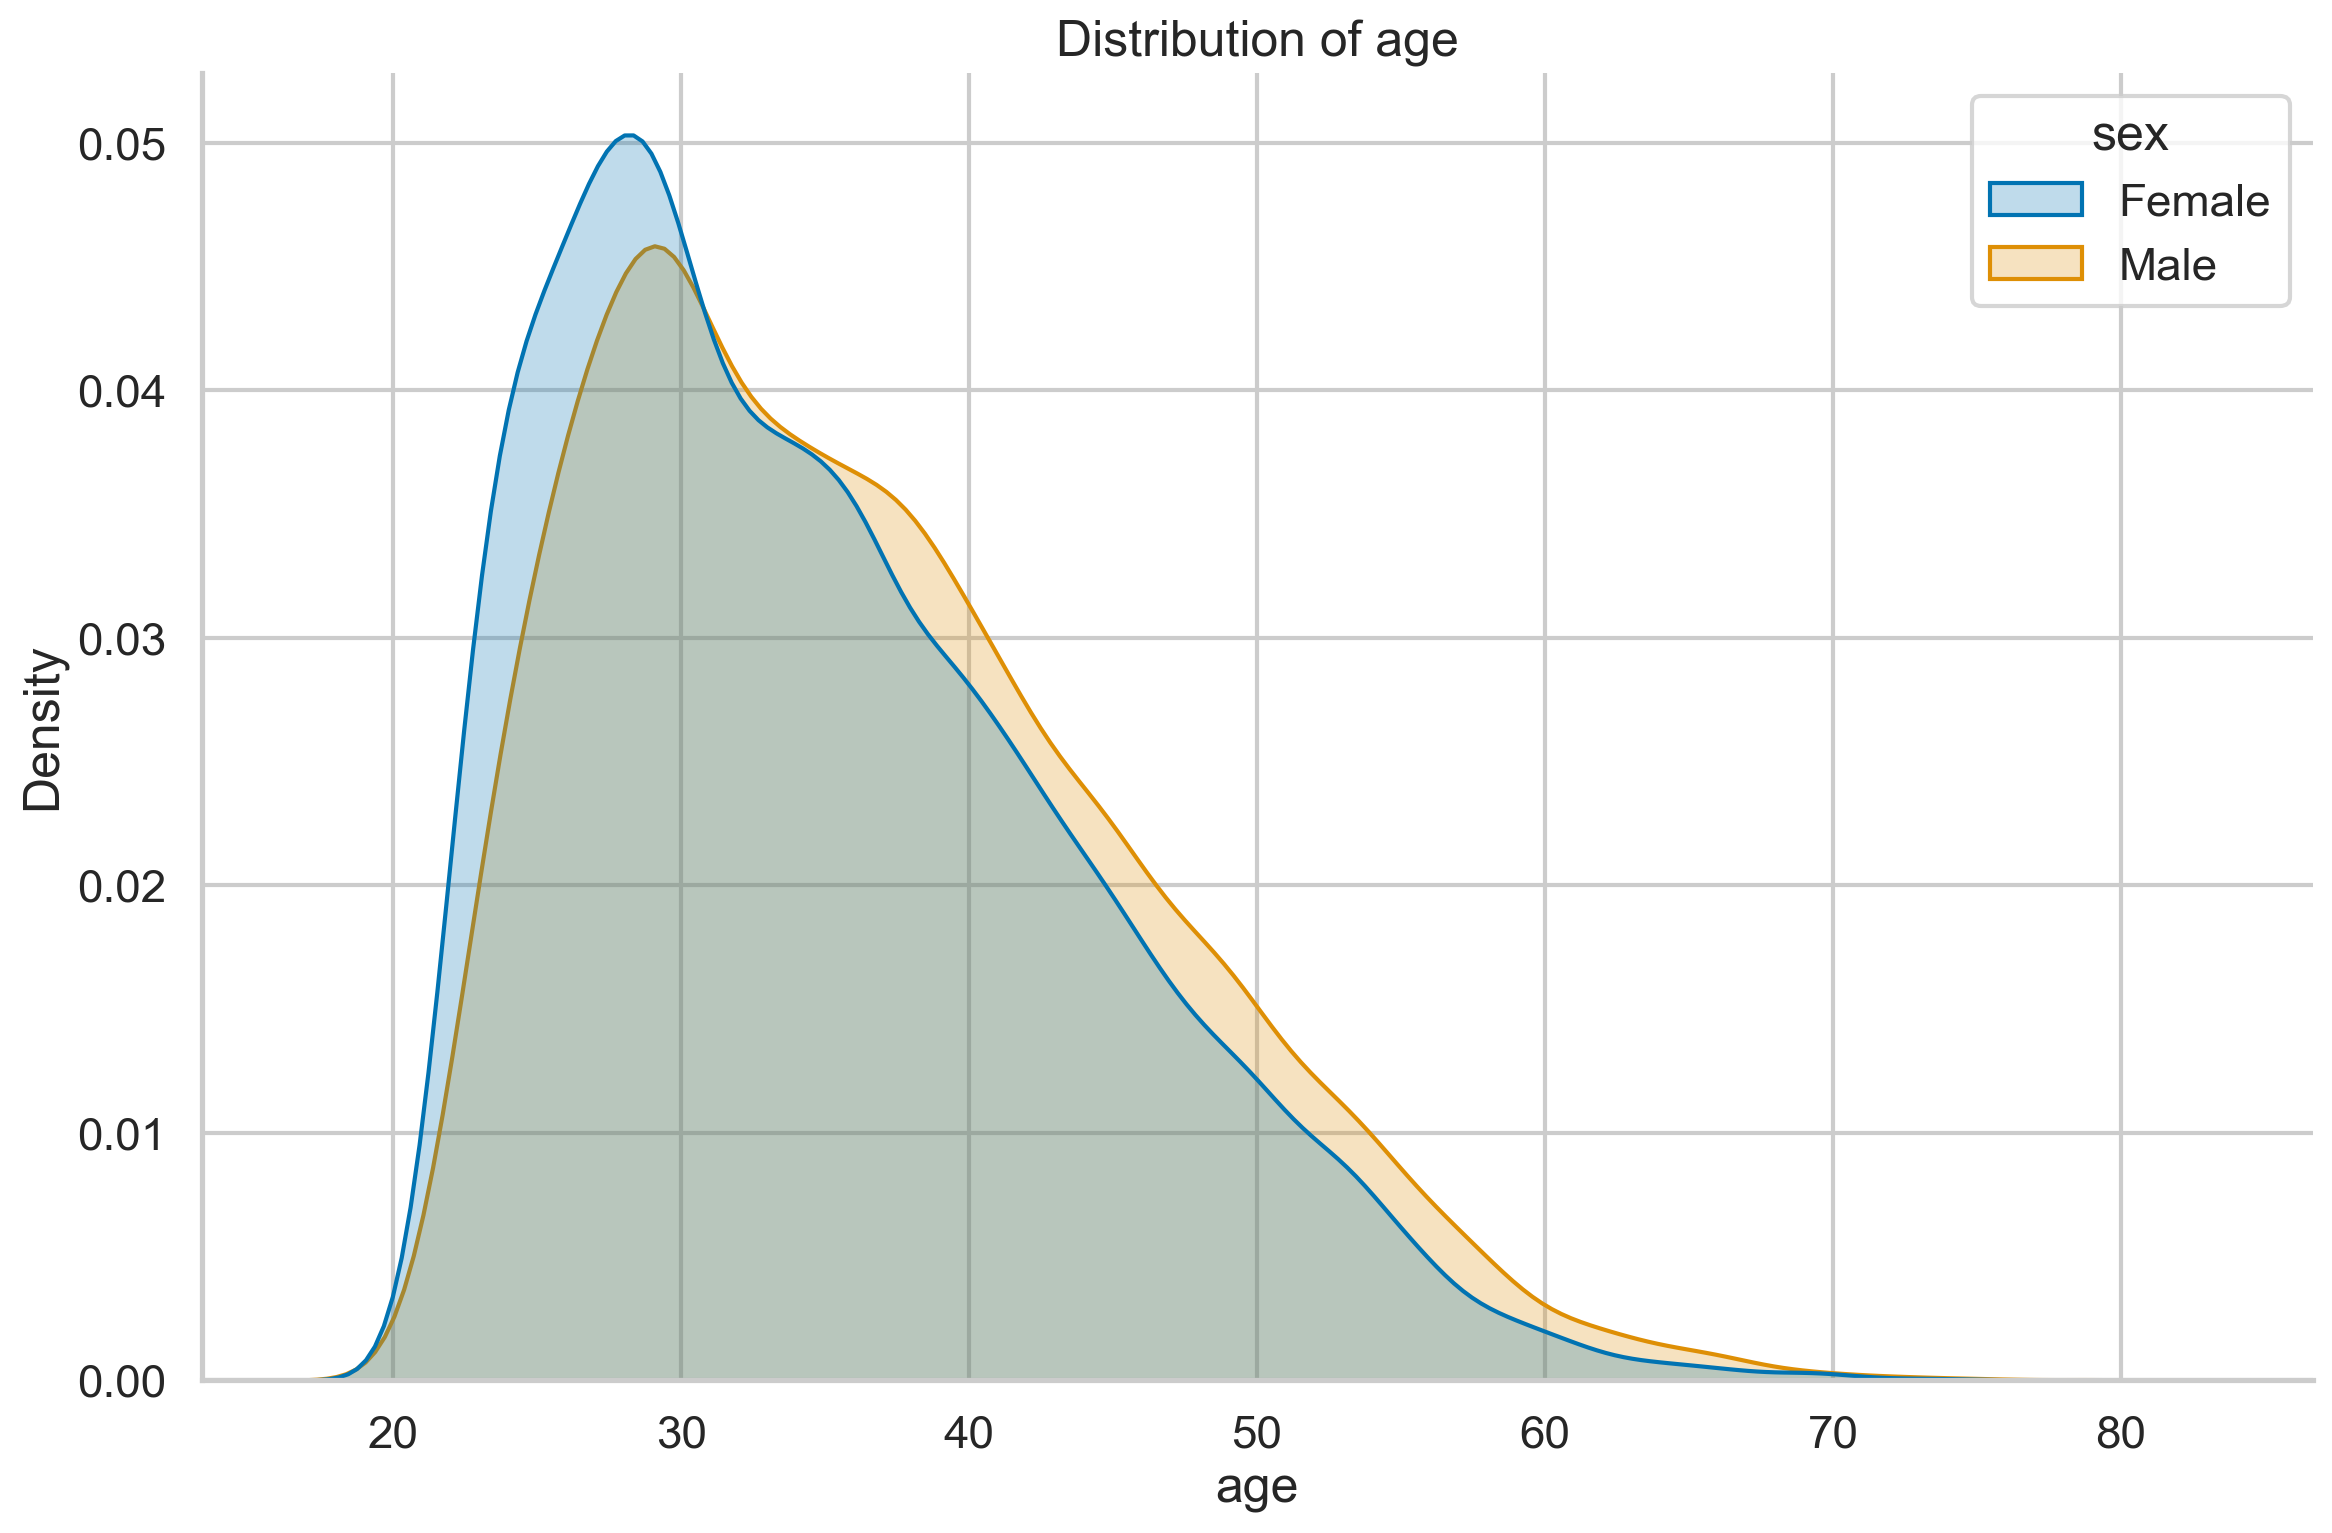

In [16]:
ax = sns.kdeplot(data=df, x="age", 
                 hue="sex", common_norm=False, 
                 fill=True)
ax.set_title("Distribution of age")

sns.despine()
plt.tight_layout()

Also, we can create a histogram (together with the KDE), by running:

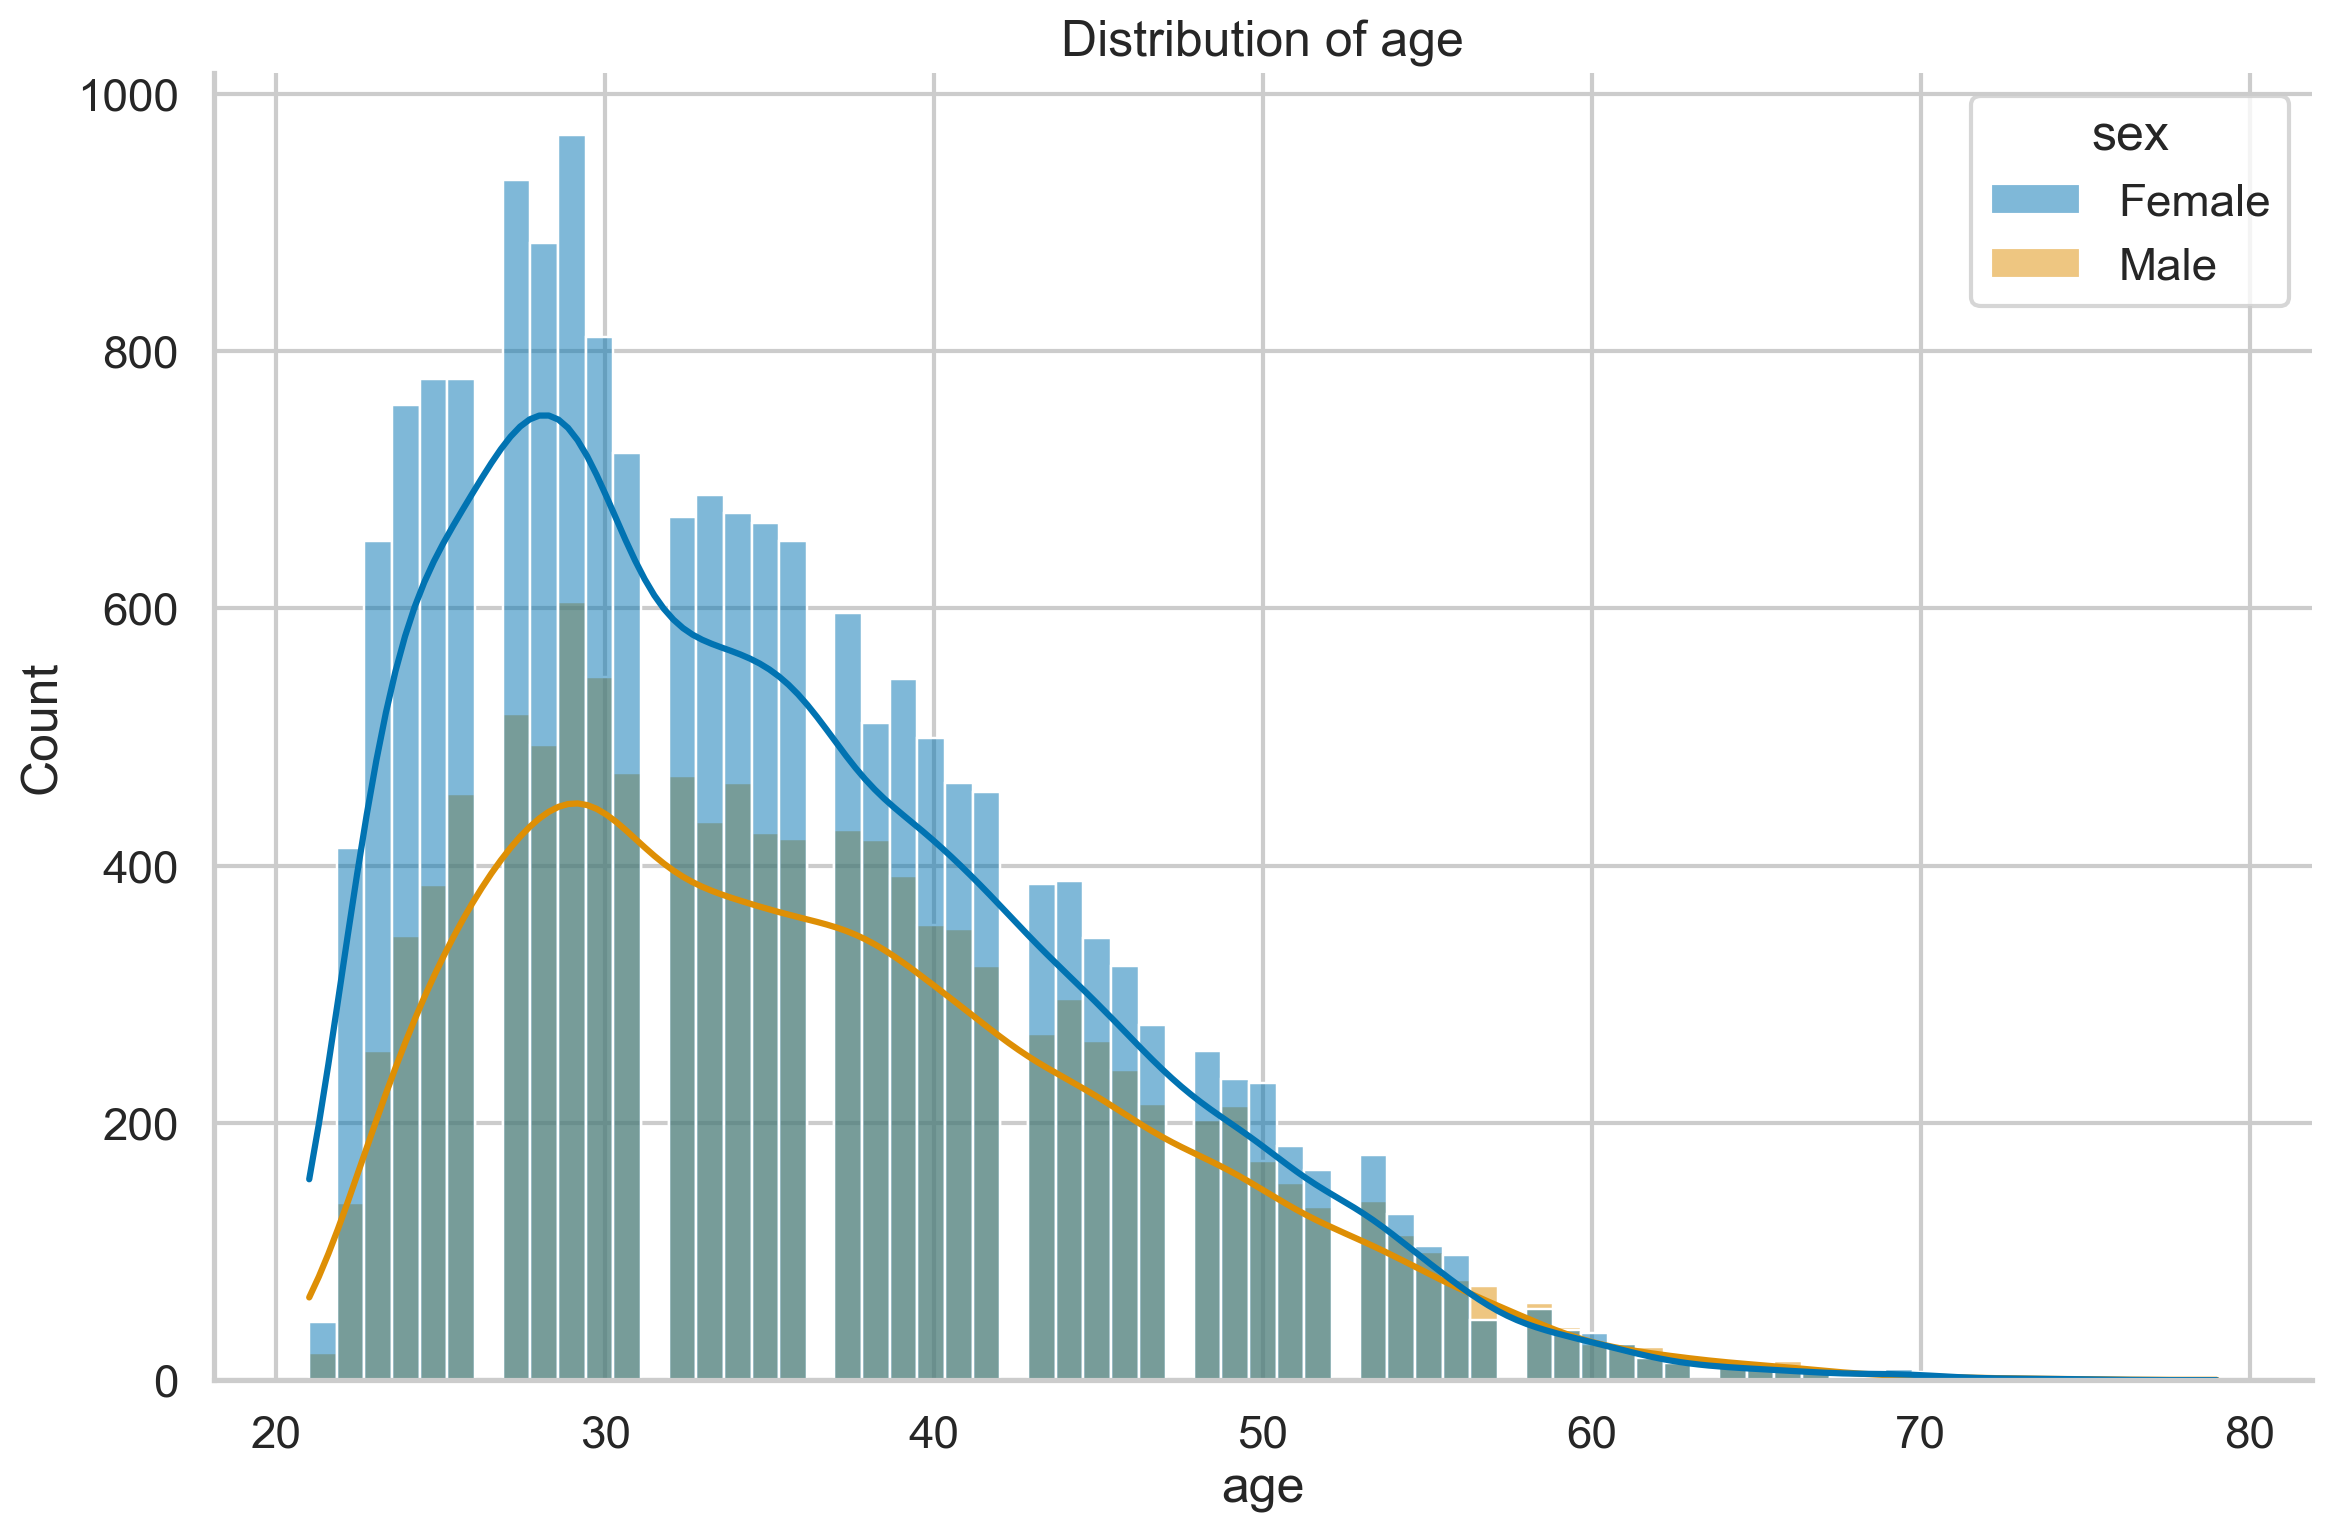

In [17]:
ax = sns.histplot(data=df.dropna(), x="age", hue="sex", kde=True)
ax.set_title("Distribution of age");

sns.despine()
plt.tight_layout()

We noticed some gaps in the plot and the reason for this is the binning. 
<br>
<br>
Below, we created the same histogram using sns.countplot and plotly_express. By doing so, each value of age has a separate bin and we can inspect the plot in detail. 
<br>
<br>
There are no such spikes in the following plots:

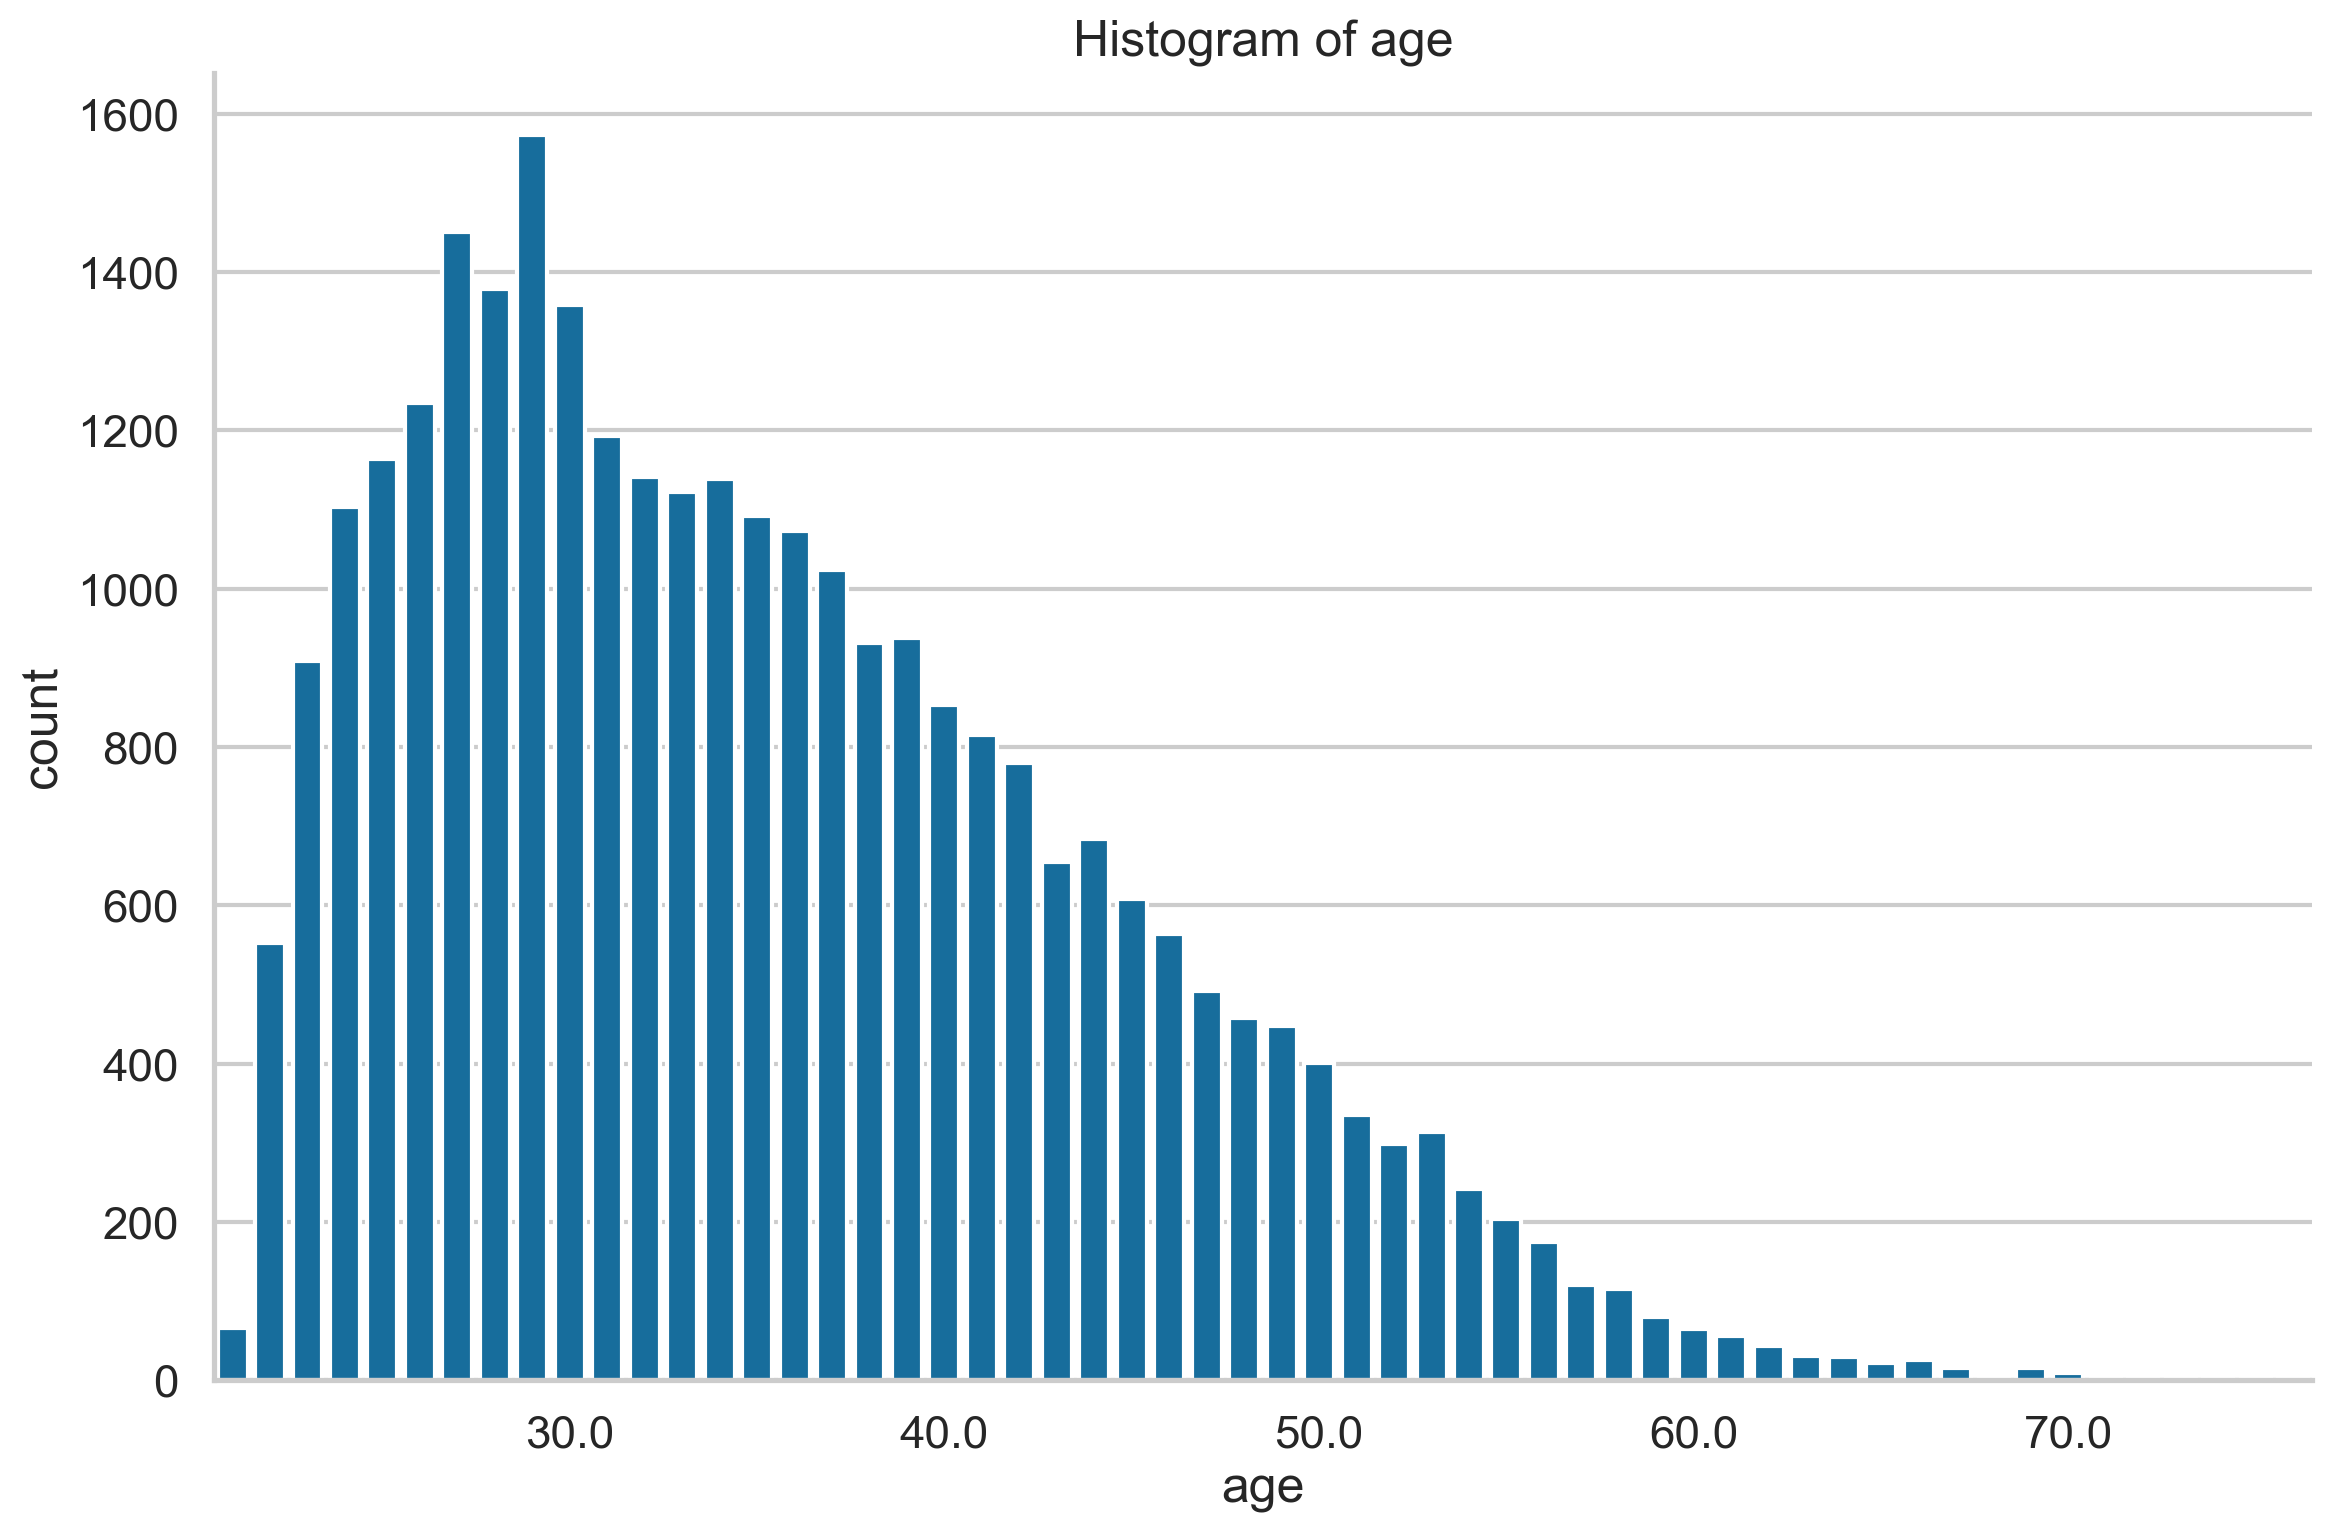

In [18]:
ax = sns.countplot(data=df.dropna(), x="age", color="b")

for ind, label in enumerate(ax.get_xticklabels()):
    if int(float(label.get_text())) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_title("Histogram of age")

sns.despine()
plt.tight_layout()

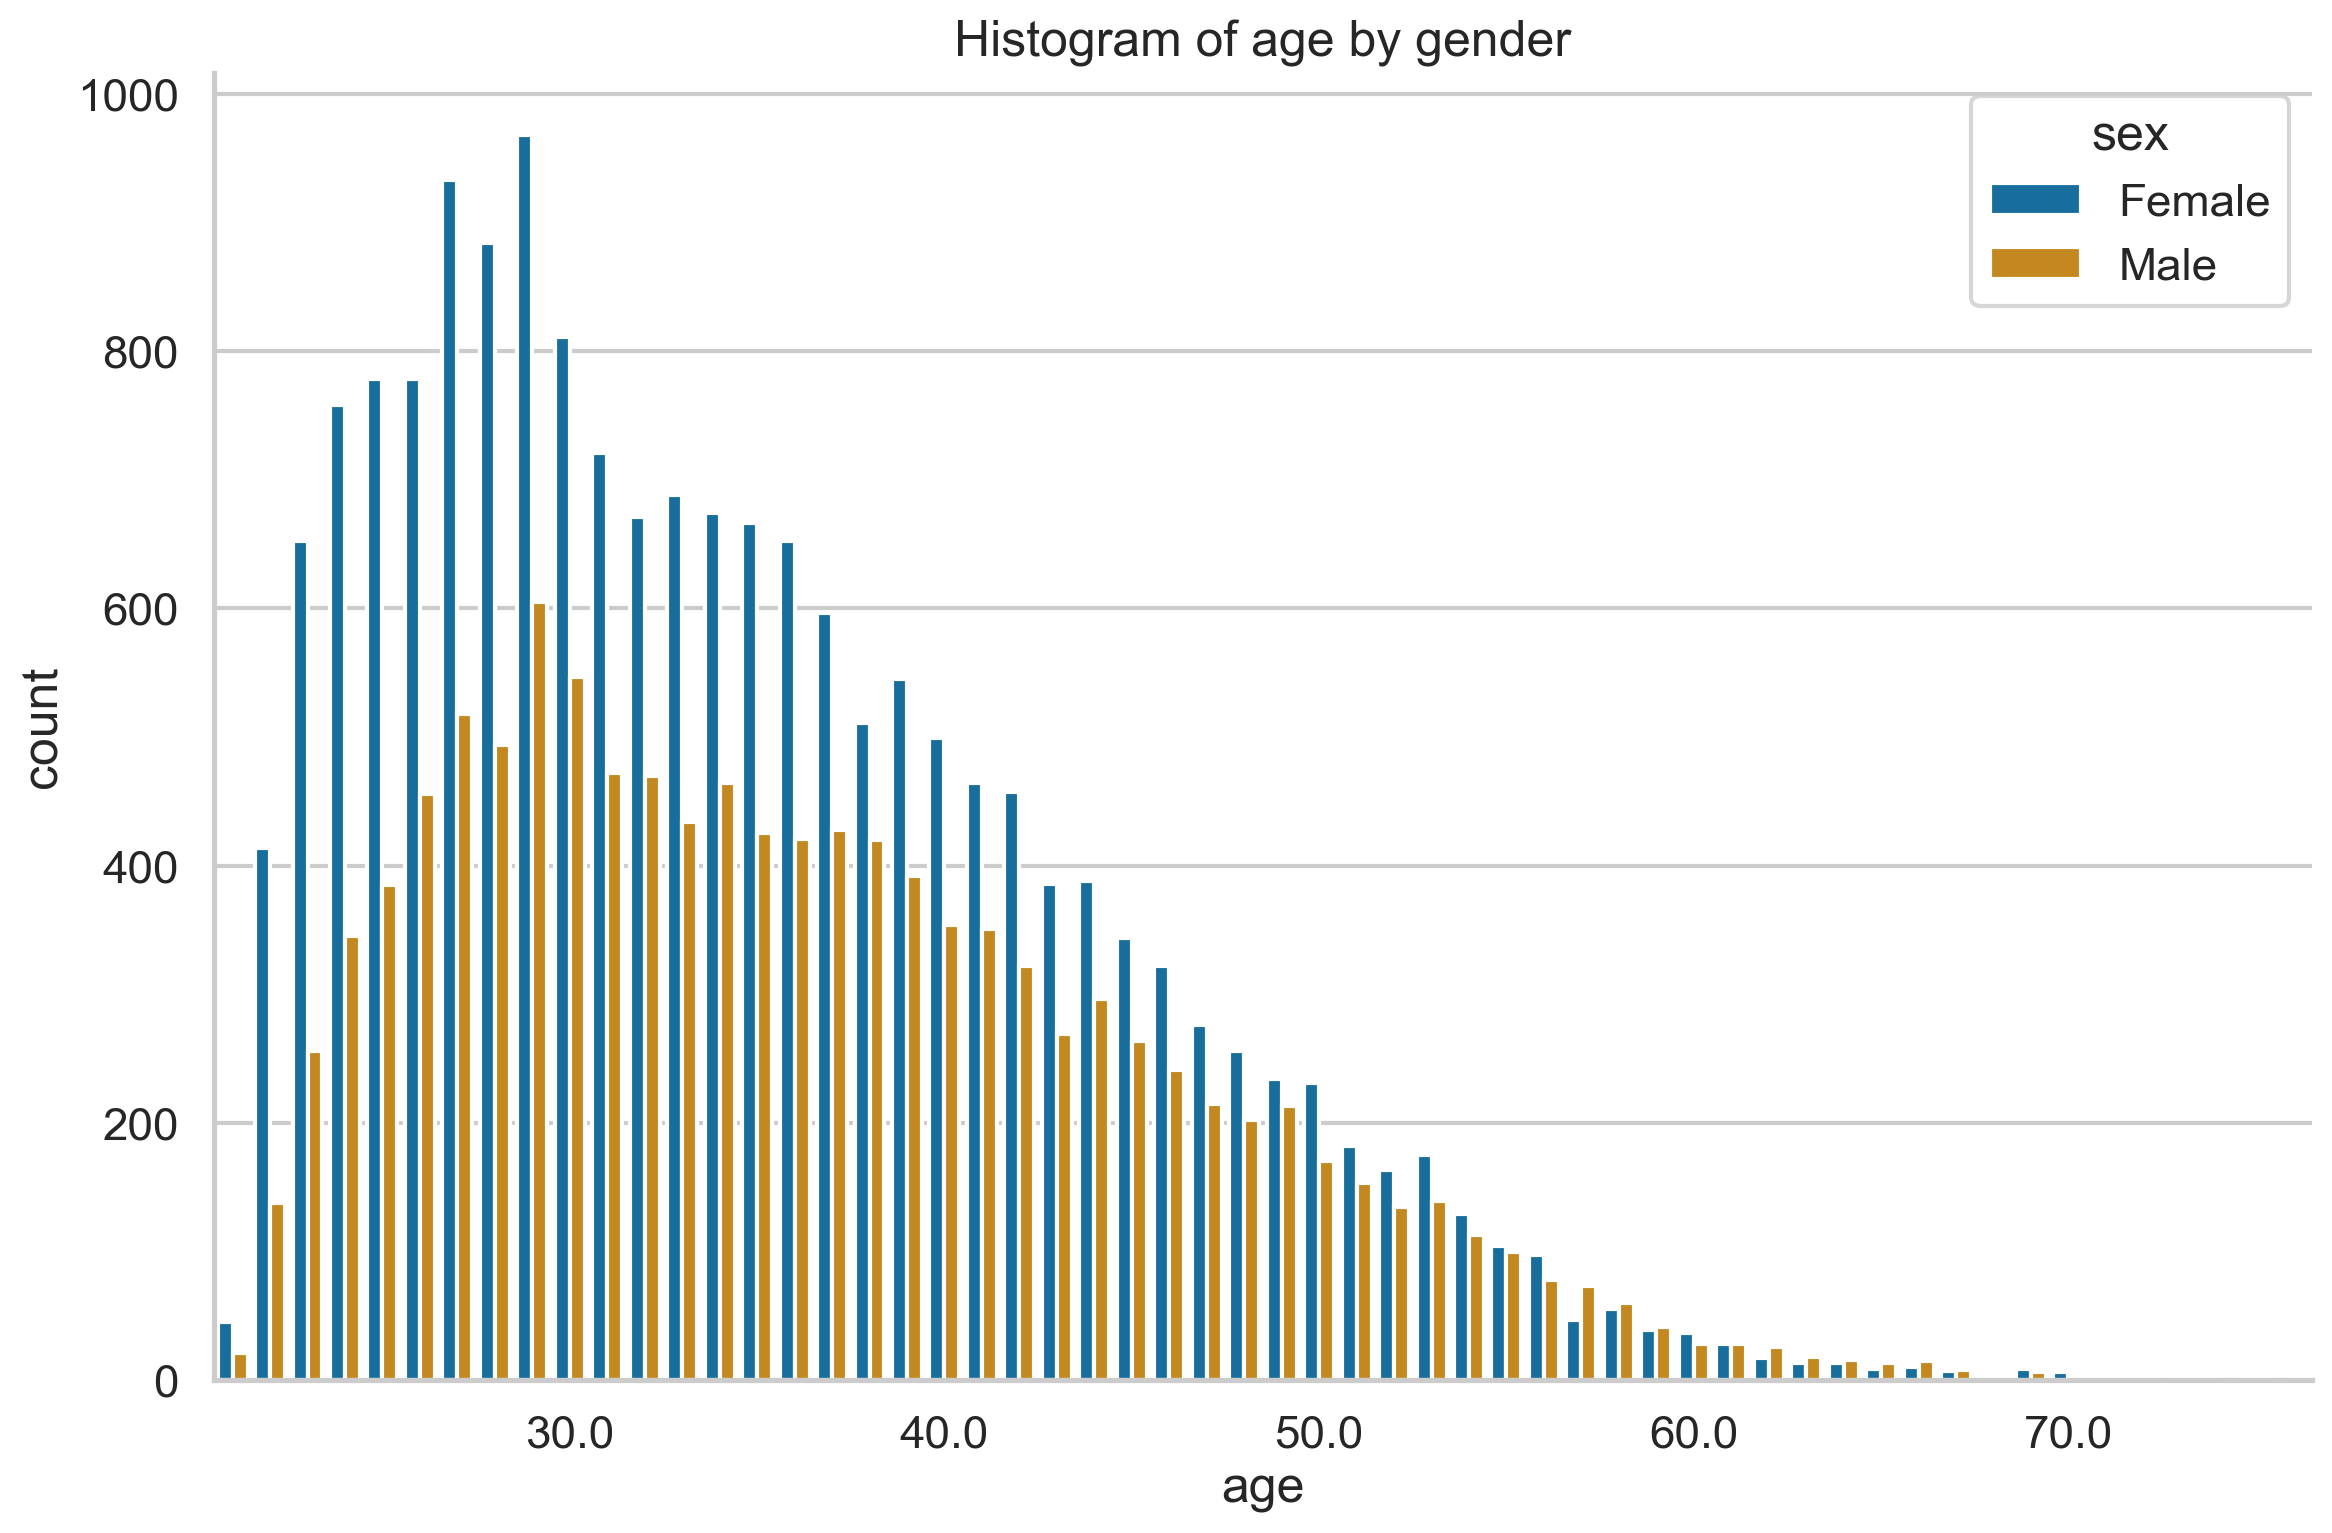

In [19]:
ax = sns.countplot(data=df.dropna(), x="age", hue="sex")

for ind, label in enumerate(ax.get_xticklabels()):
    if int(float(label.get_text())) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_title("Histogram of age by gender")

sns.despine()
plt.tight_layout()

In [20]:
px.histogram(df.dropna(), x="age", color="sex", title = "Distribution of age")

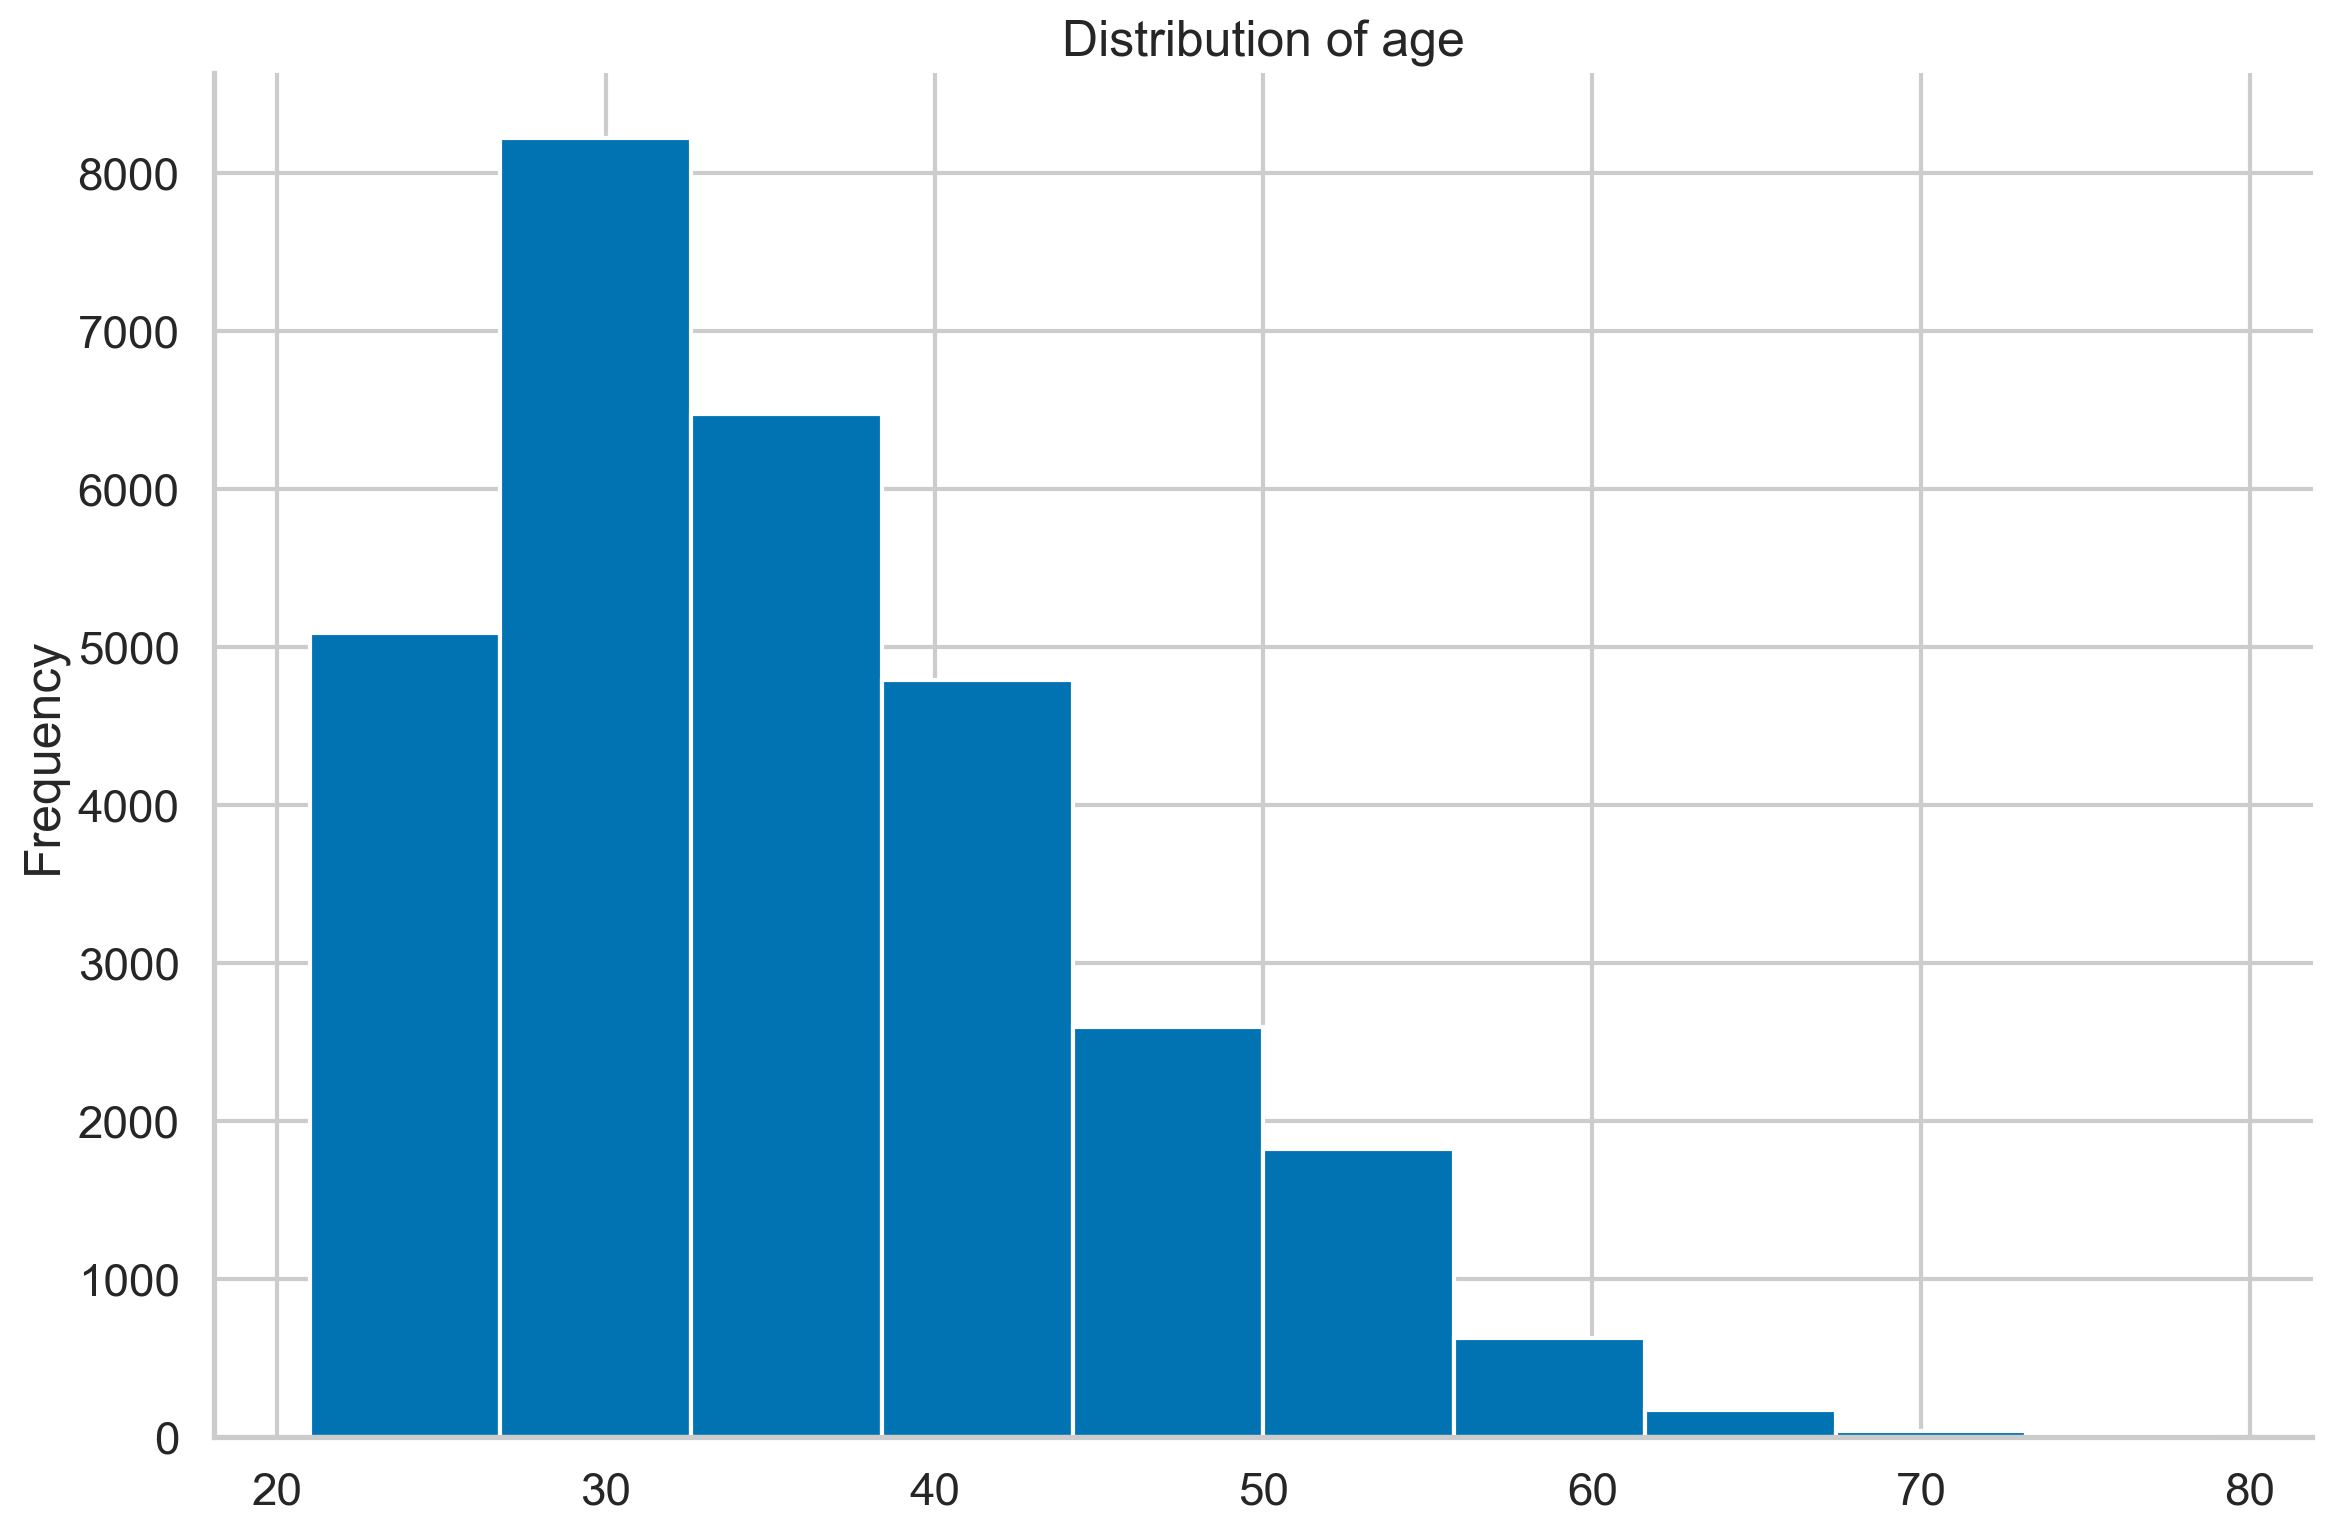

In [21]:
df["age"].plot(kind="hist", title="Distribution of age")

sns.despine()
plt.tight_layout()

2.4 Create a pairplot of selected variables:

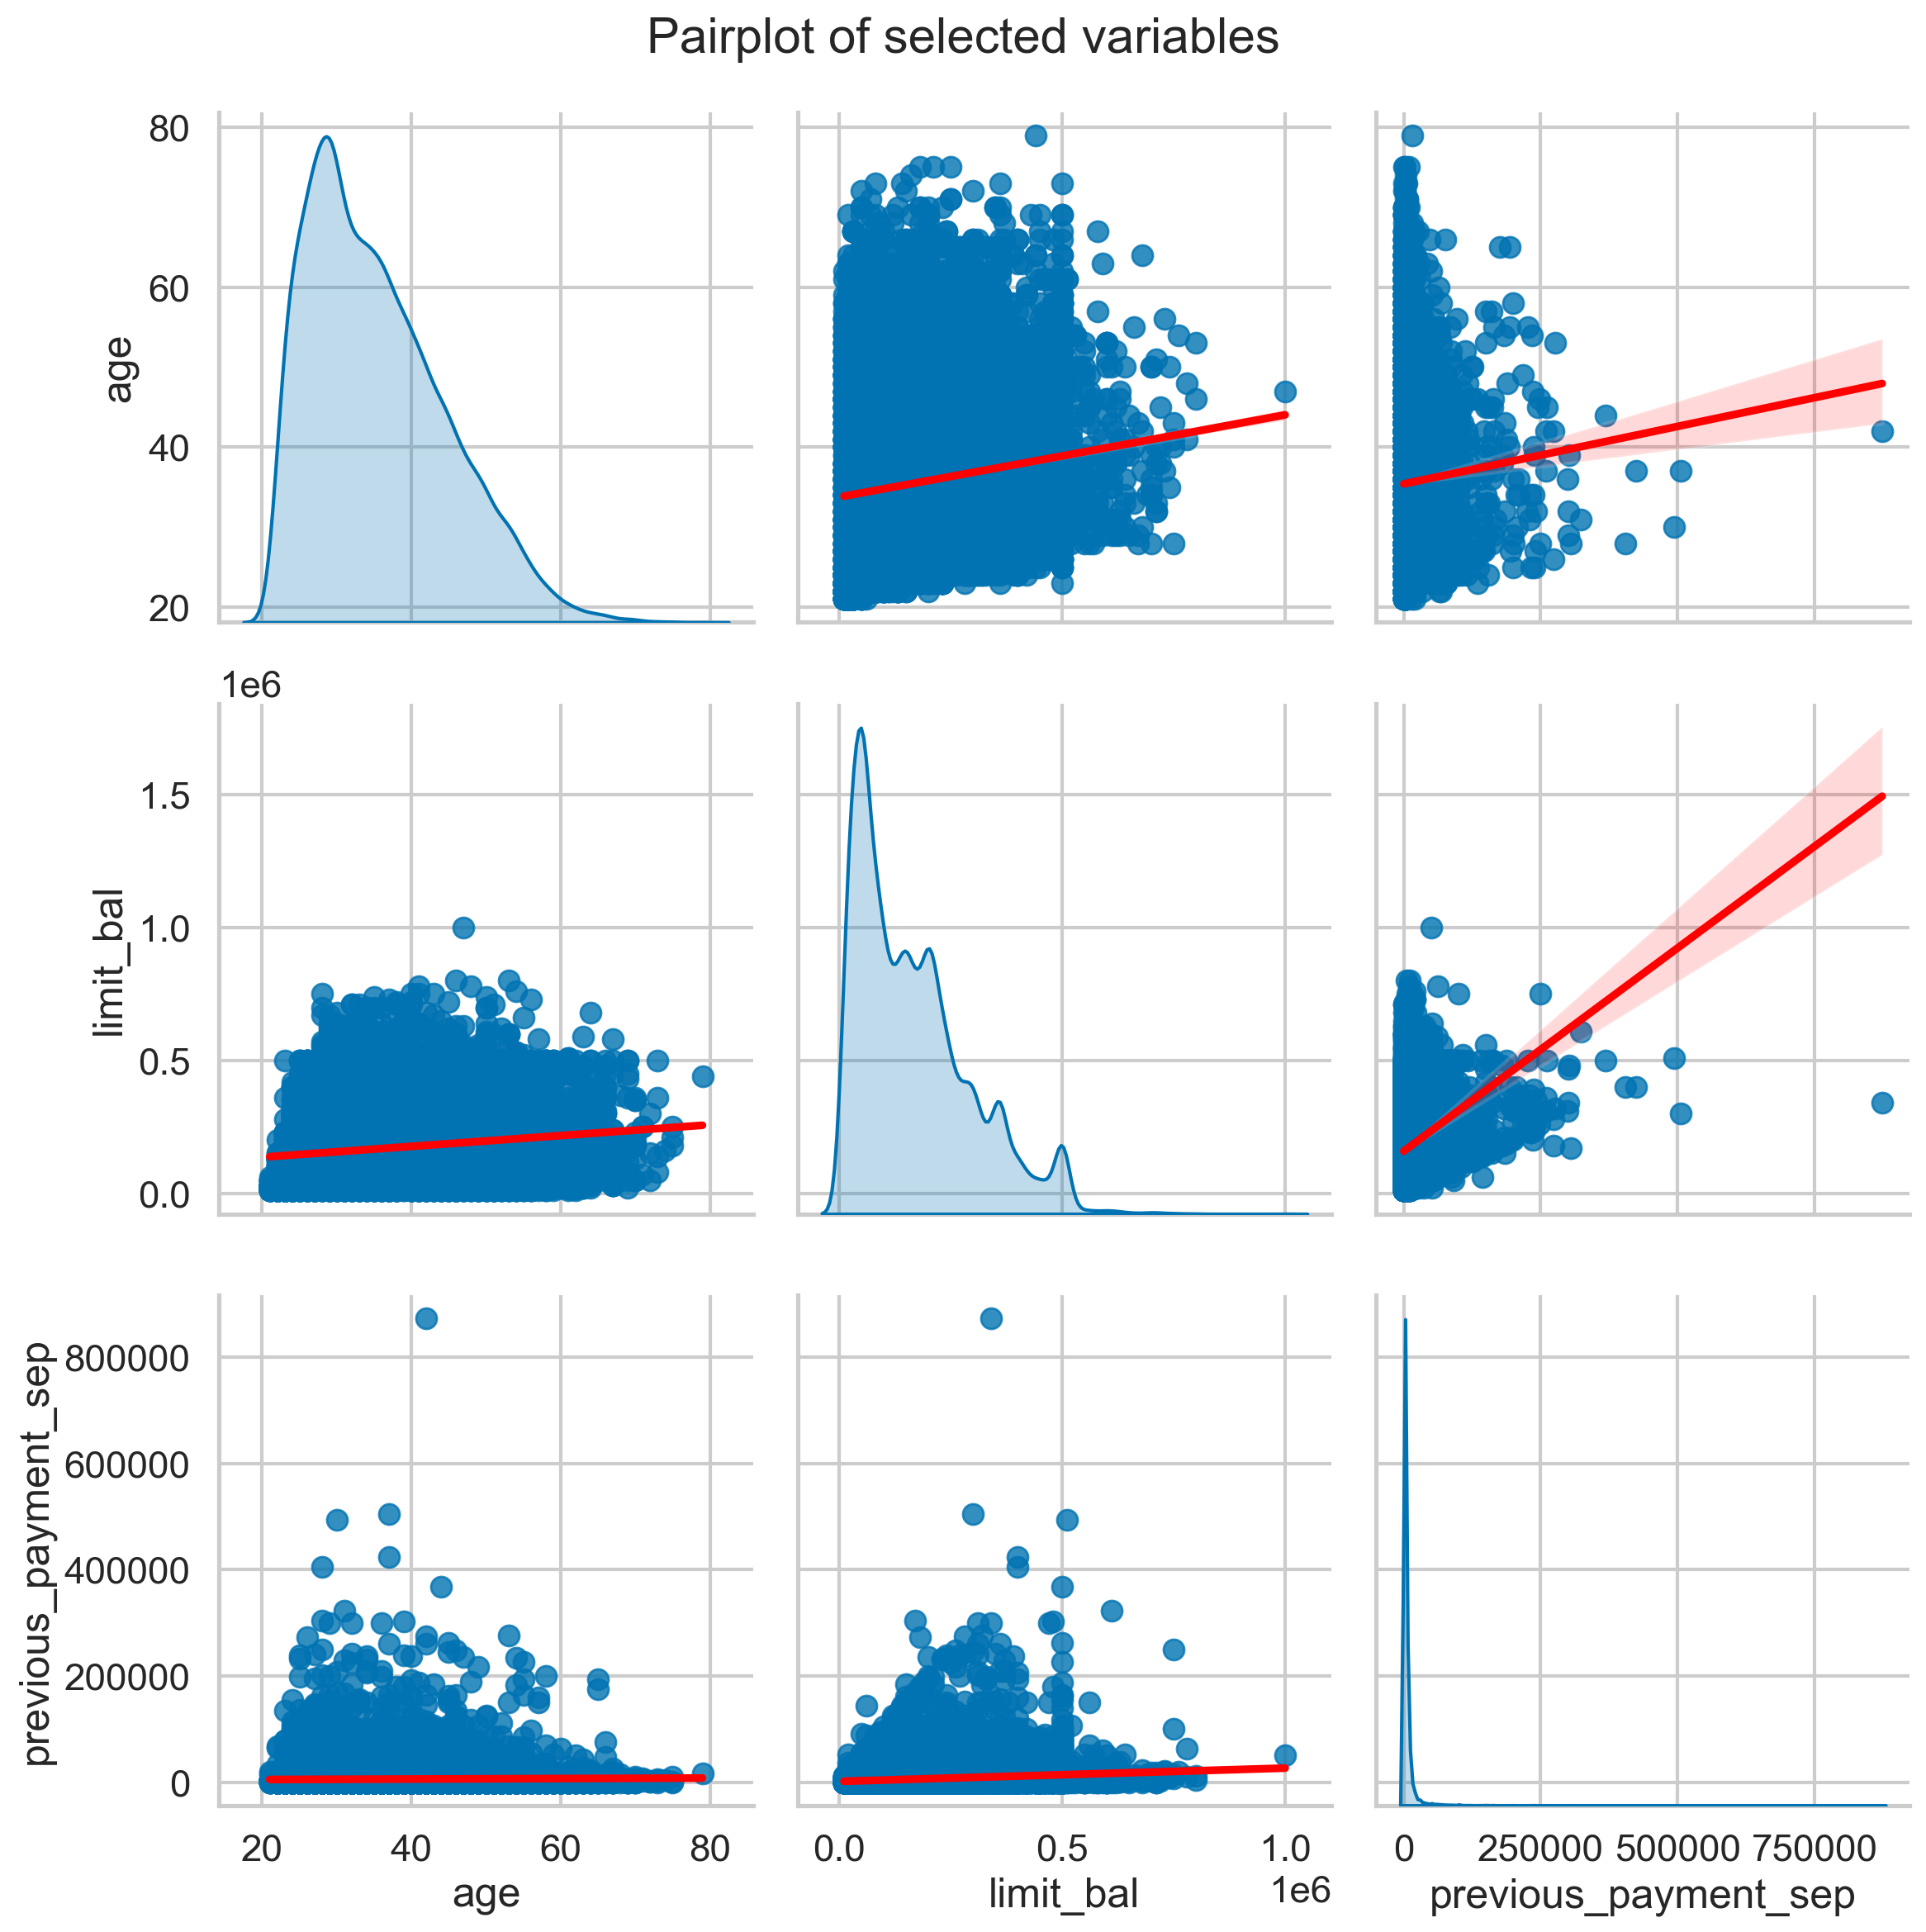

In [22]:
COLS_TO_PLOT = ["age", "limit_bal", "previous_payment_sep"]

pair_plot = sns.pairplot(df[COLS_TO_PLOT], kind="reg", 
                         diag_kind="kde", height=4,
                         plot_kws={"line_kws":{"color":"red"}})
pair_plot.fig.suptitle("Pairplot of selected variables")

sns.despine()
plt.tight_layout()

From above, we can clearly see "previous_payment_sep" is highly skewed - it has a very long tail.

Additionally, we can separate the genders by specifying the hue argument:

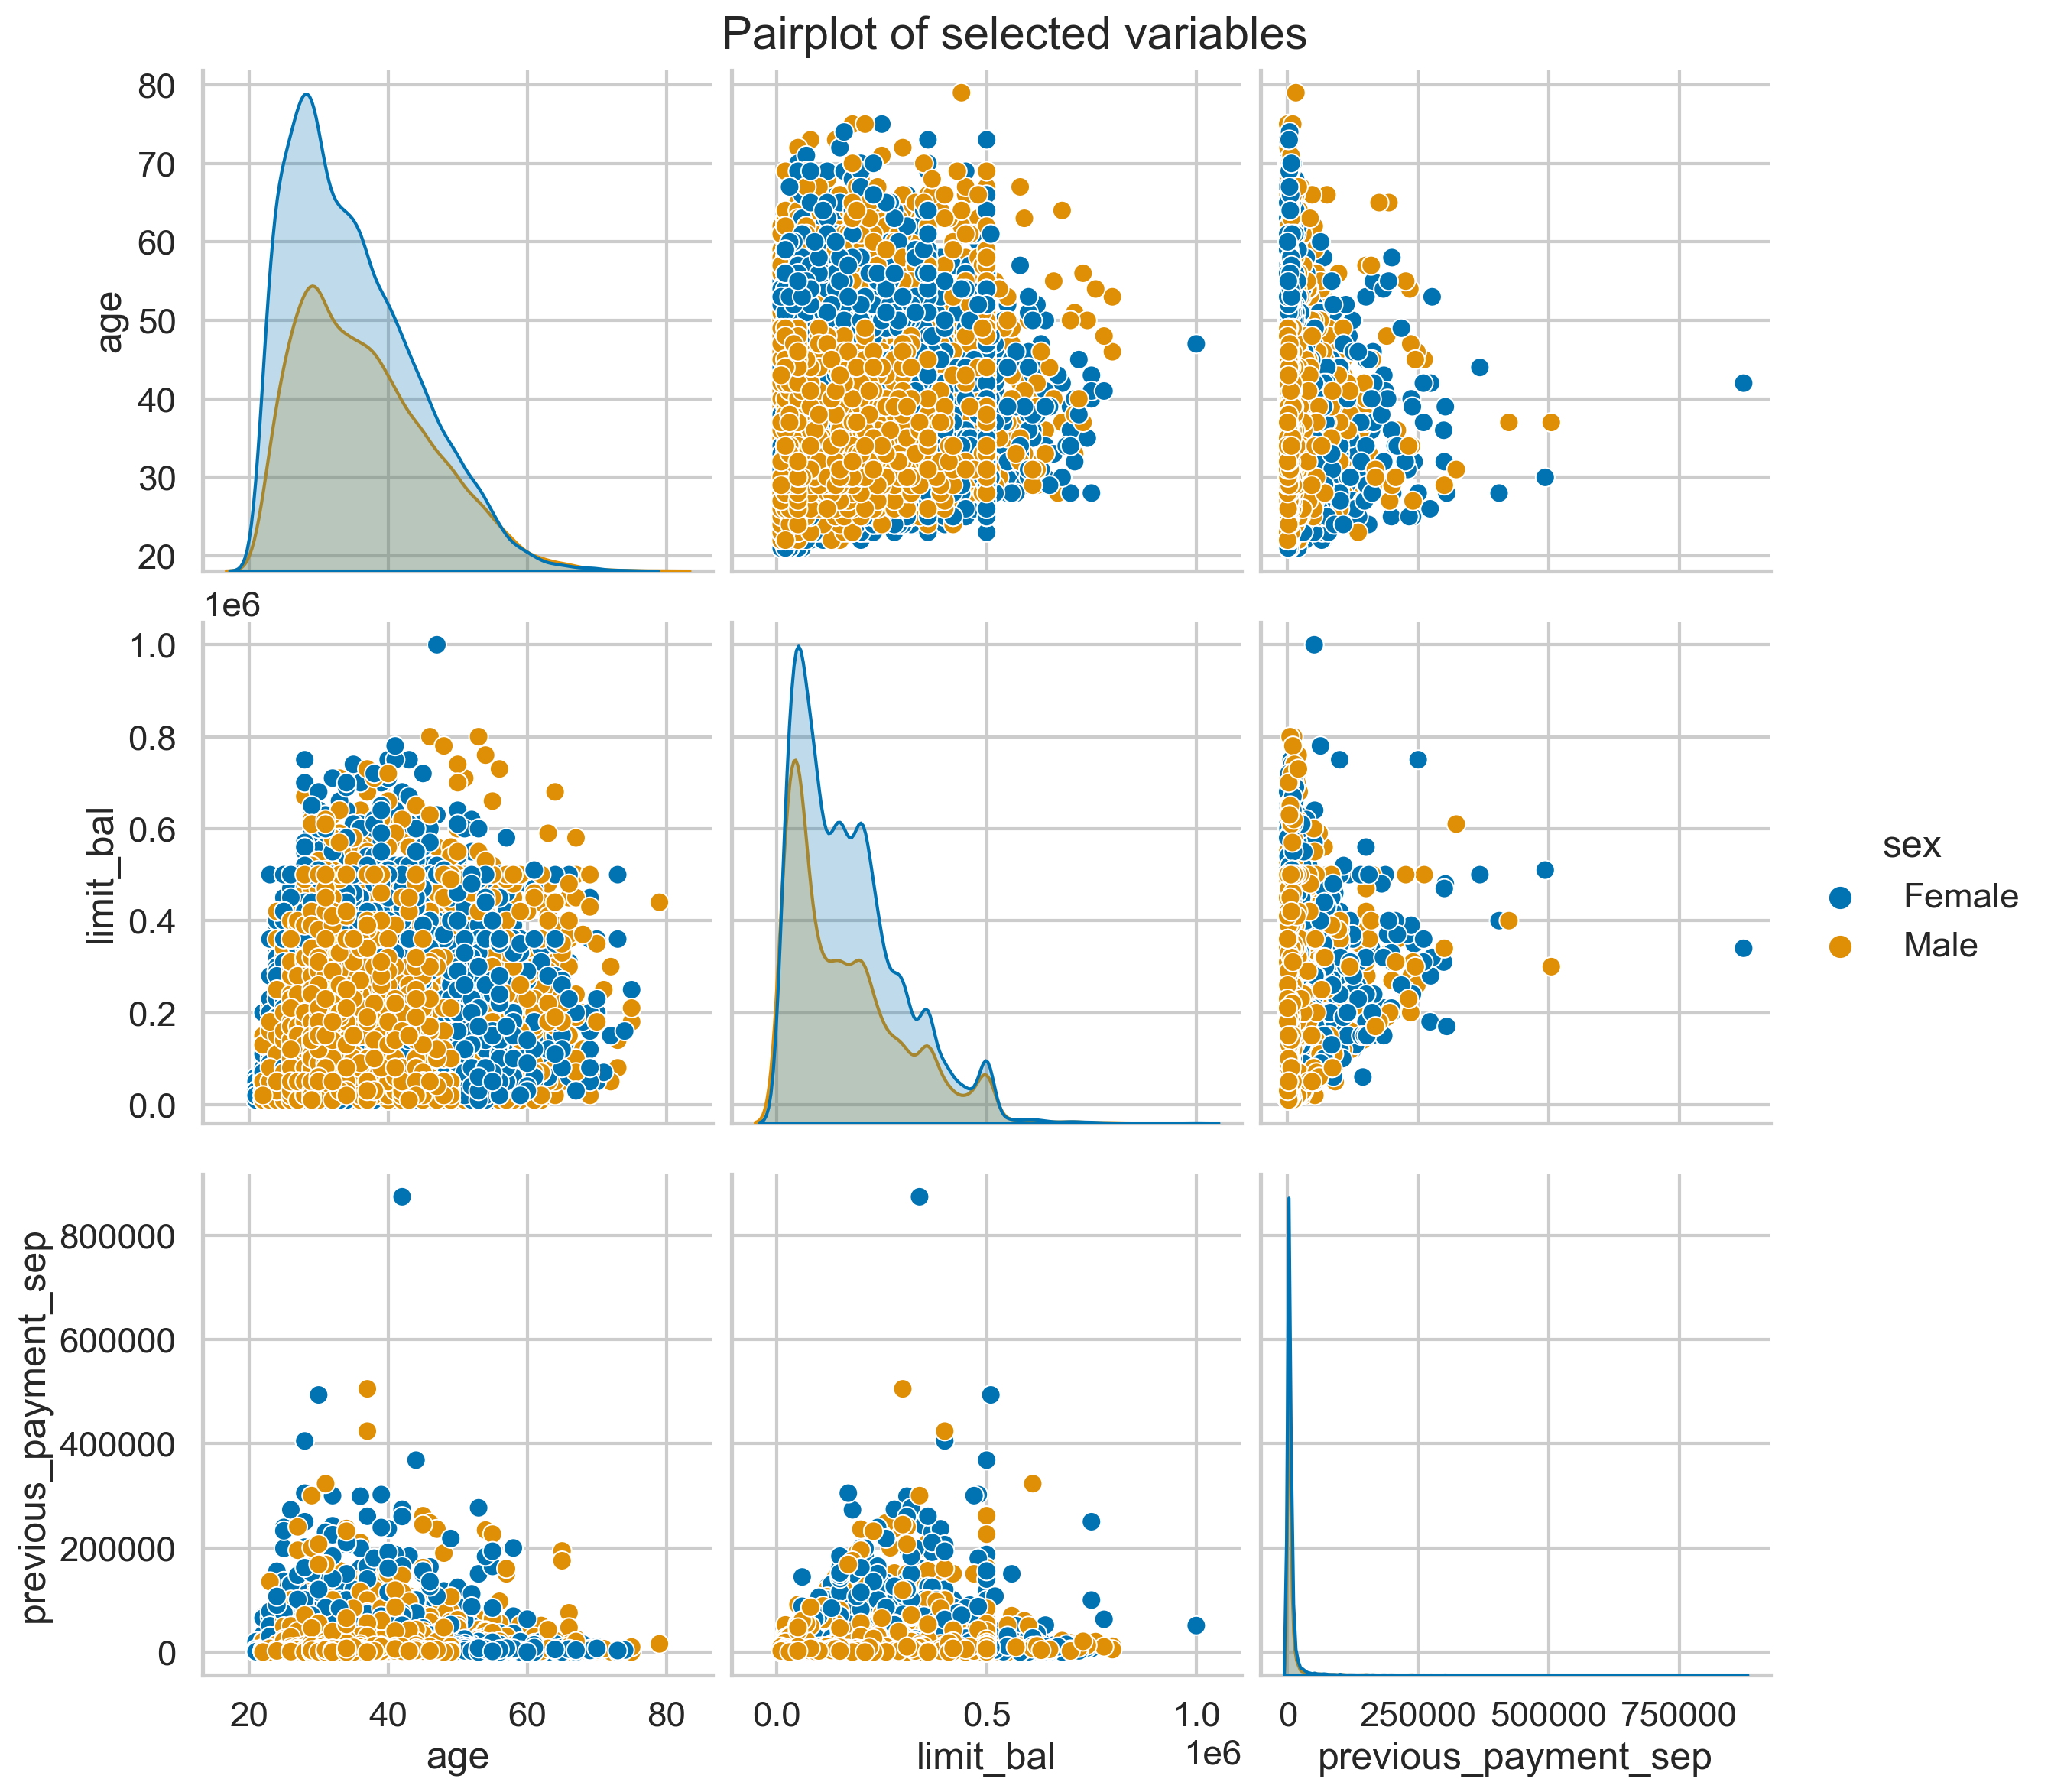

In [23]:
pair_plot = sns.pairplot(data=df, 
                         x_vars=COLS_TO_PLOT, 
                         y_vars=COLS_TO_PLOT, 
                         hue="sex", 
                         height=4)
pair_plot.fig.suptitle("Pairplot of selected variables")
plt.subplots_adjust(top=0.95)

Still, it is hard to read the scatterplots due to the sheer valume of observations.

2.5 Analyze the relationship between age and limit balance:

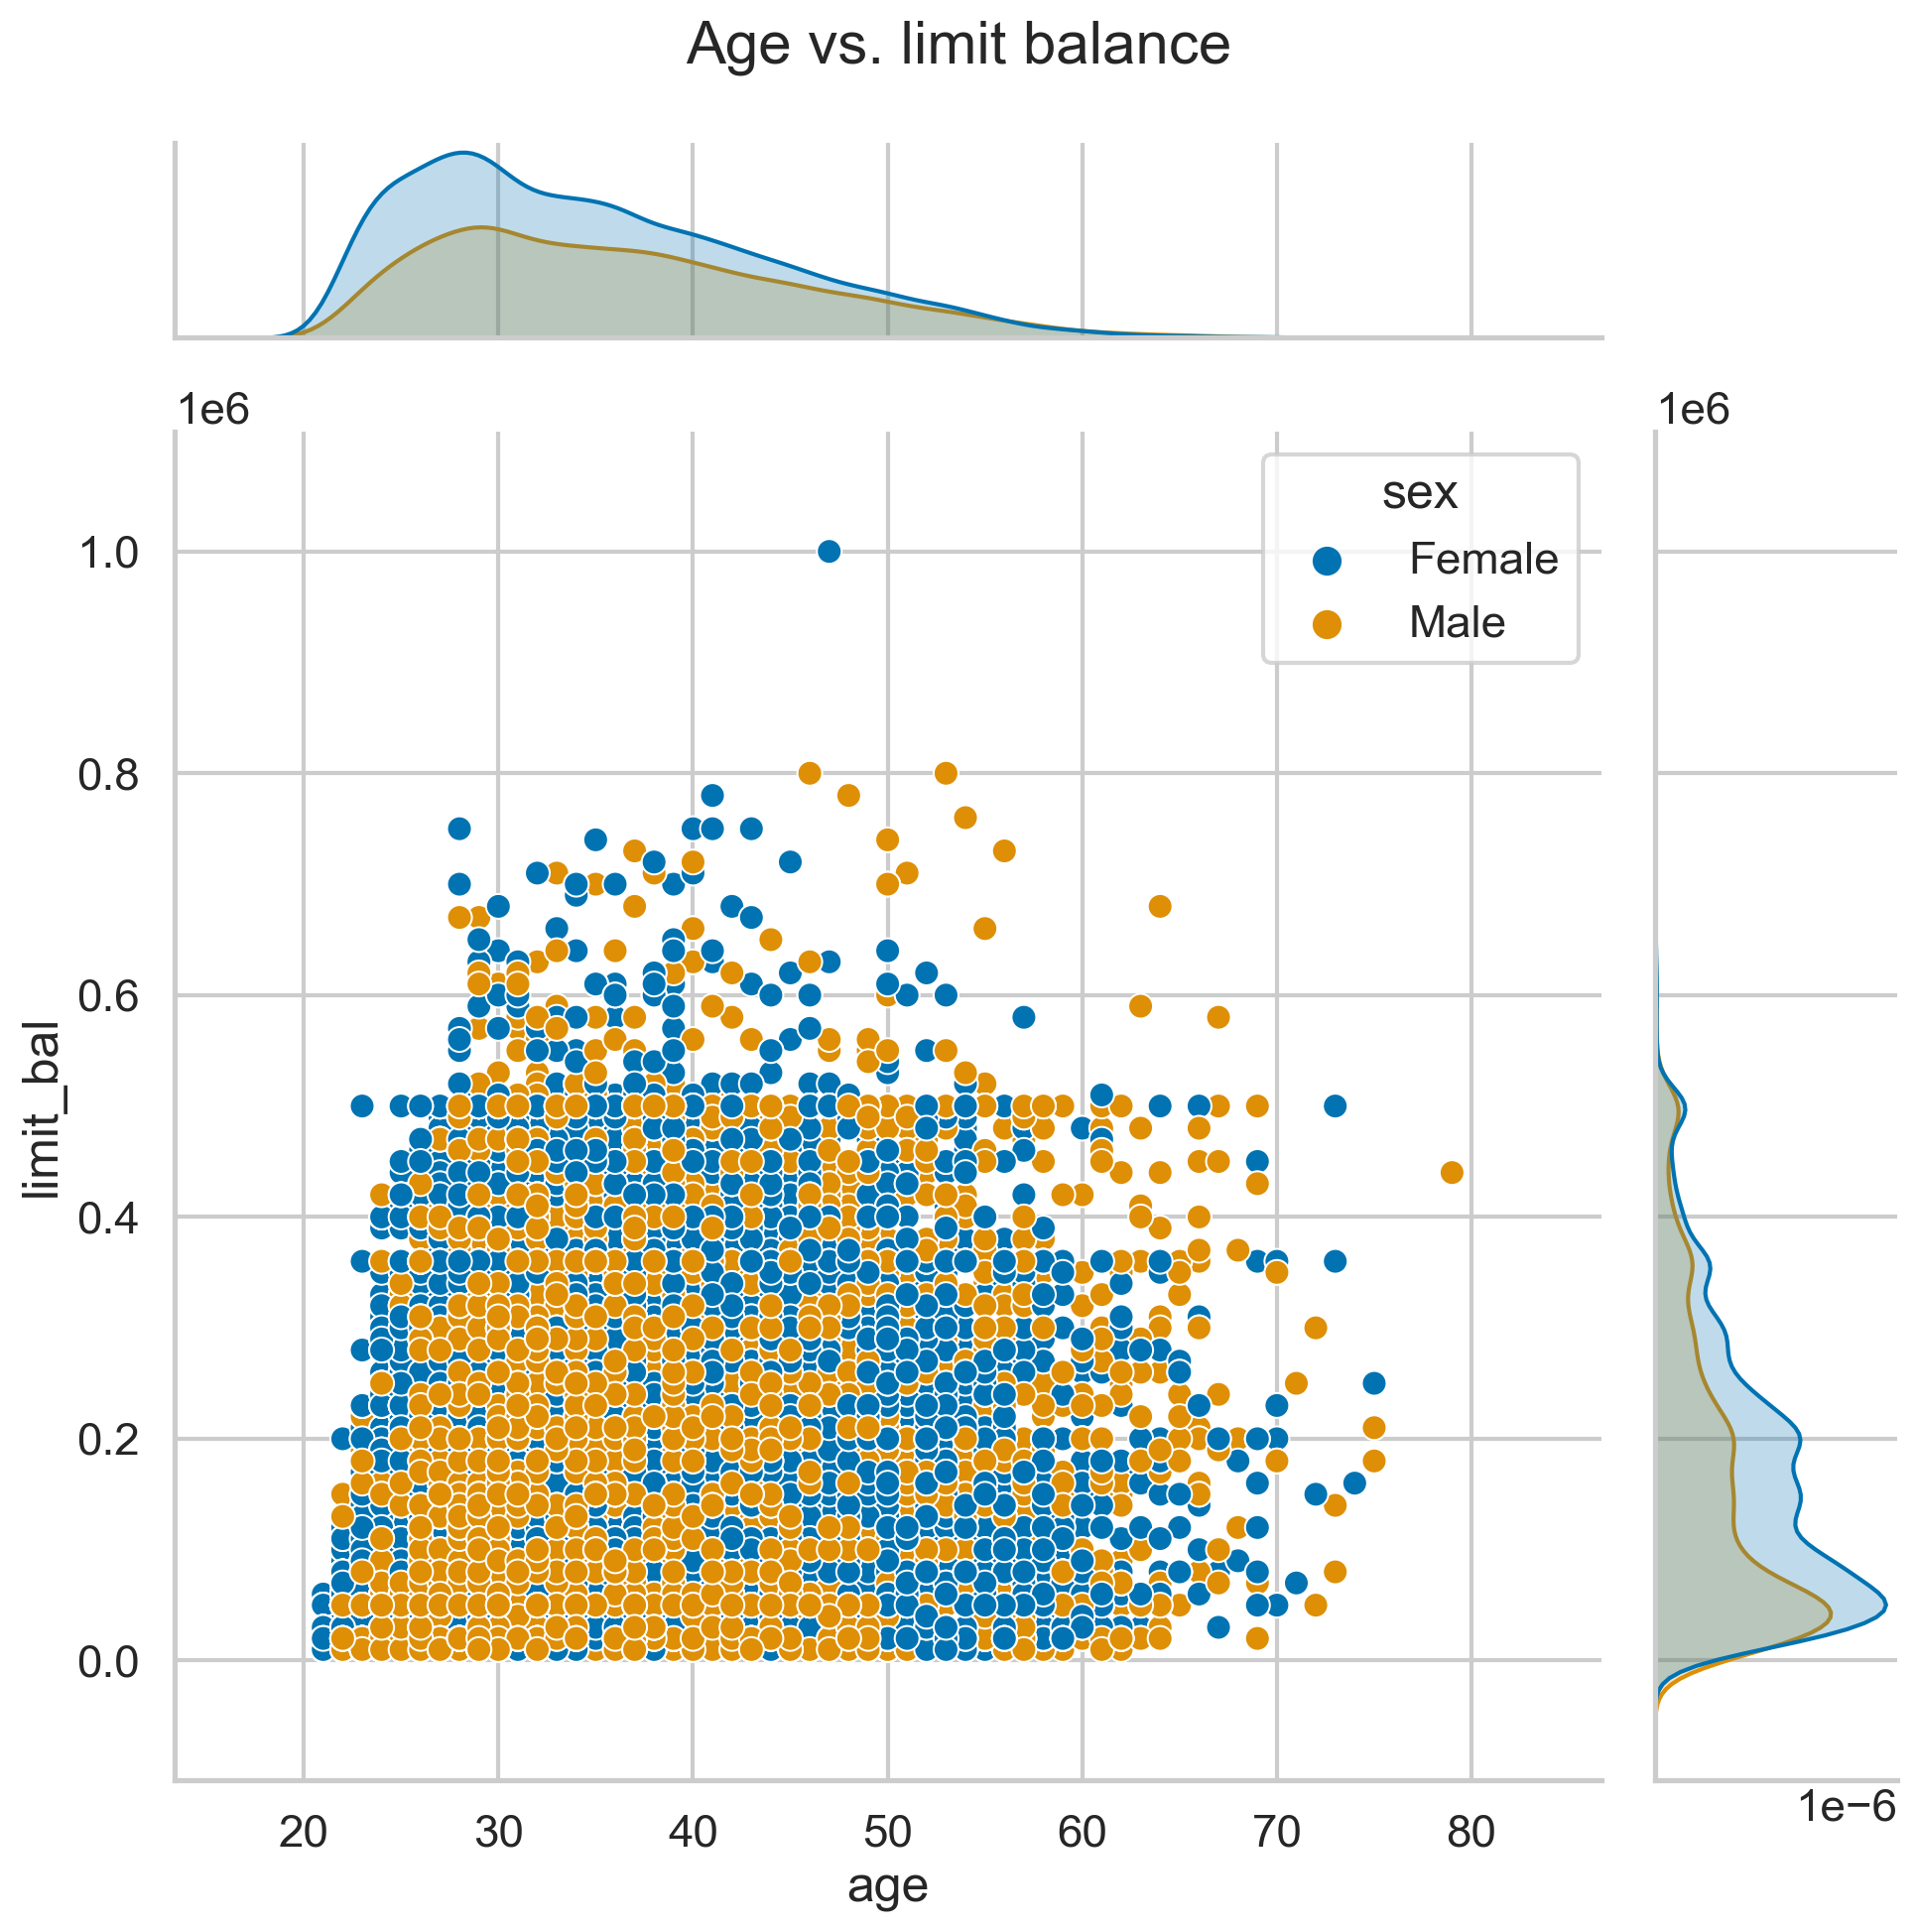

In [24]:
ax = sns.jointplot(data=df, x="age", y="limit_bal", 
                   hue="sex", height=10)
ax.fig.suptitle("Age vs. limit balance")

sns.despine()
plt.tight_layout()

2.6 Define and run a function for plotting the correlation heatmap:

In [25]:
def plot_correlation_matrix(corr_mat, annotate=False):
    """
    Function for plotting the correlation heatmap. It masks the irrelevant fields.
    
    Parameters
    ----------
    corr_mat : pd.DataFrame
        Correlation matrix of the features.
    """
    
    # temporarily change style
    sns.set(style="white")
    # mask the upper triangle
    mask = np.zeros_like(corr_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # set up the matplotlib figure
    fig, ax = plt.subplots()
    # set up custom diverging colormap
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    # plot the heatmap
    sns.heatmap(corr_mat, mask=mask, cmap=cmap, 
                annot=annotate, vmax=.3, 
                center=0, square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, ax=ax)
    ax.set_title("Correlation Matrix", fontsize=16)
    # change back to darkgrid style
    sns.set(style="darkgrid")

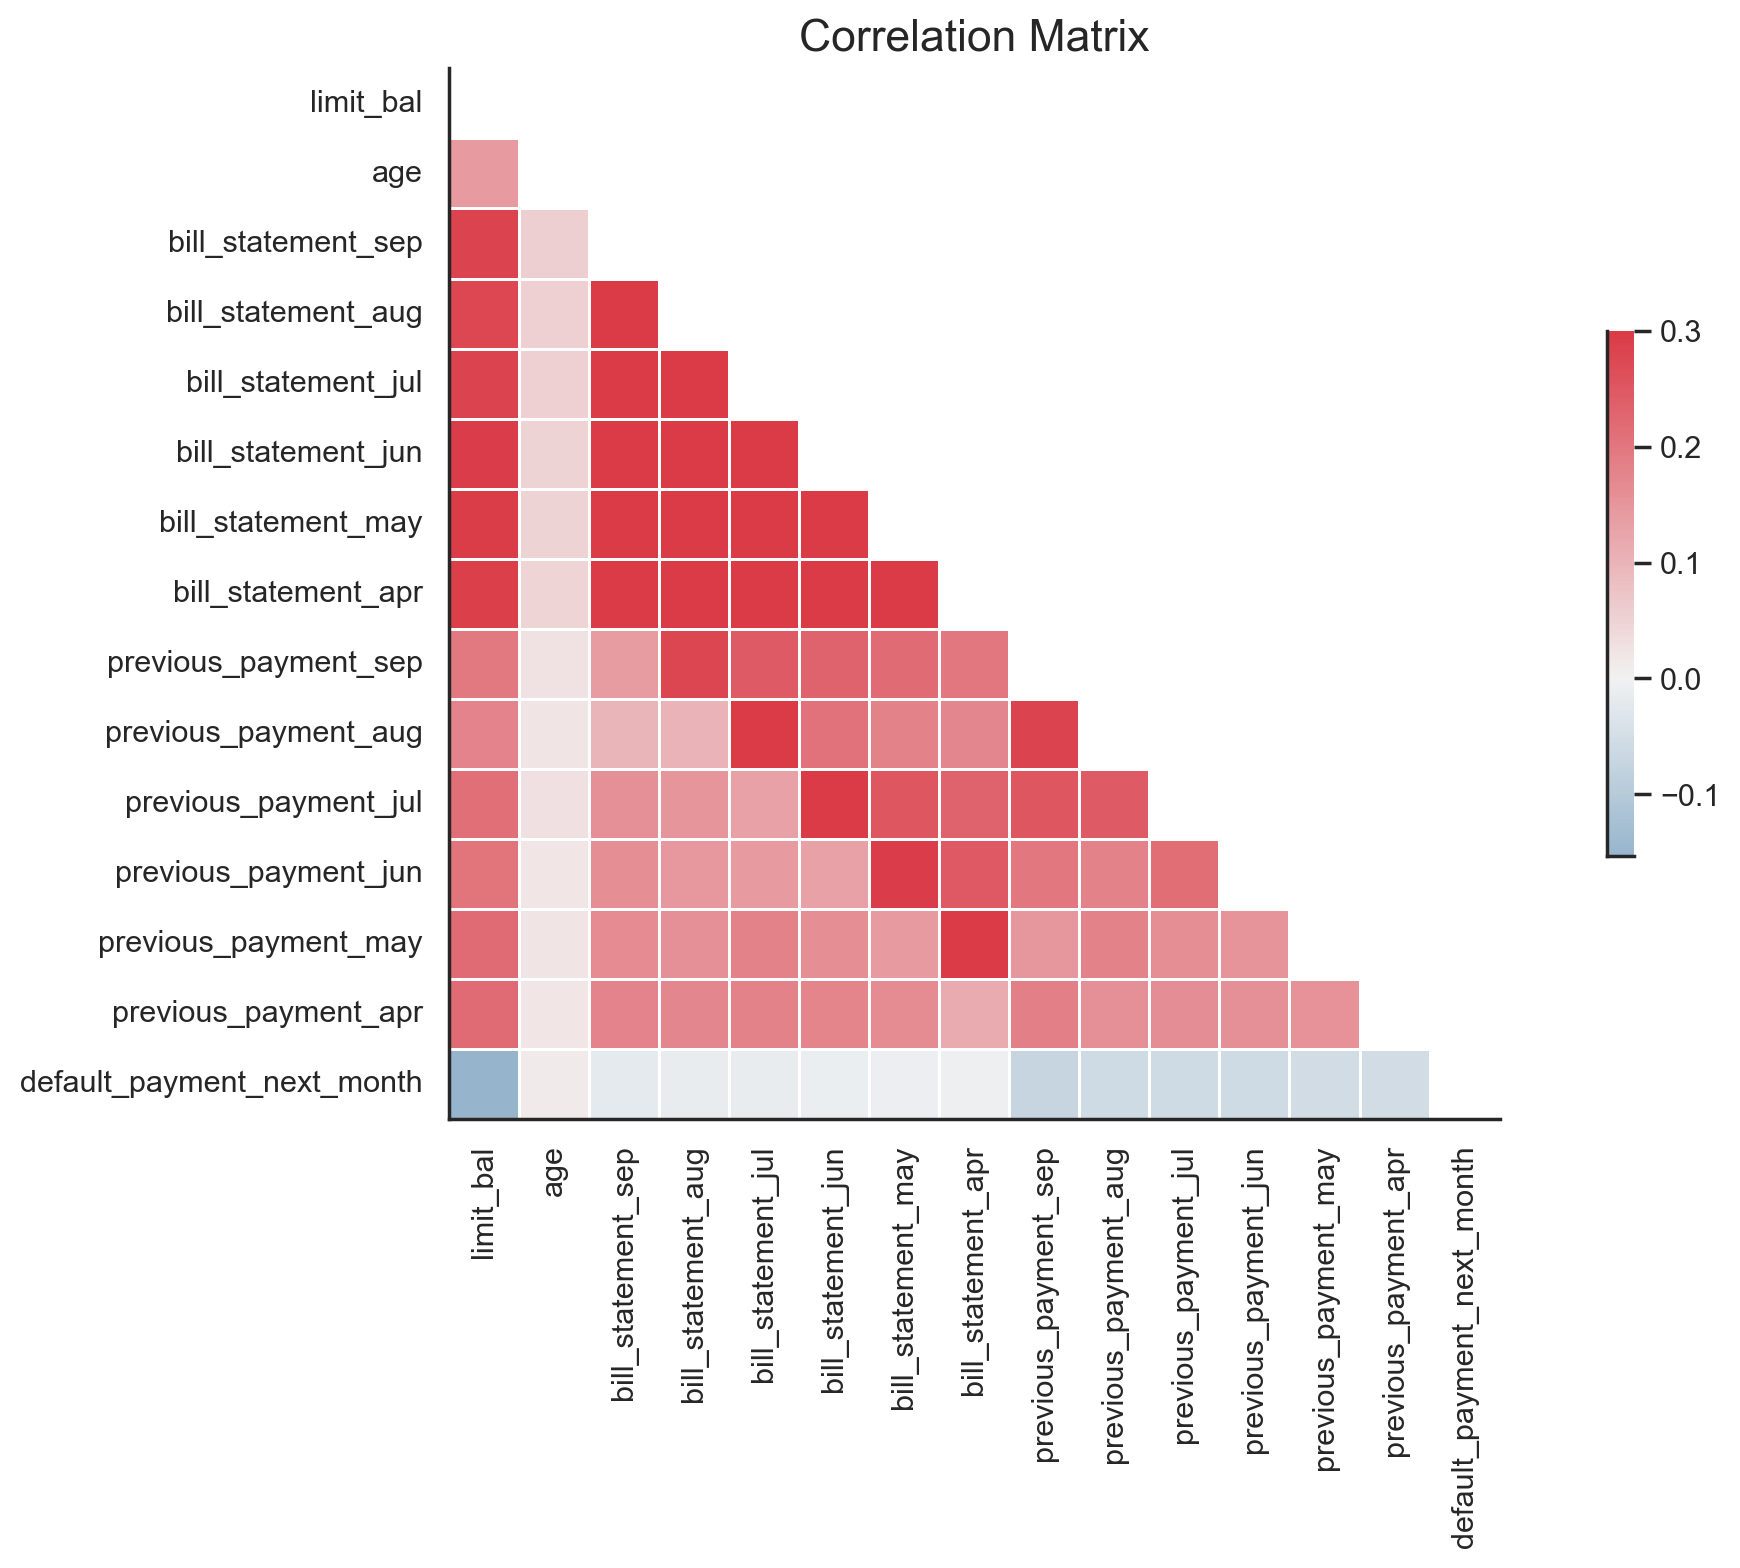

In [26]:
corr_mat = df.select_dtypes(include="number").corr()    
plot_correlation_matrix(corr_mat)

sns.despine()
plt.tight_layout()

From above, "age" seems uncorrelatedto anyof the other features.

2.7 We can also directly inspect the correlation between the features (numerical) and the target:

In [27]:
df.select_dtypes(include="number").corr()[["default_payment_next_month"]]

default_payment_next_month
limit_bal                                    -0.153520
age                                           0.014491
bill_statement_sep                           -0.019644
bill_statement_aug                           -0.014193
bill_statement_jul                           -0.014076
bill_statement_jun                           -0.010156
bill_statement_may                           -0.006760
bill_statement_apr                           -0.005372
previous_payment_sep                         -0.072929
previous_payment_aug                         -0.058579
previous_payment_jul                         -0.056250
previous_payment_jun                         -0.056827
previous_payment_may                         -0.055124
previous_payment_apr                         -0.053183
default_payment_next_month                    1.000000

2.8 Analyze the distribution of age in groups using boxplots:

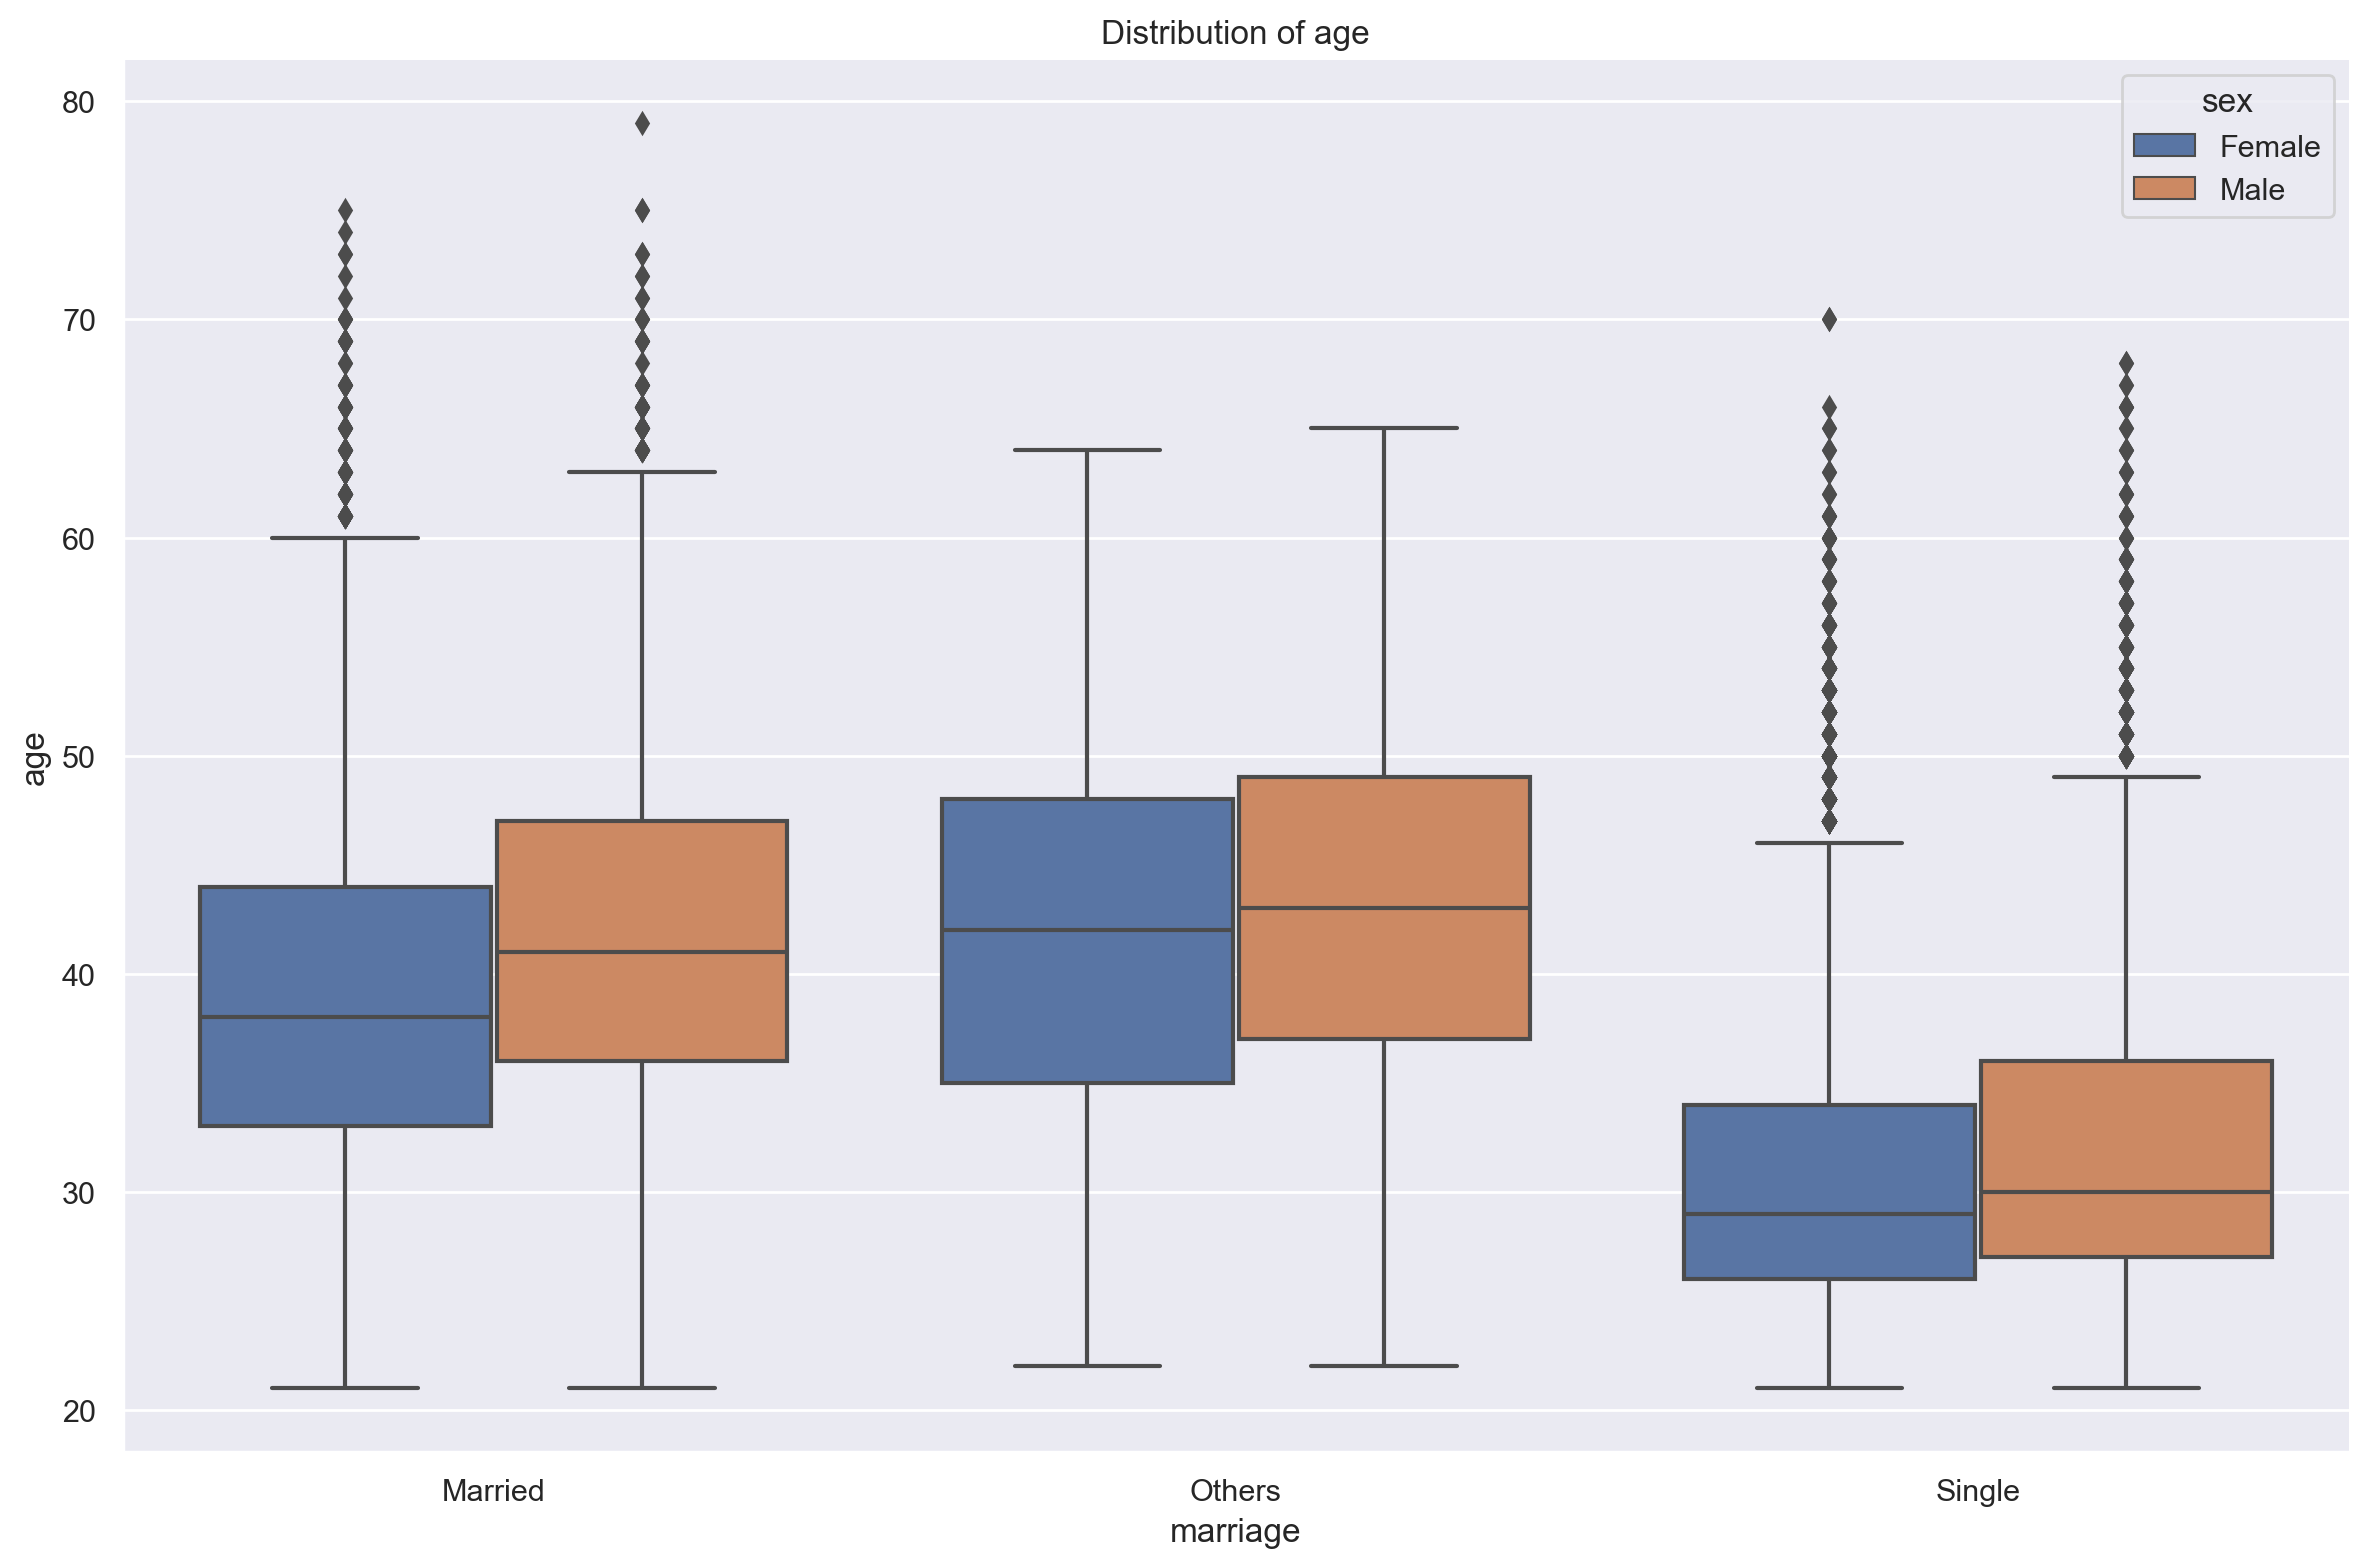

In [28]:
ax = sns.boxplot(data=df, y="age", x="marriage", hue="sex");
ax.set_title("Distribution of age")

sns.despine()
plt.tight_layout()

The distributions seem quite similar within marital groups, with men always having higher median age.

2.9 Plot the distribution of limit balance for each gender and education level:

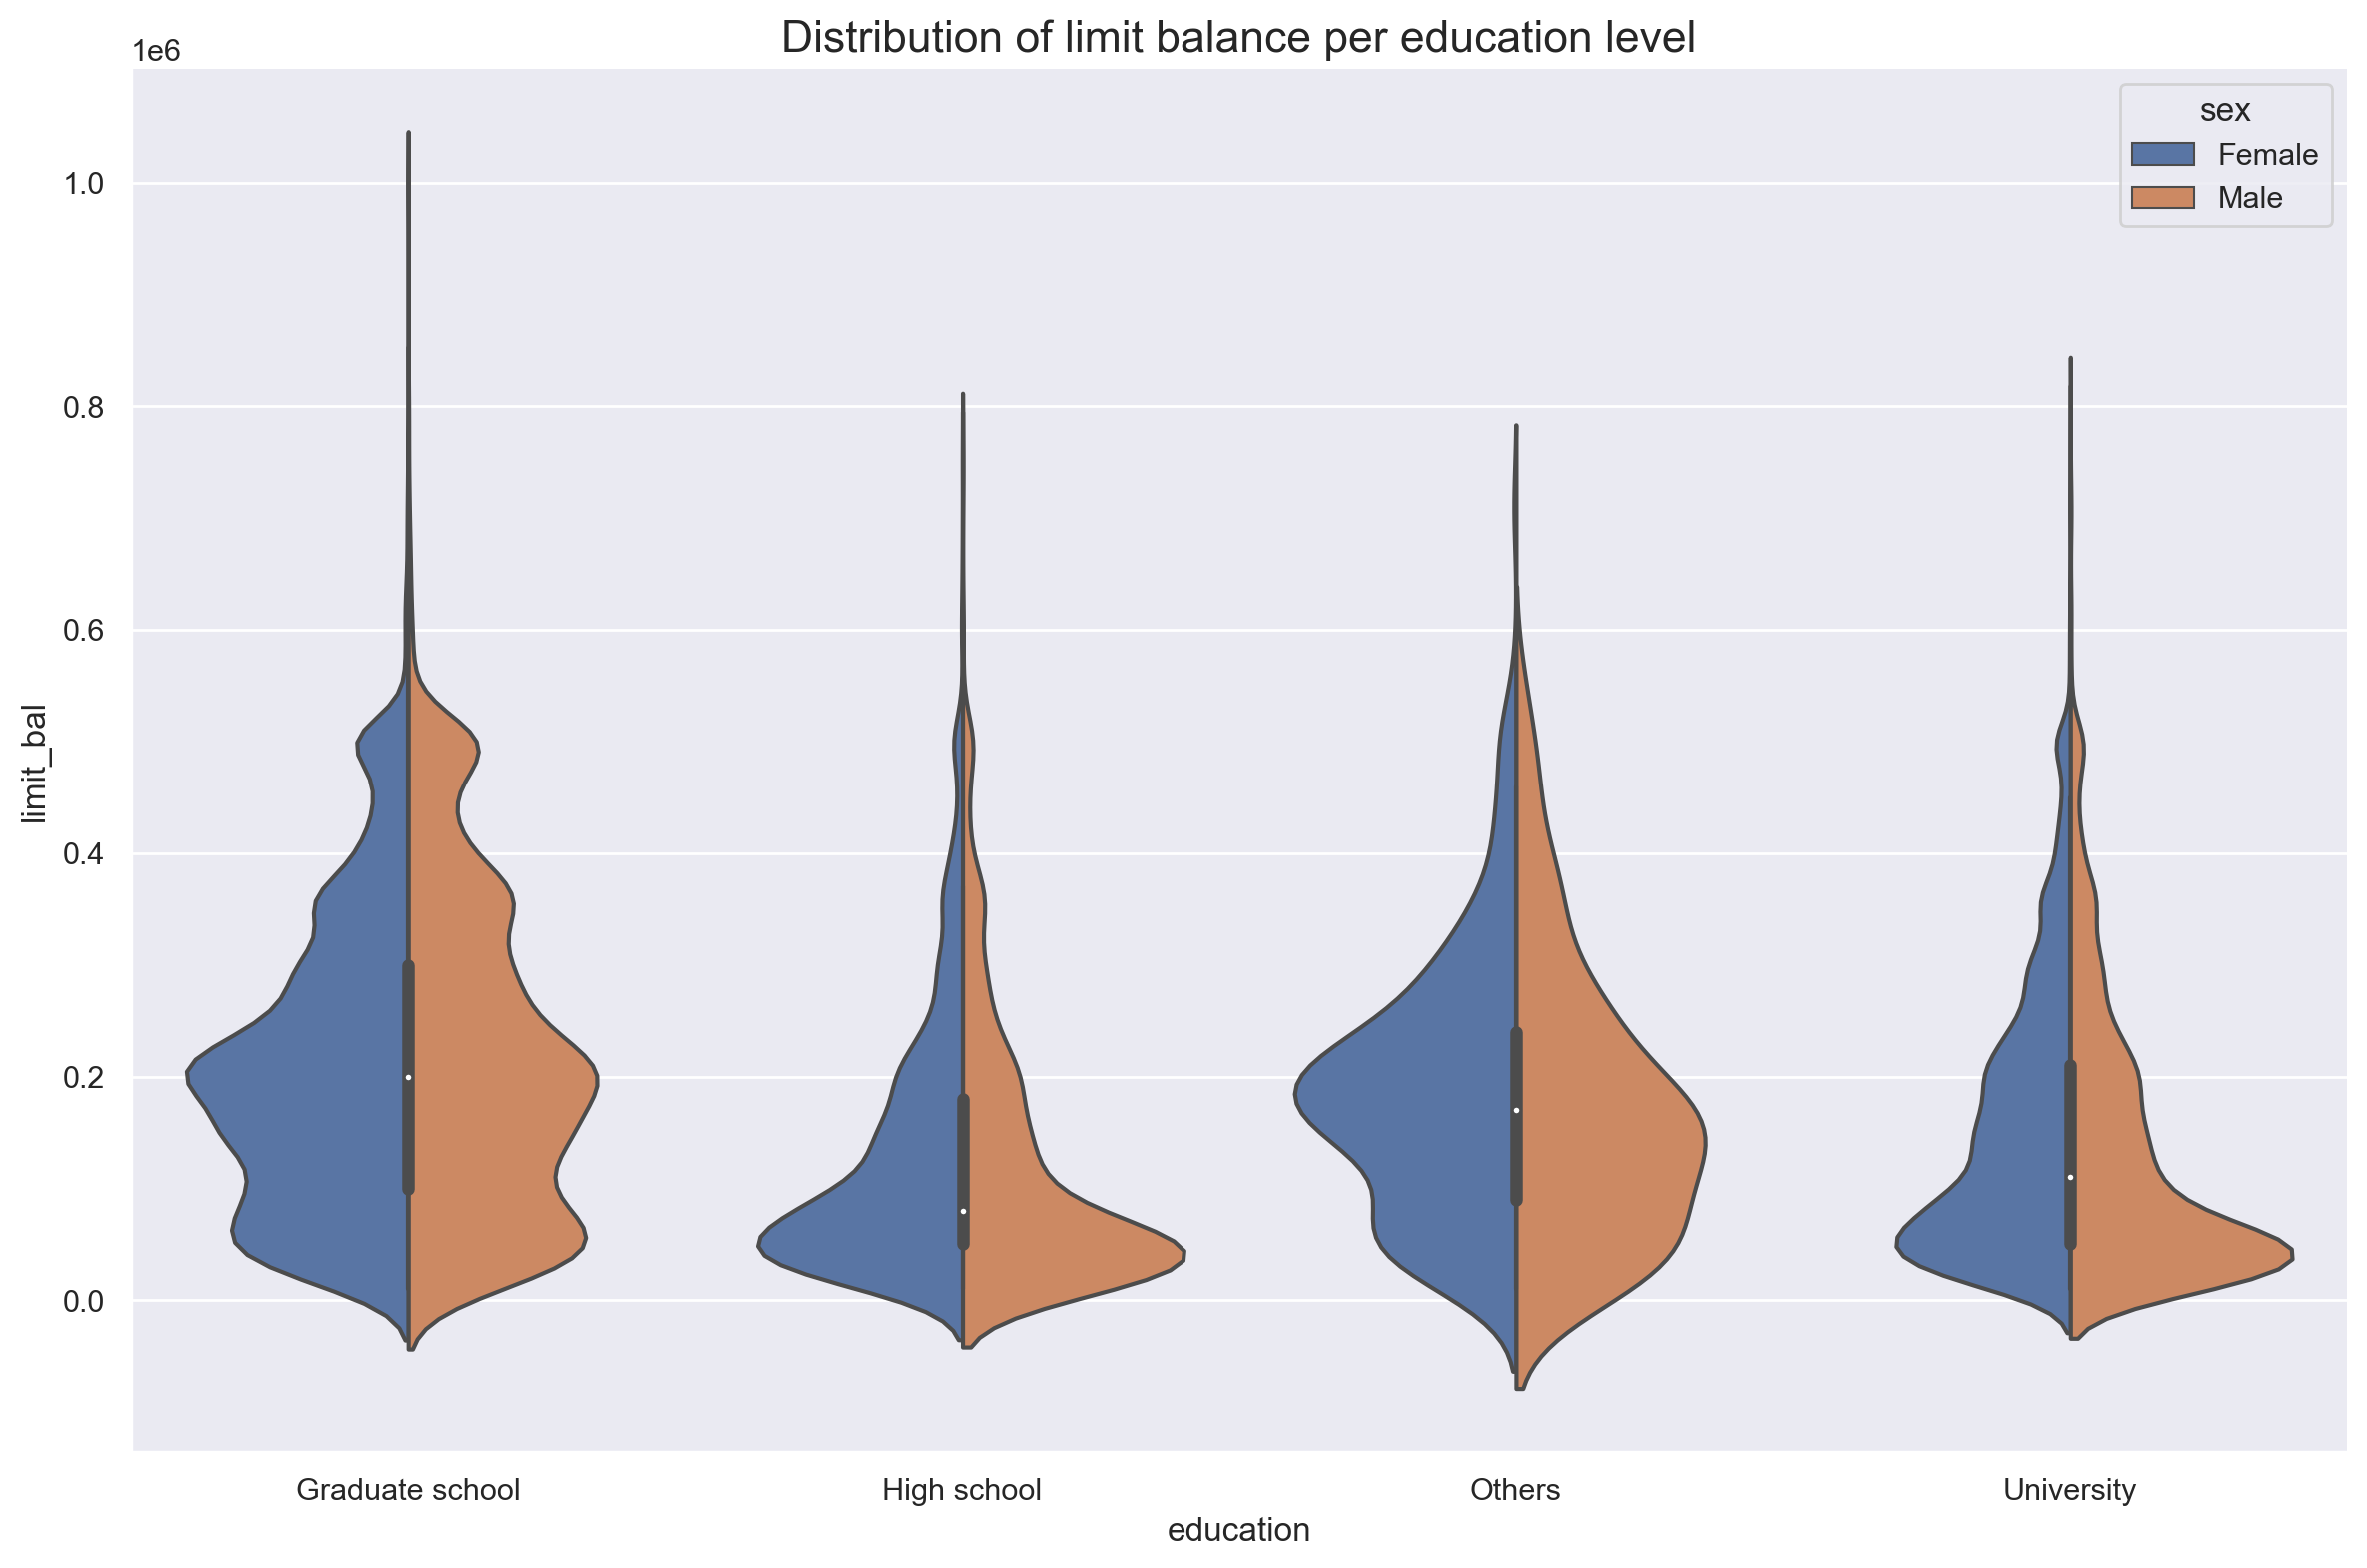

In [29]:
ax = sns.violinplot(x="education", y="limit_bal", 
                    hue="sex", split=True, data=df)
ax.set_title(
    "Distribution of limit balance per education level", 
    fontsize=16
)

sns.despine()
plt.tight_layout()

From above:
<br>
1. there are few differences b/w the sexes;
2. the largest balance appears in "Graduate school" group;
3. the shape of the distribution is different per education level.

The following code plots the same information, without splitting the violin plots.

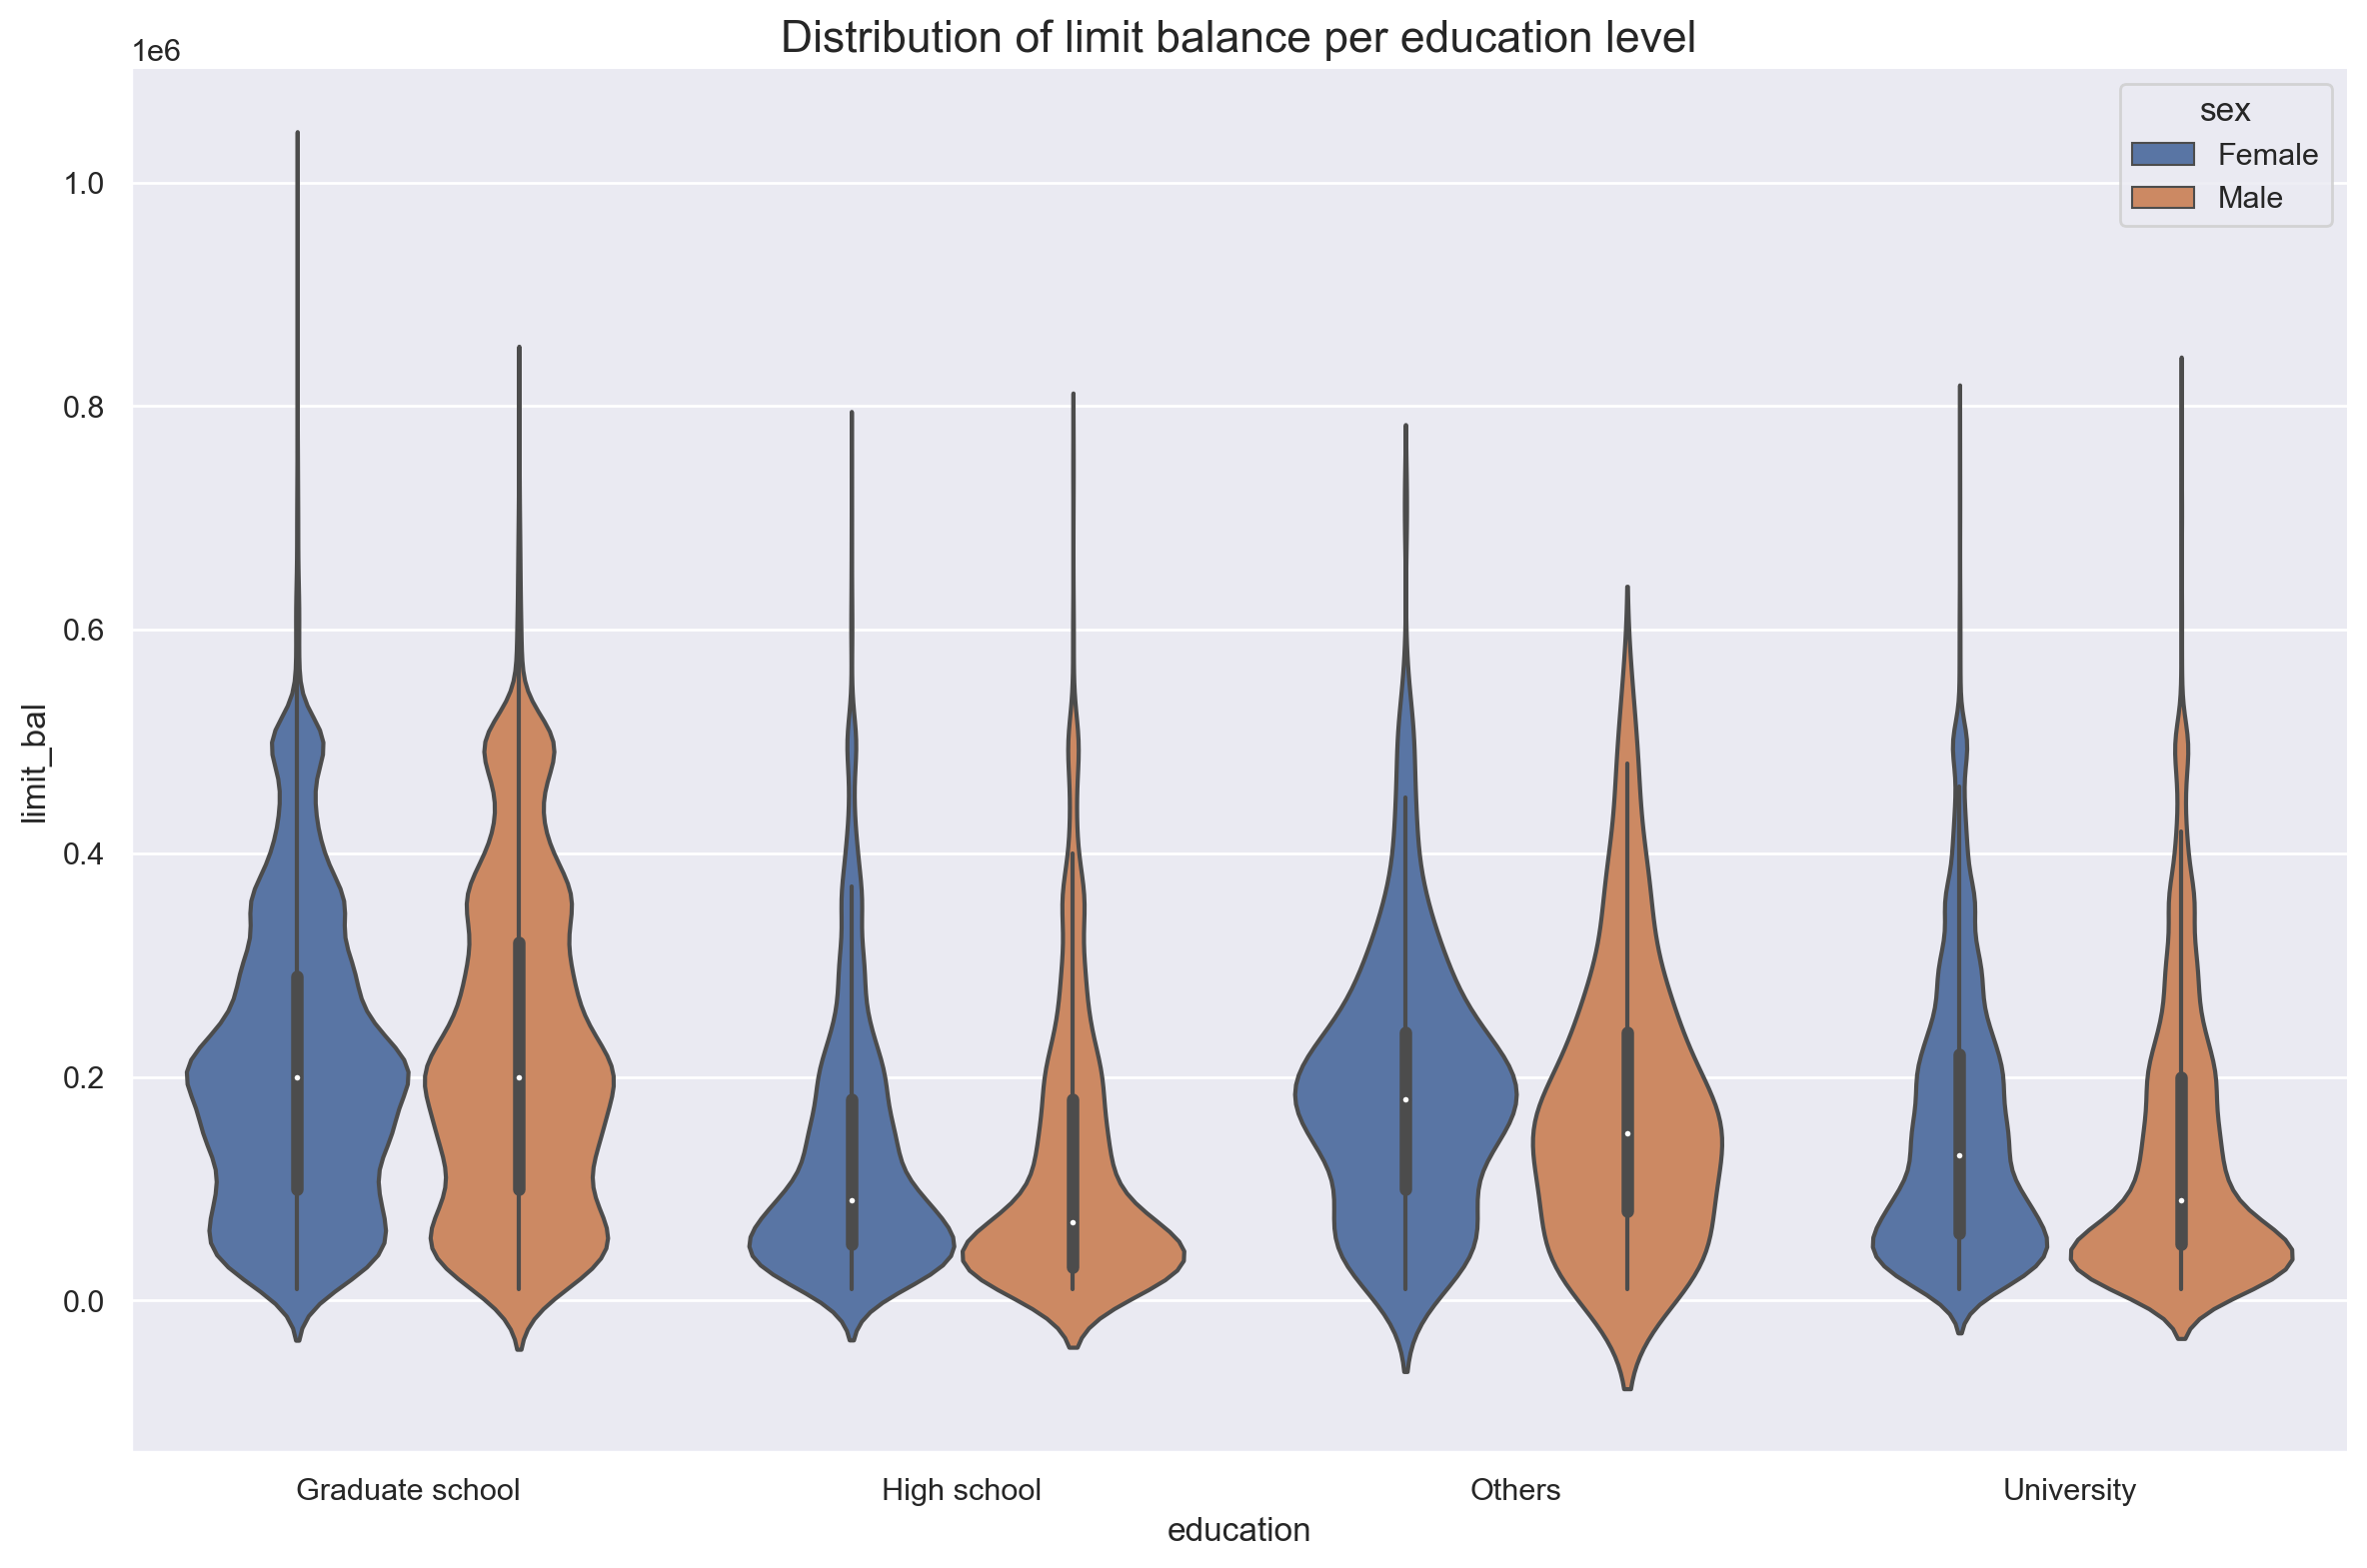

In [30]:
ax = sns.violinplot(x="education", y="limit_bal", 
                    hue="sex", data=df)
ax.set_title("Distribution of limit balance per education level", 
             fontsize=16)

sns.despine()
plt.tight_layout()

2.10 Investigate the distribution of the target variable per gender and education level:

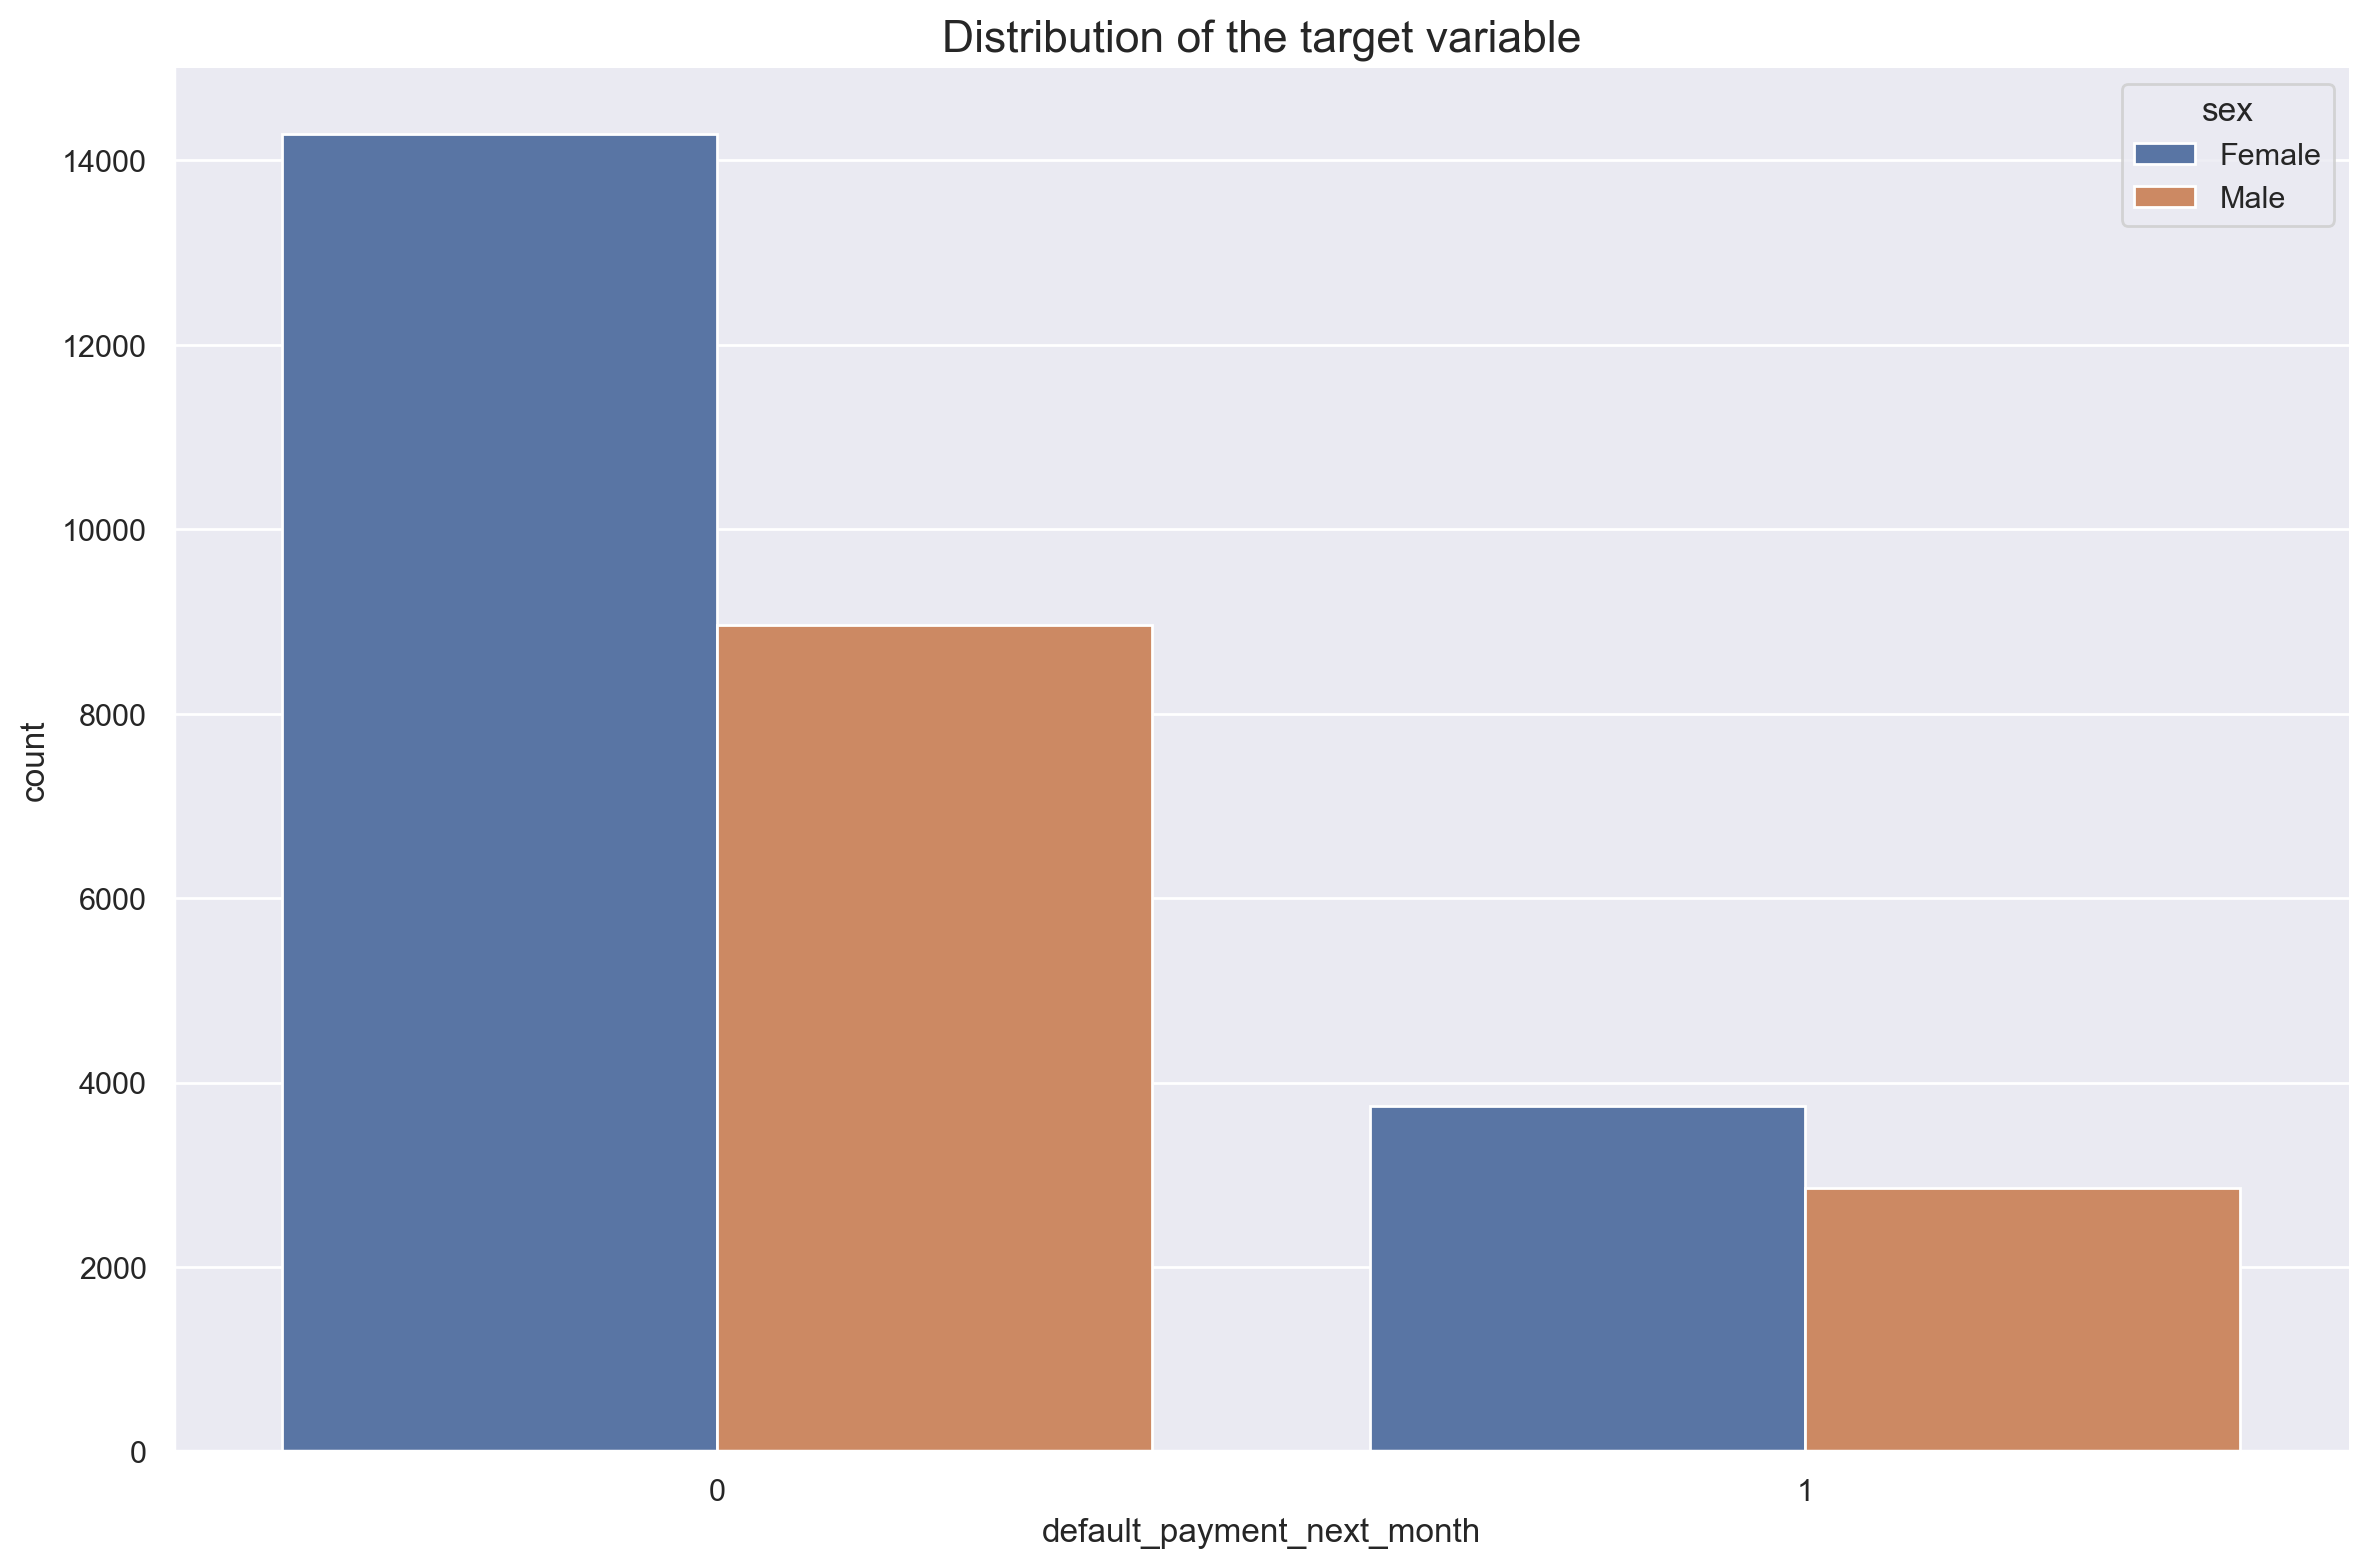

In [31]:
ax = sns.countplot(x="default_payment_next_month", hue="sex", data=df)
ax.set_title("Distribution of the target variable", fontsize=16)

sns.despine()
plt.tight_layout()

From above, we can see the default rate is higher among male.

2.11 Investigate the percentage of defaults per education level:

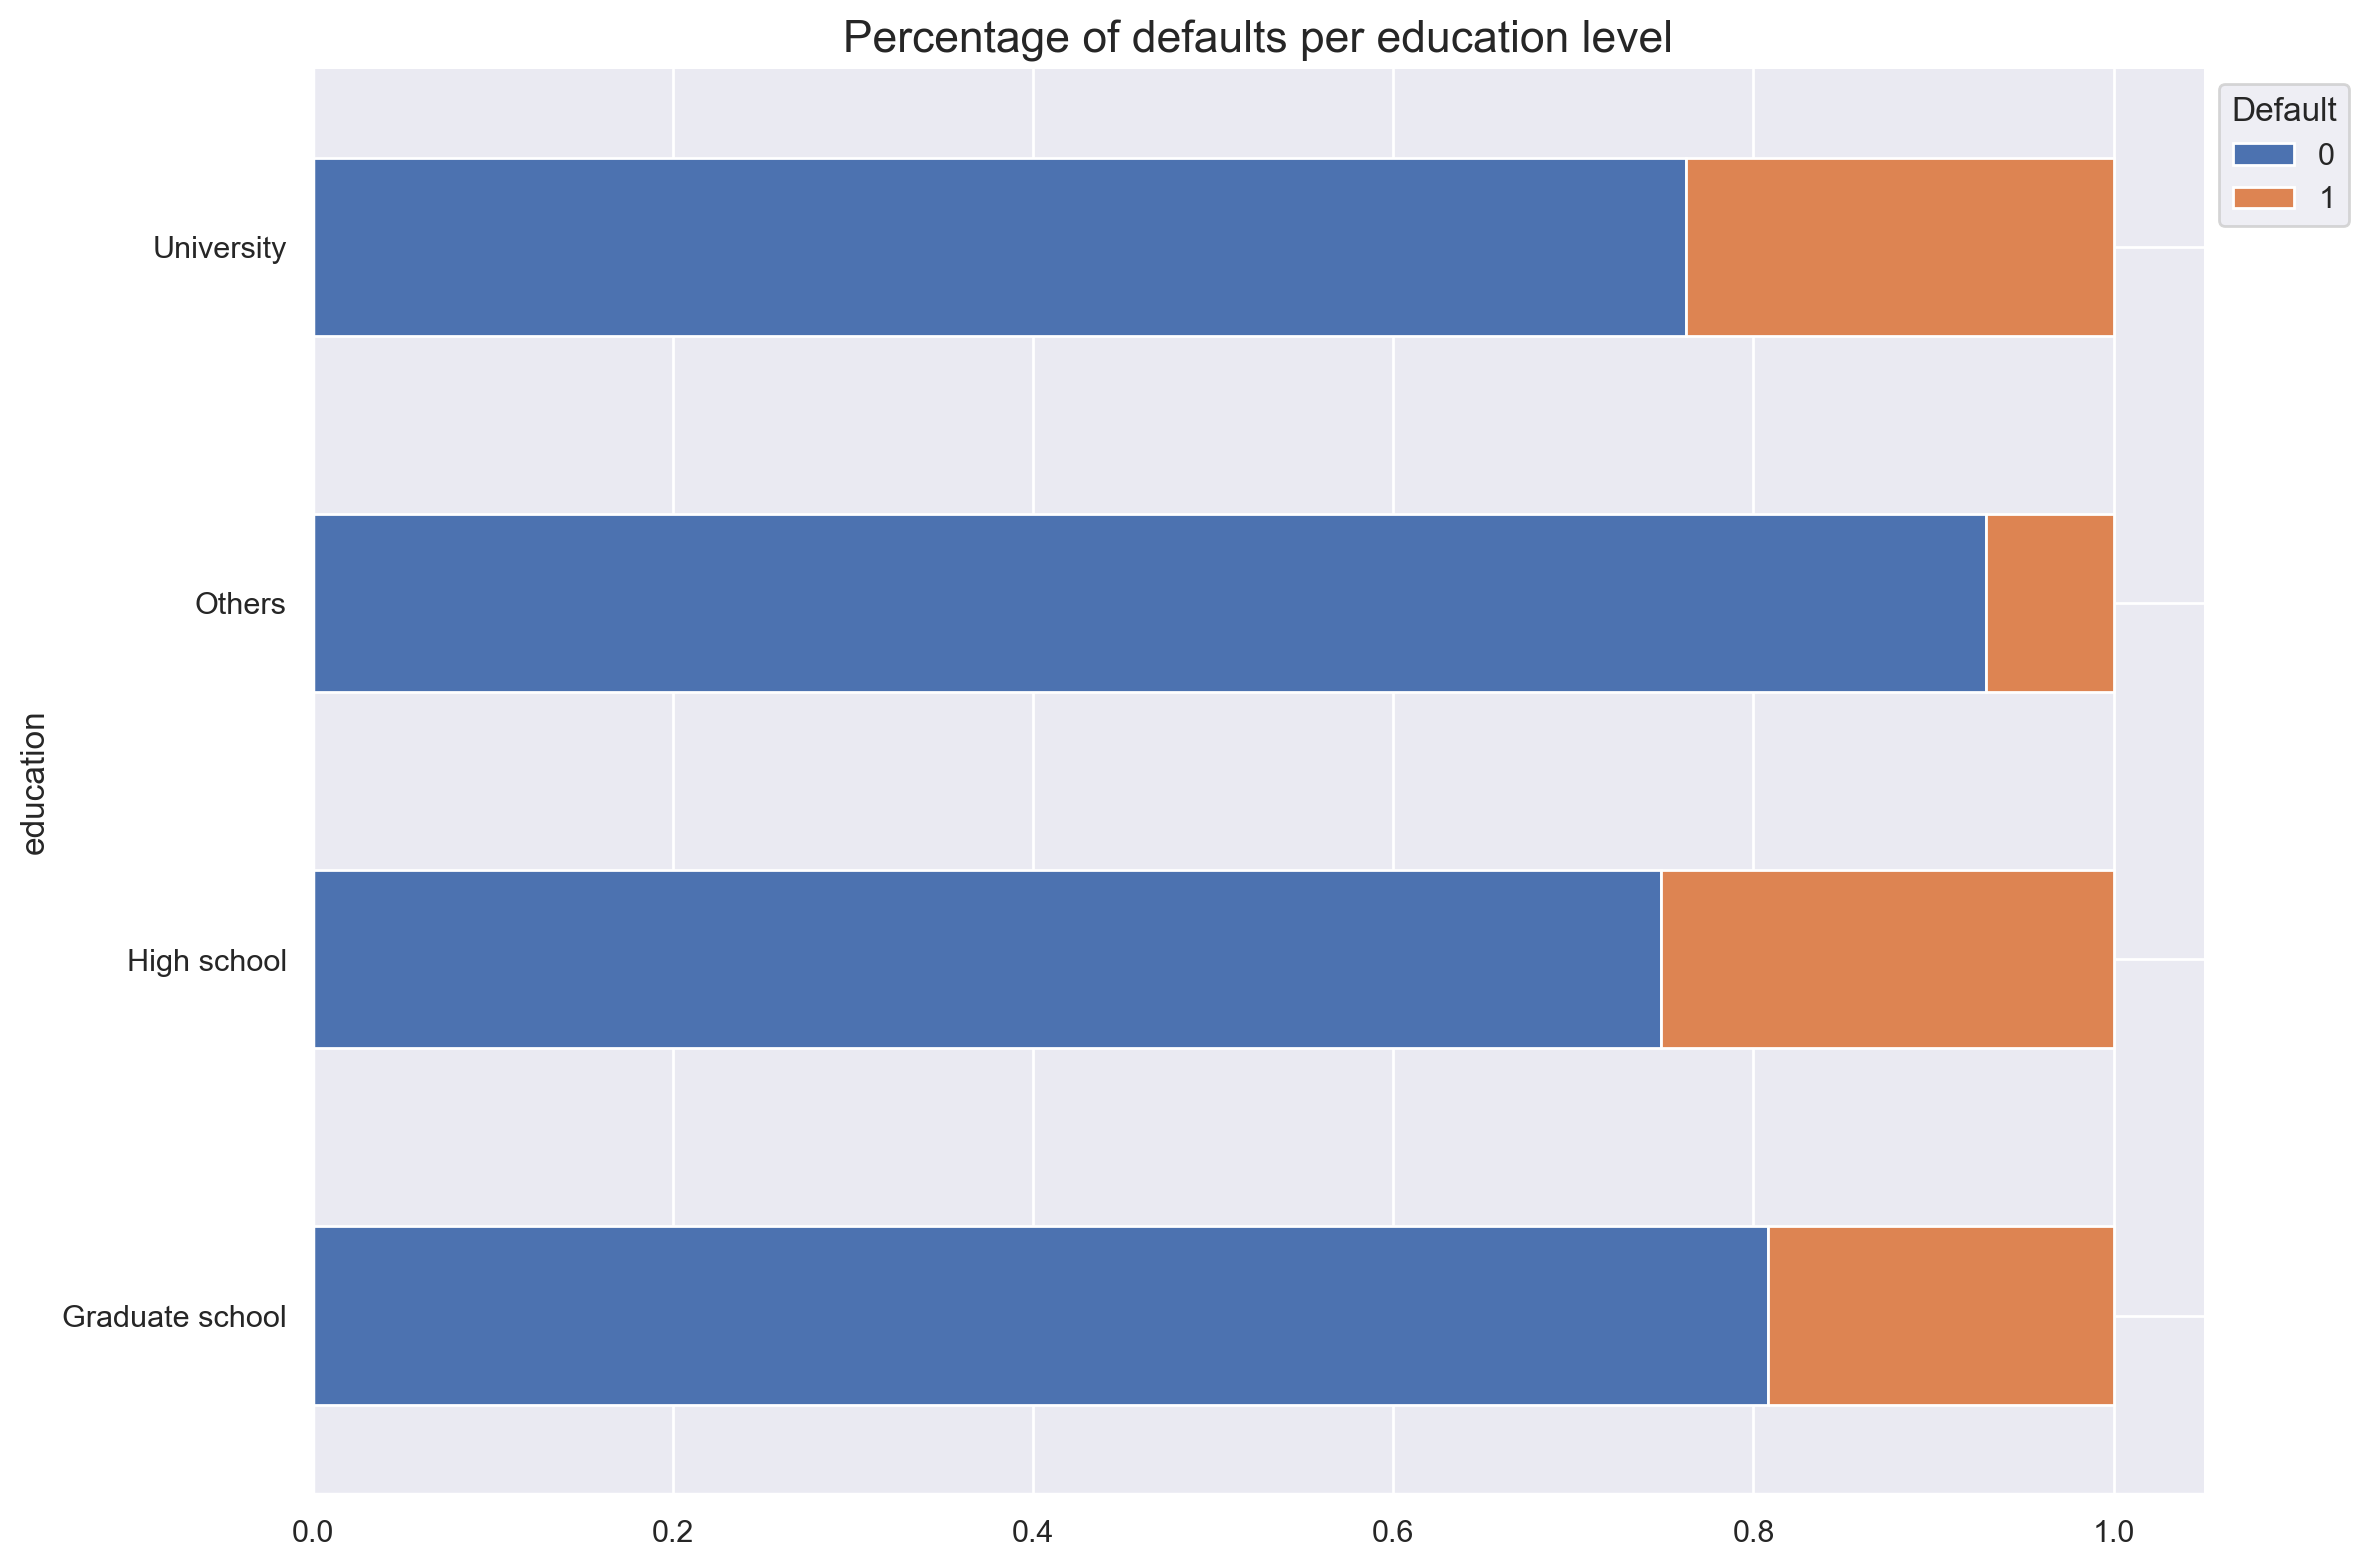

In [32]:
ax = df.groupby("education")["default_payment_next_month"] \
       .value_counts(normalize=True) \
       .unstack() \
       .plot(kind="barh", stacked=True)
ax.set_title("Percentage of defaults per education level", 
             fontsize=16)
ax.legend(title="Default", bbox_to_anchor=(1,1)) 

sns.despine()
plt.tight_layout()

Generally, "High school" customers are more likely to default.

2.12 Alternatively, we can generates a comprehensive summary of the dataset.

In [ ]:
# !pip install pandas-profiling

In [ ]:
# pip install -U ydata-profiling

In [ ]:
# pip install --upgrade numba==0.58.1

In [ ]:
# pip install --upgrade pandas

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Loan Default Dataset EDA")
profile

Save the reports as an HTML file.

In [ ]:
profile.to_file("loan_default_eda.html")

<br>
<br>

3. Splitting the data into training and test sets

In [ ]:
# import pandas as pd
# df = pd.read_csv("../Datasets/credit_card_default.csv", na_values="")

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

3.1 Separate the target variable (default in October) from the features:

In [34]:
X = df.copy()
y = X.pop("default_payment_next_month")

3.2 Split the data into training and test sets:
<br>
<br>
There are 3 approaches we can use (listed below).  We will use the split from Approach 3 (3.2.3) for later part (Section 4 and below): 

3.2.1 Split the data randomly into training and test sets without shuffling:
<br>
In this approach, we randomly put 80% of data in to training set, and rest 20% into test set.
<br>
For reproducibility, we set random seed = 42.  You can change it to a diferent number.

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

3.2.2 Split the data into training and test sets without shuffling:
<br>
In this approach, we put first 80% of data in to training set, and rest 20% into test set.
<br>
We use this approach if we want to preserve the order in data.

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, shuffle=False
# )

3.2.3 Split the data into training and test sets with stratification:
<br>
In this approach, we split the data with stratification.
<br>
That is, we want both the training and test sets have an almost identical distribution of the target variable.
<br>
This is very important if we have an imbalanced data.  For example, in our dataset, only 22% of the customers default.  So if we randomly split the data, we could have incorrect results.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

3.3 Verify that the ratio of the target is preserved:

In [36]:
print("Target distribution - train")
print(y_train.value_counts(normalize=True).values)
print("Target distribution - test")
print(y_test.value_counts(normalize=True).values)

Target distribution - train
[0.77879167 0.22120833]
Target distribution - test
[0.77883333 0.22116667]


3.4 Alternatively, we can split the original dataset into Training (70%) - Validation (10%) - Test (20%).
<br>
<br>
This split is also commonly used.  
<br>
The Validation set is udes for frequent evaluation and tuning of the model's hyperparameters.
<br>
<br>
To do so, we first train the model multiple times using the training set, and each time we get a different value of the hyperparameters.
<br>
Next, we will use the Validation set to pick the best model from above.
<br>
Lastly, we test the best model in Test set.

In [ ]:
# import numpy as np

# # define the size of the validation and test sets
# VALID_SIZE = 0.1
# TEST_SIZE = 0.2

# # create the initial split - training and temp
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X, y, 
#     test_size=(VALID_SIZE + TEST_SIZE), 
#     stratify=y, 
#     random_state=42
# )

# # calculate the new test size
# new_test_size = np.around(TEST_SIZE / (VALID_SIZE + TEST_SIZE), 2)

# # create the valid and test sets
# X_valid, X_test, y_valid, y_test = train_test_split(
#     X_temp, y_temp, 
#     test_size=new_test_size, 
#     stratify=y_temp, 
#     random_state=42
# )

In [ ]:
# print("Percentage of data in each set ----")
# print(f"Train: {100 * len(X_train) / len(X):.2f}%")
# print(f"Valid: {100 * len(X_valid) / len(X):.2f}%")
# print(f"Test: {100 * len(X_test) / len(X):.2f}%")
# print("")
# print("Class distribution in each set ----")
# print(f"Train: {y_train.value_counts(normalize=True).values}")
# print(f"Valid: {y_valid.value_counts(normalize=True).values}")
# print(f"Test: {y_test.value_counts(normalize=True).values}")

<br>
<br>


4. Identifying and dealing with missing values

In most real-life cases, we do not work with clean, complete data.
<br>
<br>
Some machine learning algorithms (such as decision trees) can accout for missing data.
<br>
Many other algorithms cannot do so.  As a result, we need to handle missing value before any analyses.

!!!Important!!!
<br>
We should only impute features, not the target variable!!!

Solutions for missing data:
<br>
1. Drop observations with one or more missing values;
2. Drop the entire column (feature) if most of them are missing;
3. Replace the missing values with a value far outside the possible range (i.e., age = 999).  The algorithms can treat it as a special value, indicting missing data;
4. If the data is time series, we can use 1) forward-filling (take the last-known observation before missing); 2) backward-filling (first-known after missing one); or interpolation (linear);
5. Hot-deck imputation. We first sort the feature with missing data by other (one or more) correlated features, then fill the missing data with previous non-missing value in the same feature.
6. Replace the missing with an aggregate metric. For continuous data, use average or median (if exist outliers); for categotical data, use mode.
7. Replace the missing with an aggregate metric calculated by group (for example, male vs. female);
8. ML-based approach. We can treat the feature with missing values as target, and use other features to predict the missing ones.

In [37]:
import pandas as pd 
import missingno as msno
from sklearn.impute import SimpleImputer

4.1 Inspect the information about the DataFrame:

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   limit_bal             30000 non-null  int32   
 1   sex                   29850 non-null  category
 2   education             29850 non-null  category
 3   marriage              29850 non-null  category
 4   age                   29850 non-null  float32 
 5   payment_status_sep    30000 non-null  category
 6   payment_status_aug    30000 non-null  category
 7   payment_status_jul    30000 non-null  category
 8   payment_status_jun    30000 non-null  category
 9   payment_status_may    30000 non-null  category
 10  payment_status_apr    30000 non-null  category
 11  bill_statement_sep    30000 non-null  int32   
 12  bill_statement_aug    30000 non-null  int32   
 13  bill_statement_jul    30000 non-null  int32   
 14  bill_statement_jun    30000 non-null  int32   
 15  bi

In [39]:
X.isnull().sum()

limit_bal                 0
sex                     150
education               150
marriage                150
age                     150
payment_status_sep        0
payment_status_aug        0
payment_status_jul        0
payment_status_jun        0
payment_status_may        0
payment_status_apr        0
bill_statement_sep        0
bill_statement_aug        0
bill_statement_jul        0
bill_statement_jun        0
bill_statement_may        0
bill_statement_apr        0
previous_payment_sep      0
previous_payment_aug      0
previous_payment_jul      0
previous_payment_jun      0
previous_payment_may      0
previous_payment_apr      0
dtype: int64

4.2 Visualize the nullity of the DataFrame:

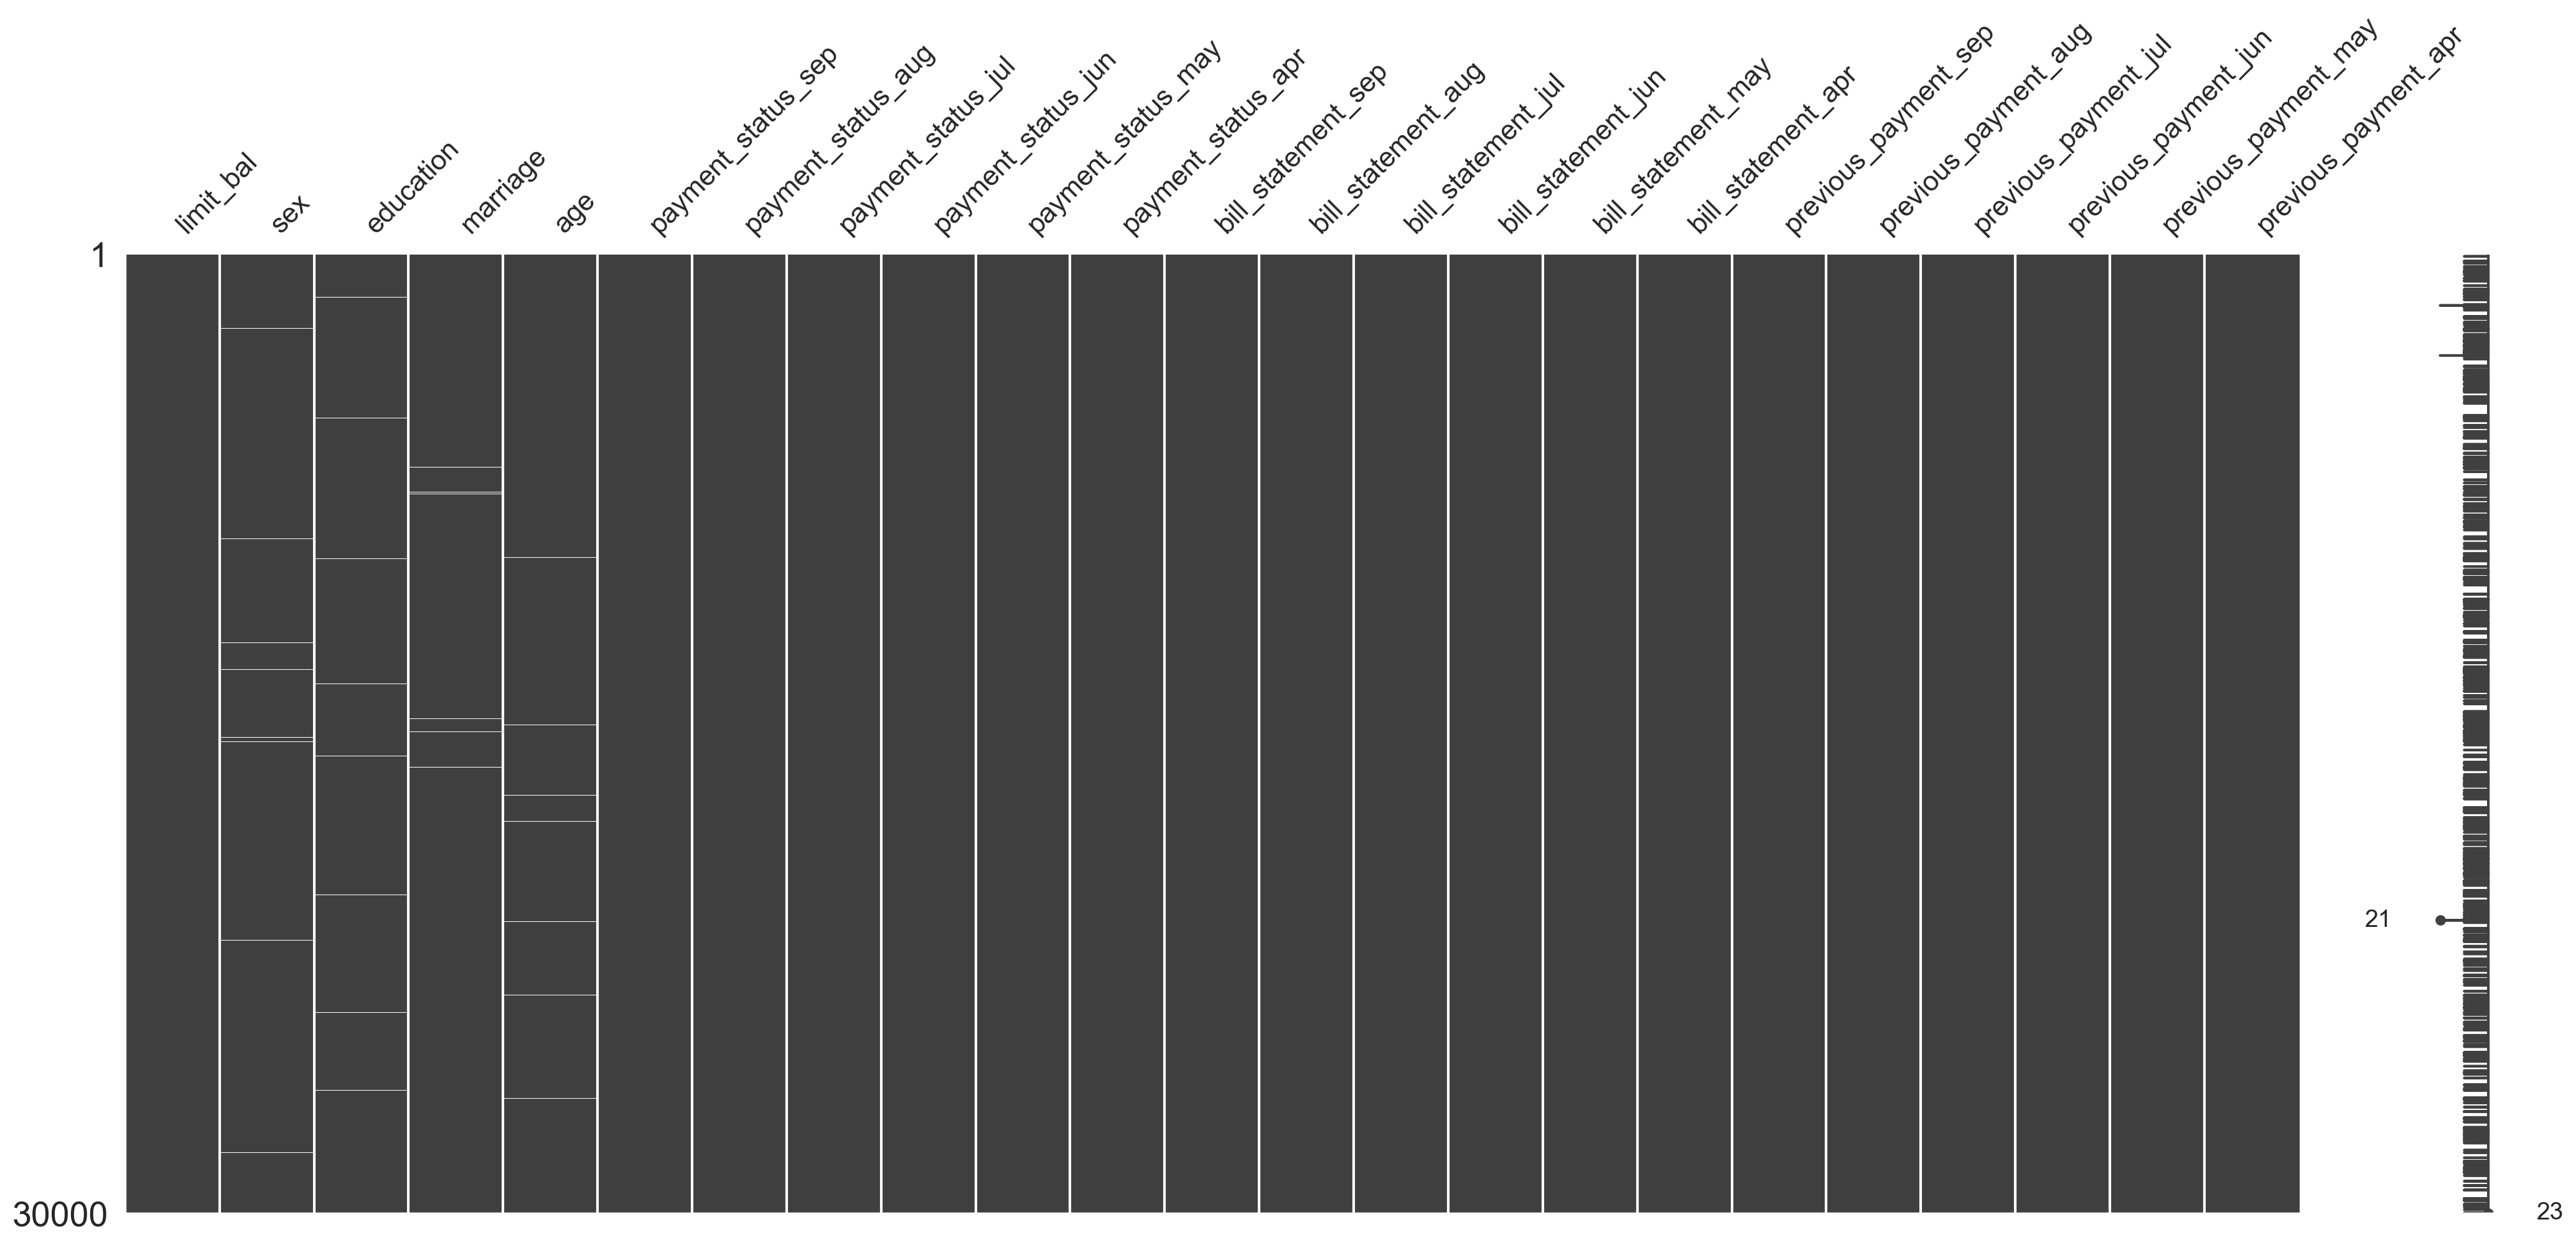

In [40]:
msno.matrix(X)

sns.despine()

Alternatively, we can generate other types of visualizations offered by missingno.

1. msno.bar: bar chart representing the nullity in each features.

In [ ]:
# msno.bar(X)

# sns.despine()
# plt.show()

2. msno.heatmap: visualizes the nullity correlation.

In [ ]:
# msno.heatmap(X)

# sns.despine()
# plt.show()

3. msno.dendrogram: suing hierarchical clustering to bin features against one other by their nullity correlation.

In [ ]:
# msno.dendrogram(X)

# sns.despine()

4.3 Define columns with missing values per data type:
<br>
<br>
We have different treatment for numerical and categorical features. So we need to separate them first.

In [41]:
NUM_FEATURES = ["age"]
CAT_FEATURES = ["sex", "education", "marriage"]

4.4 Impute the numerical feature:

In [42]:
for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy="median")
    num_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

In [ ]:
# alternative method using pandas

# for feature in NUM_FEATURES:
#     median_value = X_train[feature].median()
#     X_train.loc[:, feature].fillna(median_value, inplace=True)
#     X_test.loc[:, feature].fillna(median_value, inplace=True)

4.5 Impute the categorical features:

In [43]:
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    cat_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

In [ ]:
# alternative method using pandas

# for feature in CAT_FEATURES:
#     mode_value = X_train[feature].mode().values[0]
#     X_train.loc[:, feature].fillna(mode_value, inplace=True)
#     X_test.loc[:, feature].fillna(mode_value, inplace=True)

4.6 Verify that there are no missing values:

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 22788 to 27126
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   limit_bal             24000 non-null  int32   
 1   sex                   24000 non-null  category
 2   education             24000 non-null  category
 3   marriage              24000 non-null  category
 4   age                   24000 non-null  float32 
 5   payment_status_sep    24000 non-null  category
 6   payment_status_aug    24000 non-null  category
 7   payment_status_jul    24000 non-null  category
 8   payment_status_jun    24000 non-null  category
 9   payment_status_may    24000 non-null  category
 10  payment_status_apr    24000 non-null  category
 11  bill_statement_sep    24000 non-null  int32   
 12  bill_statement_aug    24000 non-null  int32   
 13  bill_statement_jul    24000 non-null  int32   
 14  bill_statement_jun    24000 non-null  int32   
 15  bil

4.7 ML-based approaches to imputing missing values
<br>
<br>
1. Multiple Imputation by Chained Equations (MISE): available in "scikit-learn" under "IterativeImputer";
2. Nearest neighbors imputation: available in "scikit-learn" under "KNNImputer";
3. MissForest: available in "miceforest" library (fast, memory-efficient MISE with LightGBM) or "missingpy" library.

<br>
<br>

5. Encoding categorical variables

Most machine learning algorithms work exclusively with numeric data.
<br>
As a result, we have to encode categorical features into a representation compatible with ML models.
<br>
<br>
1. Label Encoder:
<br>
In this approach, we simply replace the categorical values with distince numeric values.  For example, if we have 3 classes, we represente them as [0, 1, 2].
<br>
One potential problem is that it introduces a relationship between categories (i.e., 0 < 1 < 2).
<br>
<br>
2. One-hot encoding:
<br>
In this approach, we create binary variable (0 or 1) for each possible values in a features. 
<br>
One potential problem is redundancy. We could create too many binary variables. 

!!!Important!!!
<br>
We do not want to modify the oridinal dataset. Instead, we create a copy of that and work with the copy one.

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

5.1 Use Label Encoder to encode a selected feature:
<br>
We use education level here as an example.
<br>
<br>
For this study, we will use one-hot encoding for all categorical features.  So this part is just a practice.

In [46]:
COL = "education"

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

# X_test_copy[COL].head()

In [47]:
label_enc.classes_

array(['Graduate school', 'High school', 'Others', 'University'],
      dtype=object)

5.2 Select categorical features for one-hot encoding:

In [48]:
cat_features = X_train.select_dtypes(include="category") \
                      .columns \
                      .to_list()

# cat_features = X_train.select_dtypes(include="object") \
#                       .columns \
#                       .to_list()

cat_features

['sex',
 'education',
 'marriage',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr']

We will apply one-hot encoding to the above columns.

5.3 Instantiate the OneHotEncoder object:

In [49]:
one_hot_encoder = OneHotEncoder(sparse=False, 
                                handle_unknown="error", 
                                drop="first")

5.4 Create the column transformer using the one-hot encoder:

In [50]:
one_hot_transformer = ColumnTransformer(
    [("one_hot", one_hot_encoder, cat_features)],
    remainder="passthrough",
    verbose_feature_names_out=False
)

5.5 Fit the transformer:

In [51]:
one_hot_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])],
                  verbose_feature_names_out=False)

5.6 Apply the transformations to both training and test sets:

In [52]:
col_names = one_hot_transformer.get_feature_names_out()

X_train_ohe = pd.DataFrame(one_hot_transformer.transform(X_train), 
                           columns=col_names, 
                           index=X_train.index)

X_test_ohe = pd.DataFrame(one_hot_transformer.transform(X_test), 
                          columns=col_names, 
                          index=X_test.index)

Below we can see how one-hot encoding increased the shape of our DataFrame:

In [53]:
# Before
X_train.shape

(24000, 23)

In [54]:
# After
X_train_ohe.shape

(24000, 72)

Save the files if needed.

In [55]:
# X_train_ohe.to_csv("X_train_ohe.csv", index=True)
# X_test_ohe.to_csv("X_test_ohe.csv", index=True)
# y_train.to_csv("y_train.csv", index=True)
# y_test.to_csv("y_test.csv", index=True)

<br>
<br>

6. Fitting a decision tree classifier

The model creates a set of rules, which taken together can be visualized in the form of a tree.
<br>
<br>
The decision trees segment the feature space into a number of smaller regions, by repeatedly splitting the features at a certain value.
<br>
<br>
The prediction in a terminal node (leaf) is made on the basis of mode for classification, and mean for regression.

In [3]:
import pandas as pd

X_train_ohe = pd.read_csv("X_train_ohe.csv", index_col=0)
X_test_ohe = pd.read_csv("X_test_ohe.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)["default_payment_next_month"]
y_test = pd.read_csv("y_test.csv", index_col=0)["default_payment_next_month"]

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

from ML_utils import performance_evaluation_report

6.1 Create the instance of the model, fit it to the training data and create prediction:

In [5]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_ohe, y_train)
y_pred = tree_classifier.predict(X_test_ohe)

6.2 Evaluate the results:

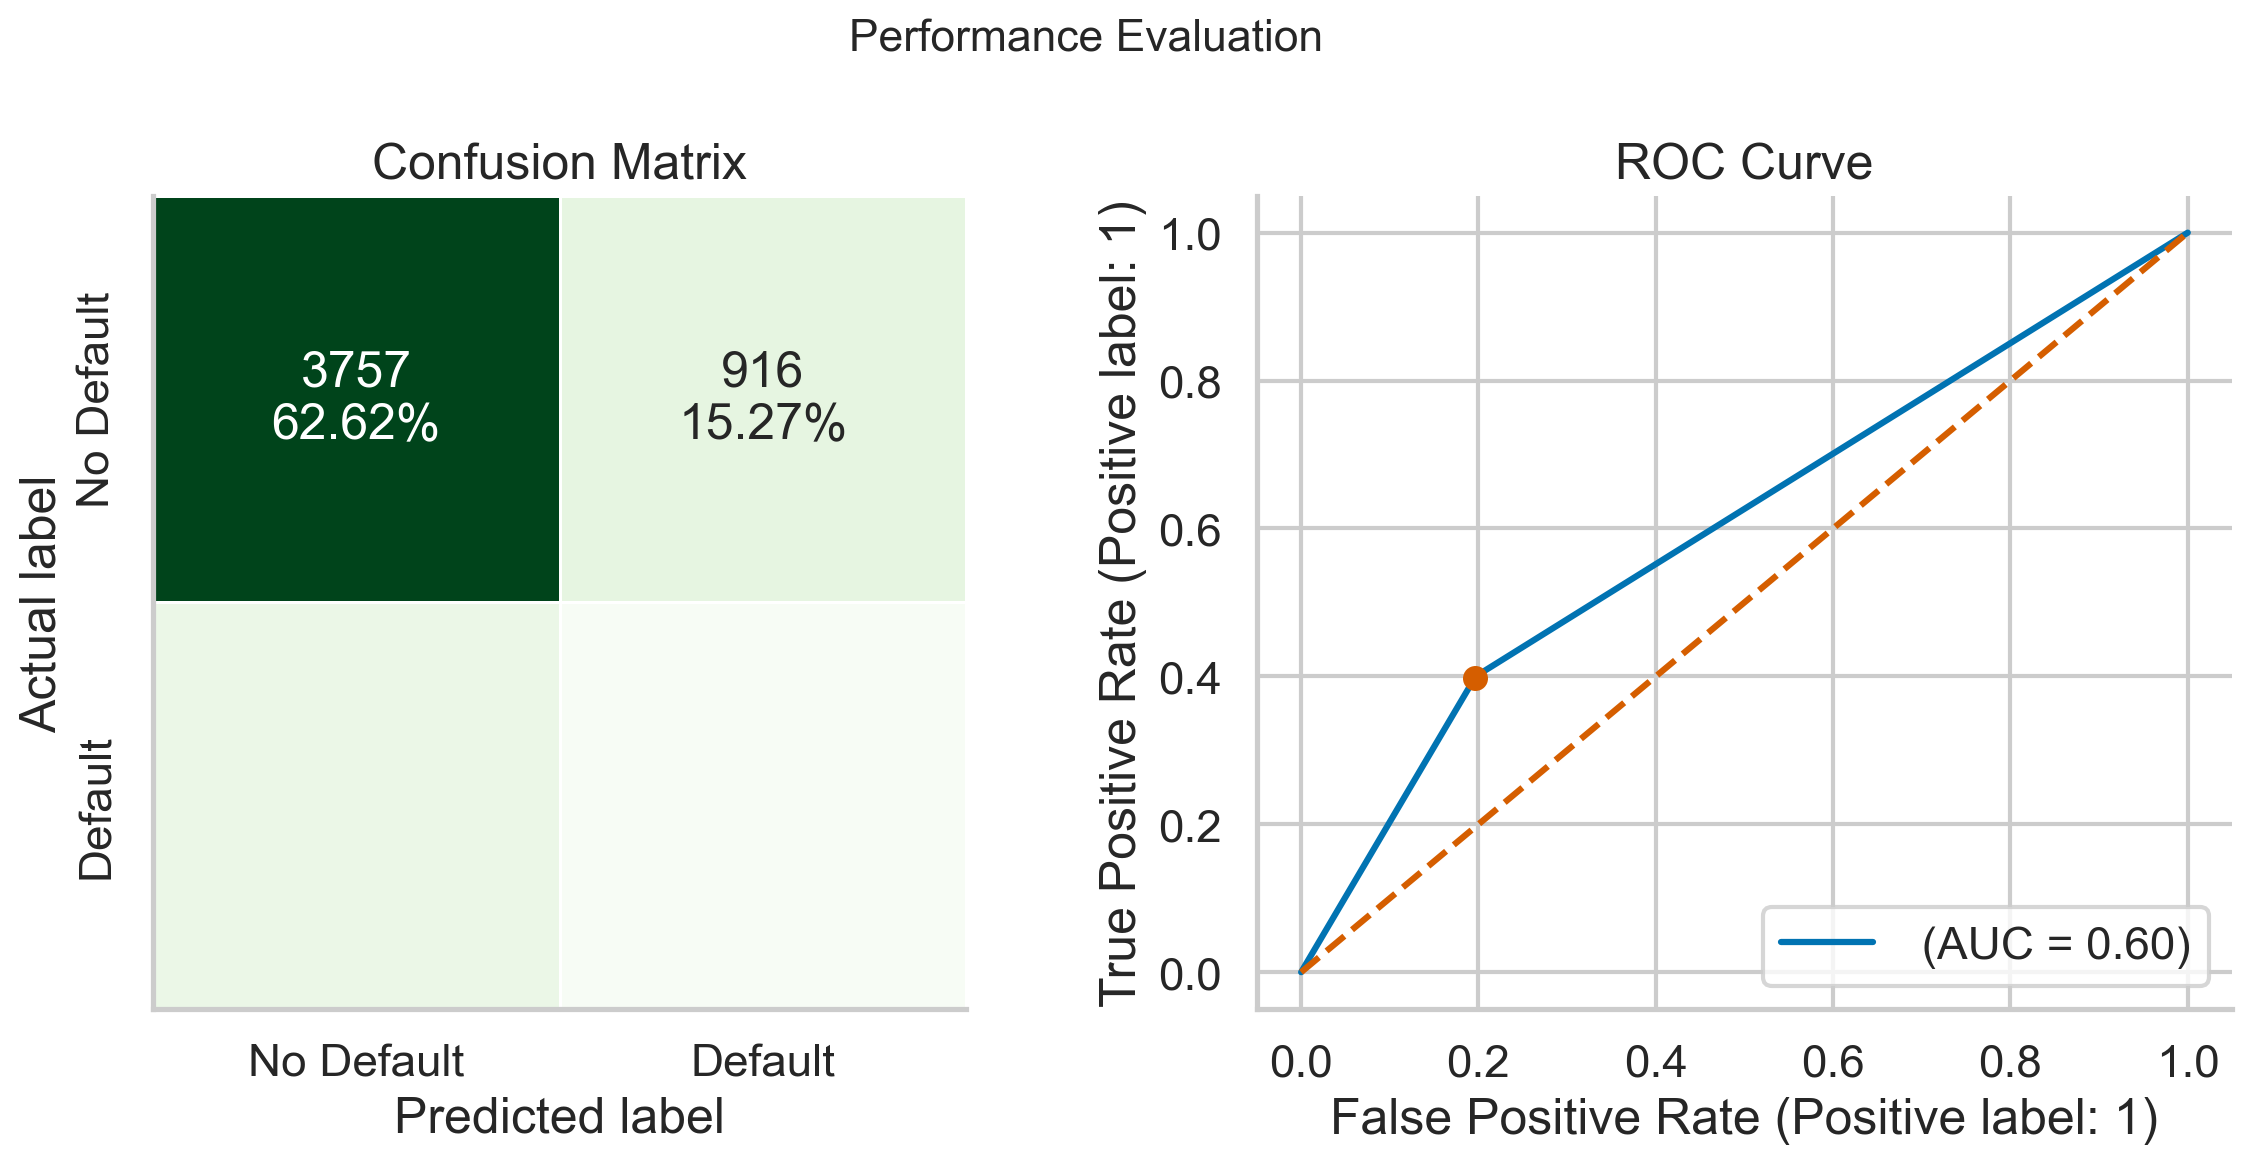

In [6]:
LABELS = ["No Default", "Default"]
tree_perf = performance_evaluation_report(tree_classifier, 
                                          X_test_ohe, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

sns.despine()
plt.tight_layout()

Confusion matrix:
<br>
1. True positive (TP): The model predicts a default, and the clint defaulted.
2. False positive (FP): The model predicts a default, and the clint did not default.
3. True negative (TN): The model predicts a good customer, and the clint did not default.
4. False negative (FN): The model predicts a good customer, and the clint defaulted.


Receiver Operating Characteristic (ROC) curve:
<br>
1. ROC presents a trade-off b/w the true positive rate (Recall) and the false positive rate (1 - Specificity) for different probability thresholds. (see below)
2. A skillful model's curve will close to (0,1) point and away from the diagonal (45°). The diagonal is random guessing.
3. AUC is the area under ROC curve.  The diagonal is 0.5, a skillful model will have a AUC lager than 0.5.


There are more relevant metrics that could help us evaluate the performance of our model.

In [7]:
tree_perf

{'accuracy': 0.7141666666666666,
 'precision': 0.3656509695290859,
 'recall': 0.39788997739261495,
 'specificity': 0.8039803124331265,
 'f1_score': 0.3810898592565861,
 'cohens_kappa': 0.1956931046277427,
 'matthews_corr_coeff': 0.1959883714391891,
 'roc_auc': 0.601583581287813,
 'pr_auc': 0.44877724015824927,
 'average_precision': 0.2789754297204212}

1. Accuracy: (TP + TN) / (TP + FP + TN + FN), measures the model's overall ability to correctly predict.
2. Precision: TP / (TP +FP), when the model predict default, how often it is correct.
3. Recall: TP / (Tp + FN), what fraction of all observed defaults did we predict correctly.
4. Specificity: TN / (TN + FP), what fraction of all good customers did we predict correctly (not default).
5. F-1 Score: A harmonic average of Precision and Recall.
6. matthews_corr_coeff (MCC): has a value between -1 (a classifier always misclassifying) to +1 (a perfect classifier). 0 means ramdom guessing.

6.3 Plot the first few levels of the fitted decision tree:

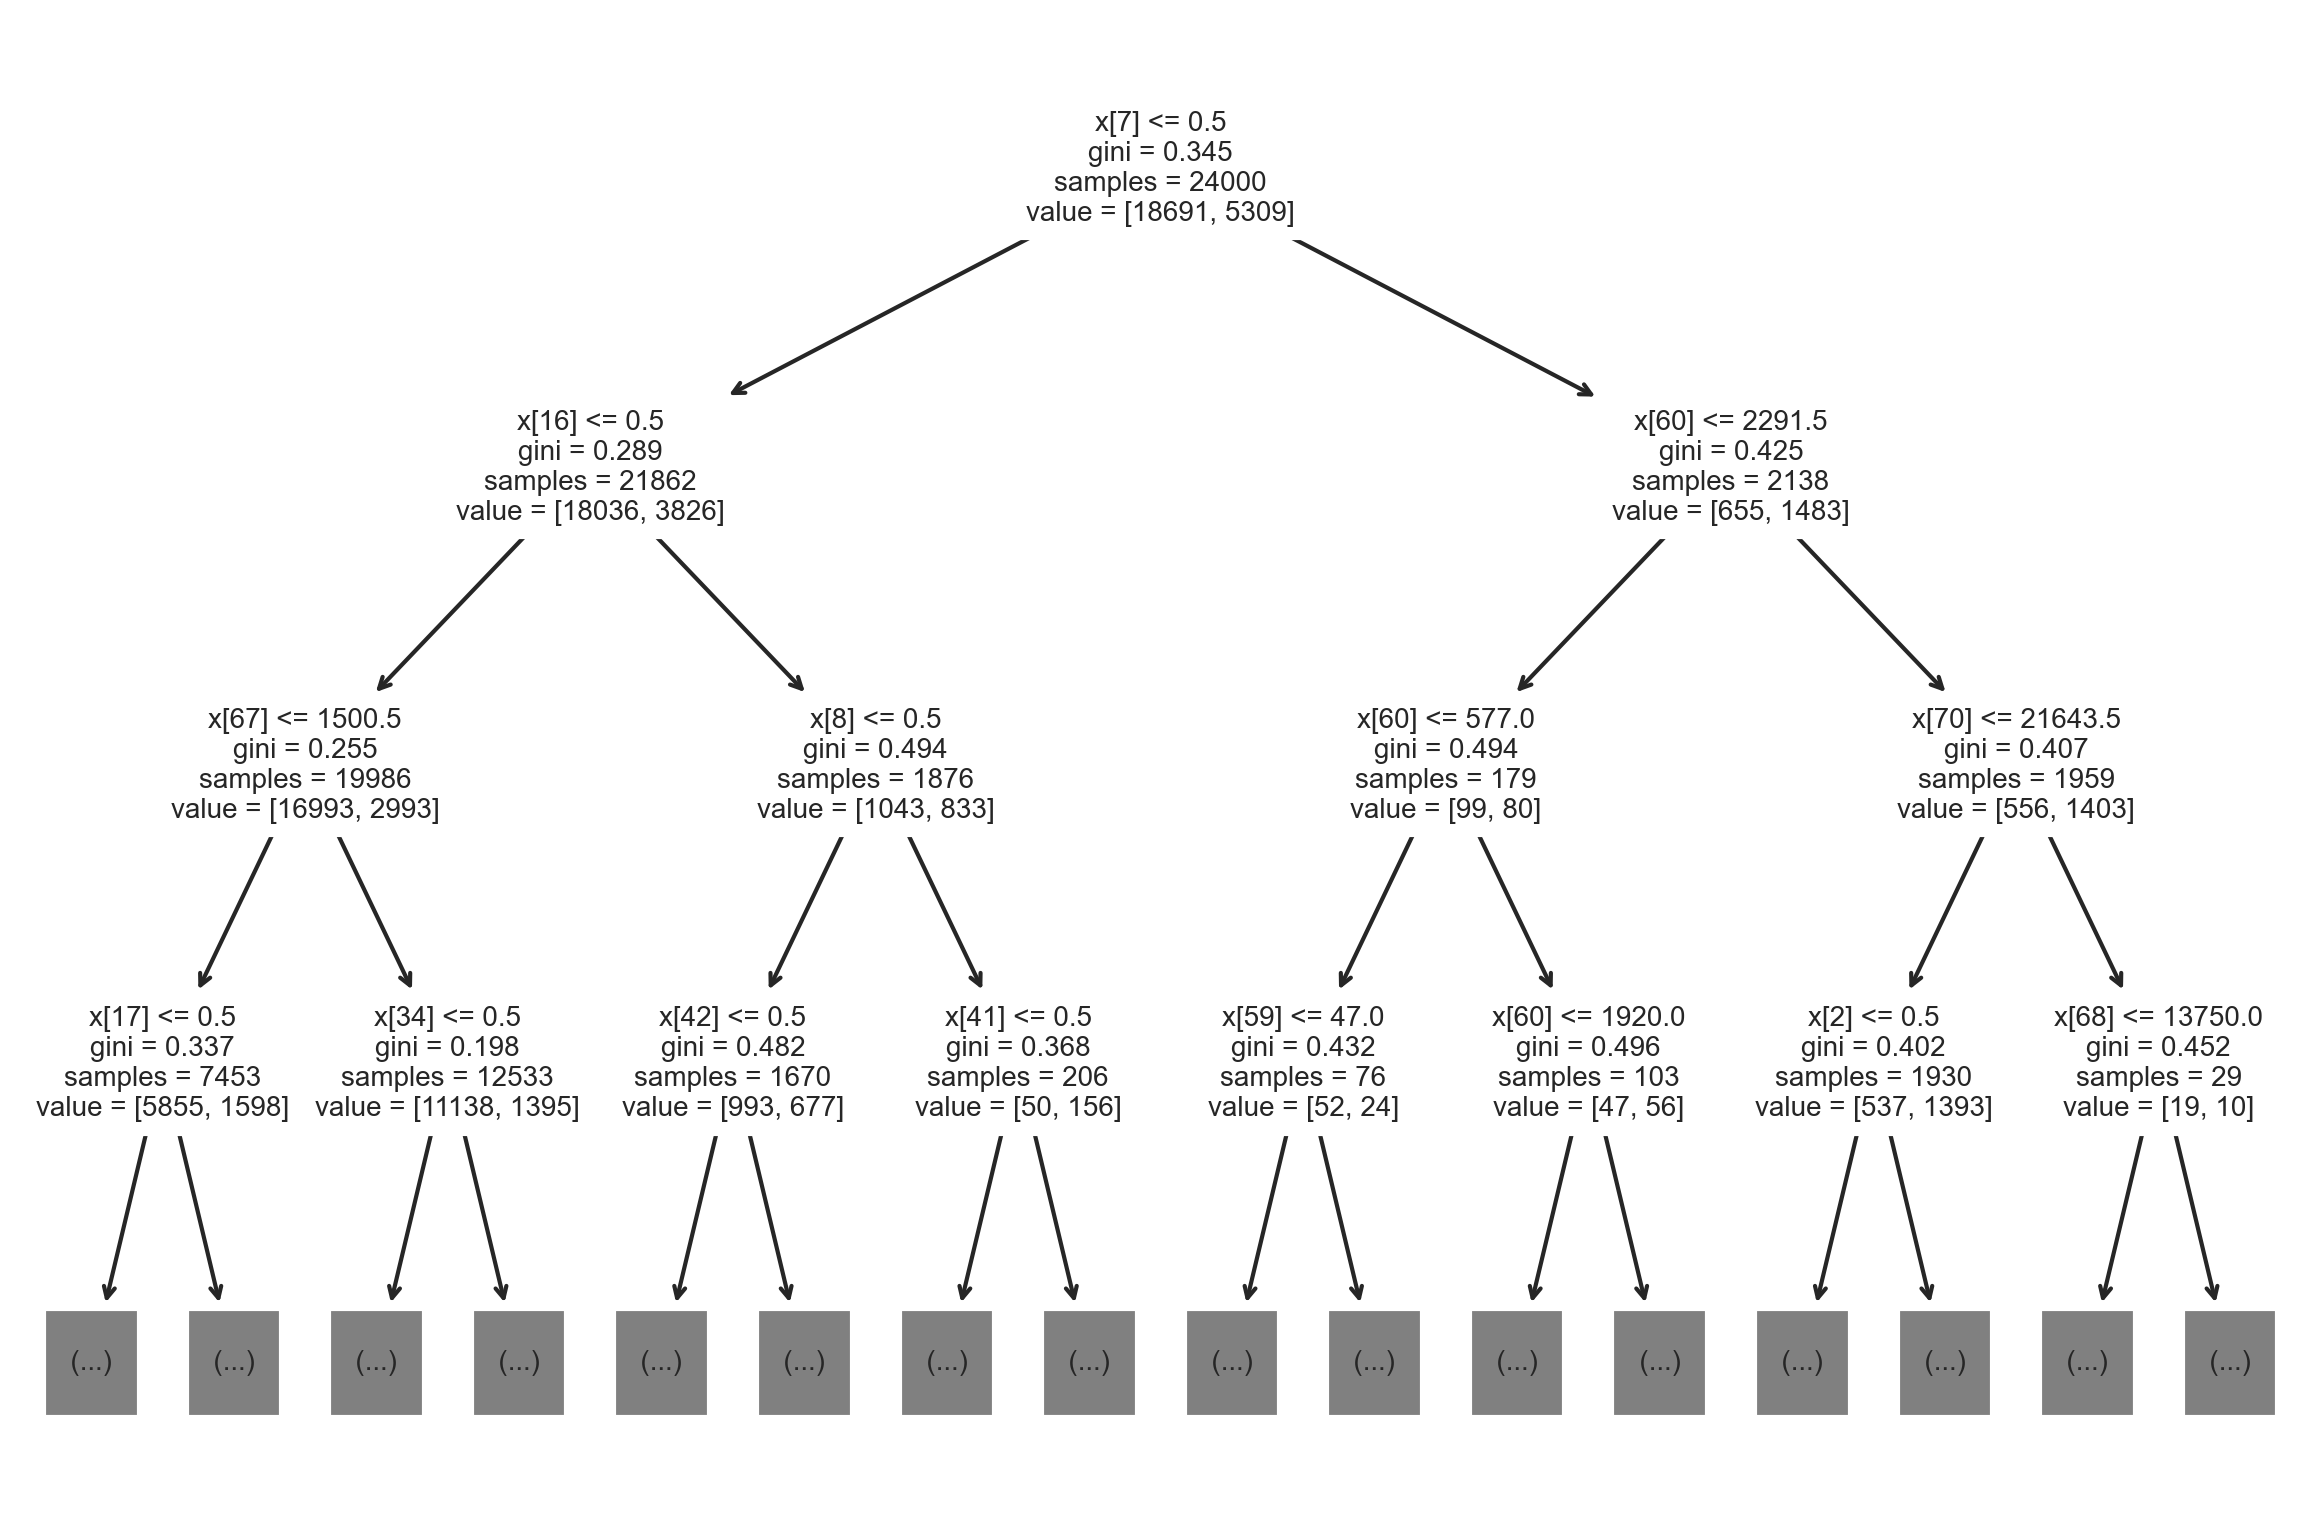

In [8]:
# Here we plot only 3 levels of the decision tree.
plot_tree(tree_classifier, max_depth=3, fontsize=10)

sns.despine()
plt.tight_layout()

In [9]:
# Below, the fitted tree actually reached the depth of 44 levels.
tree_classifier.get_depth()

44

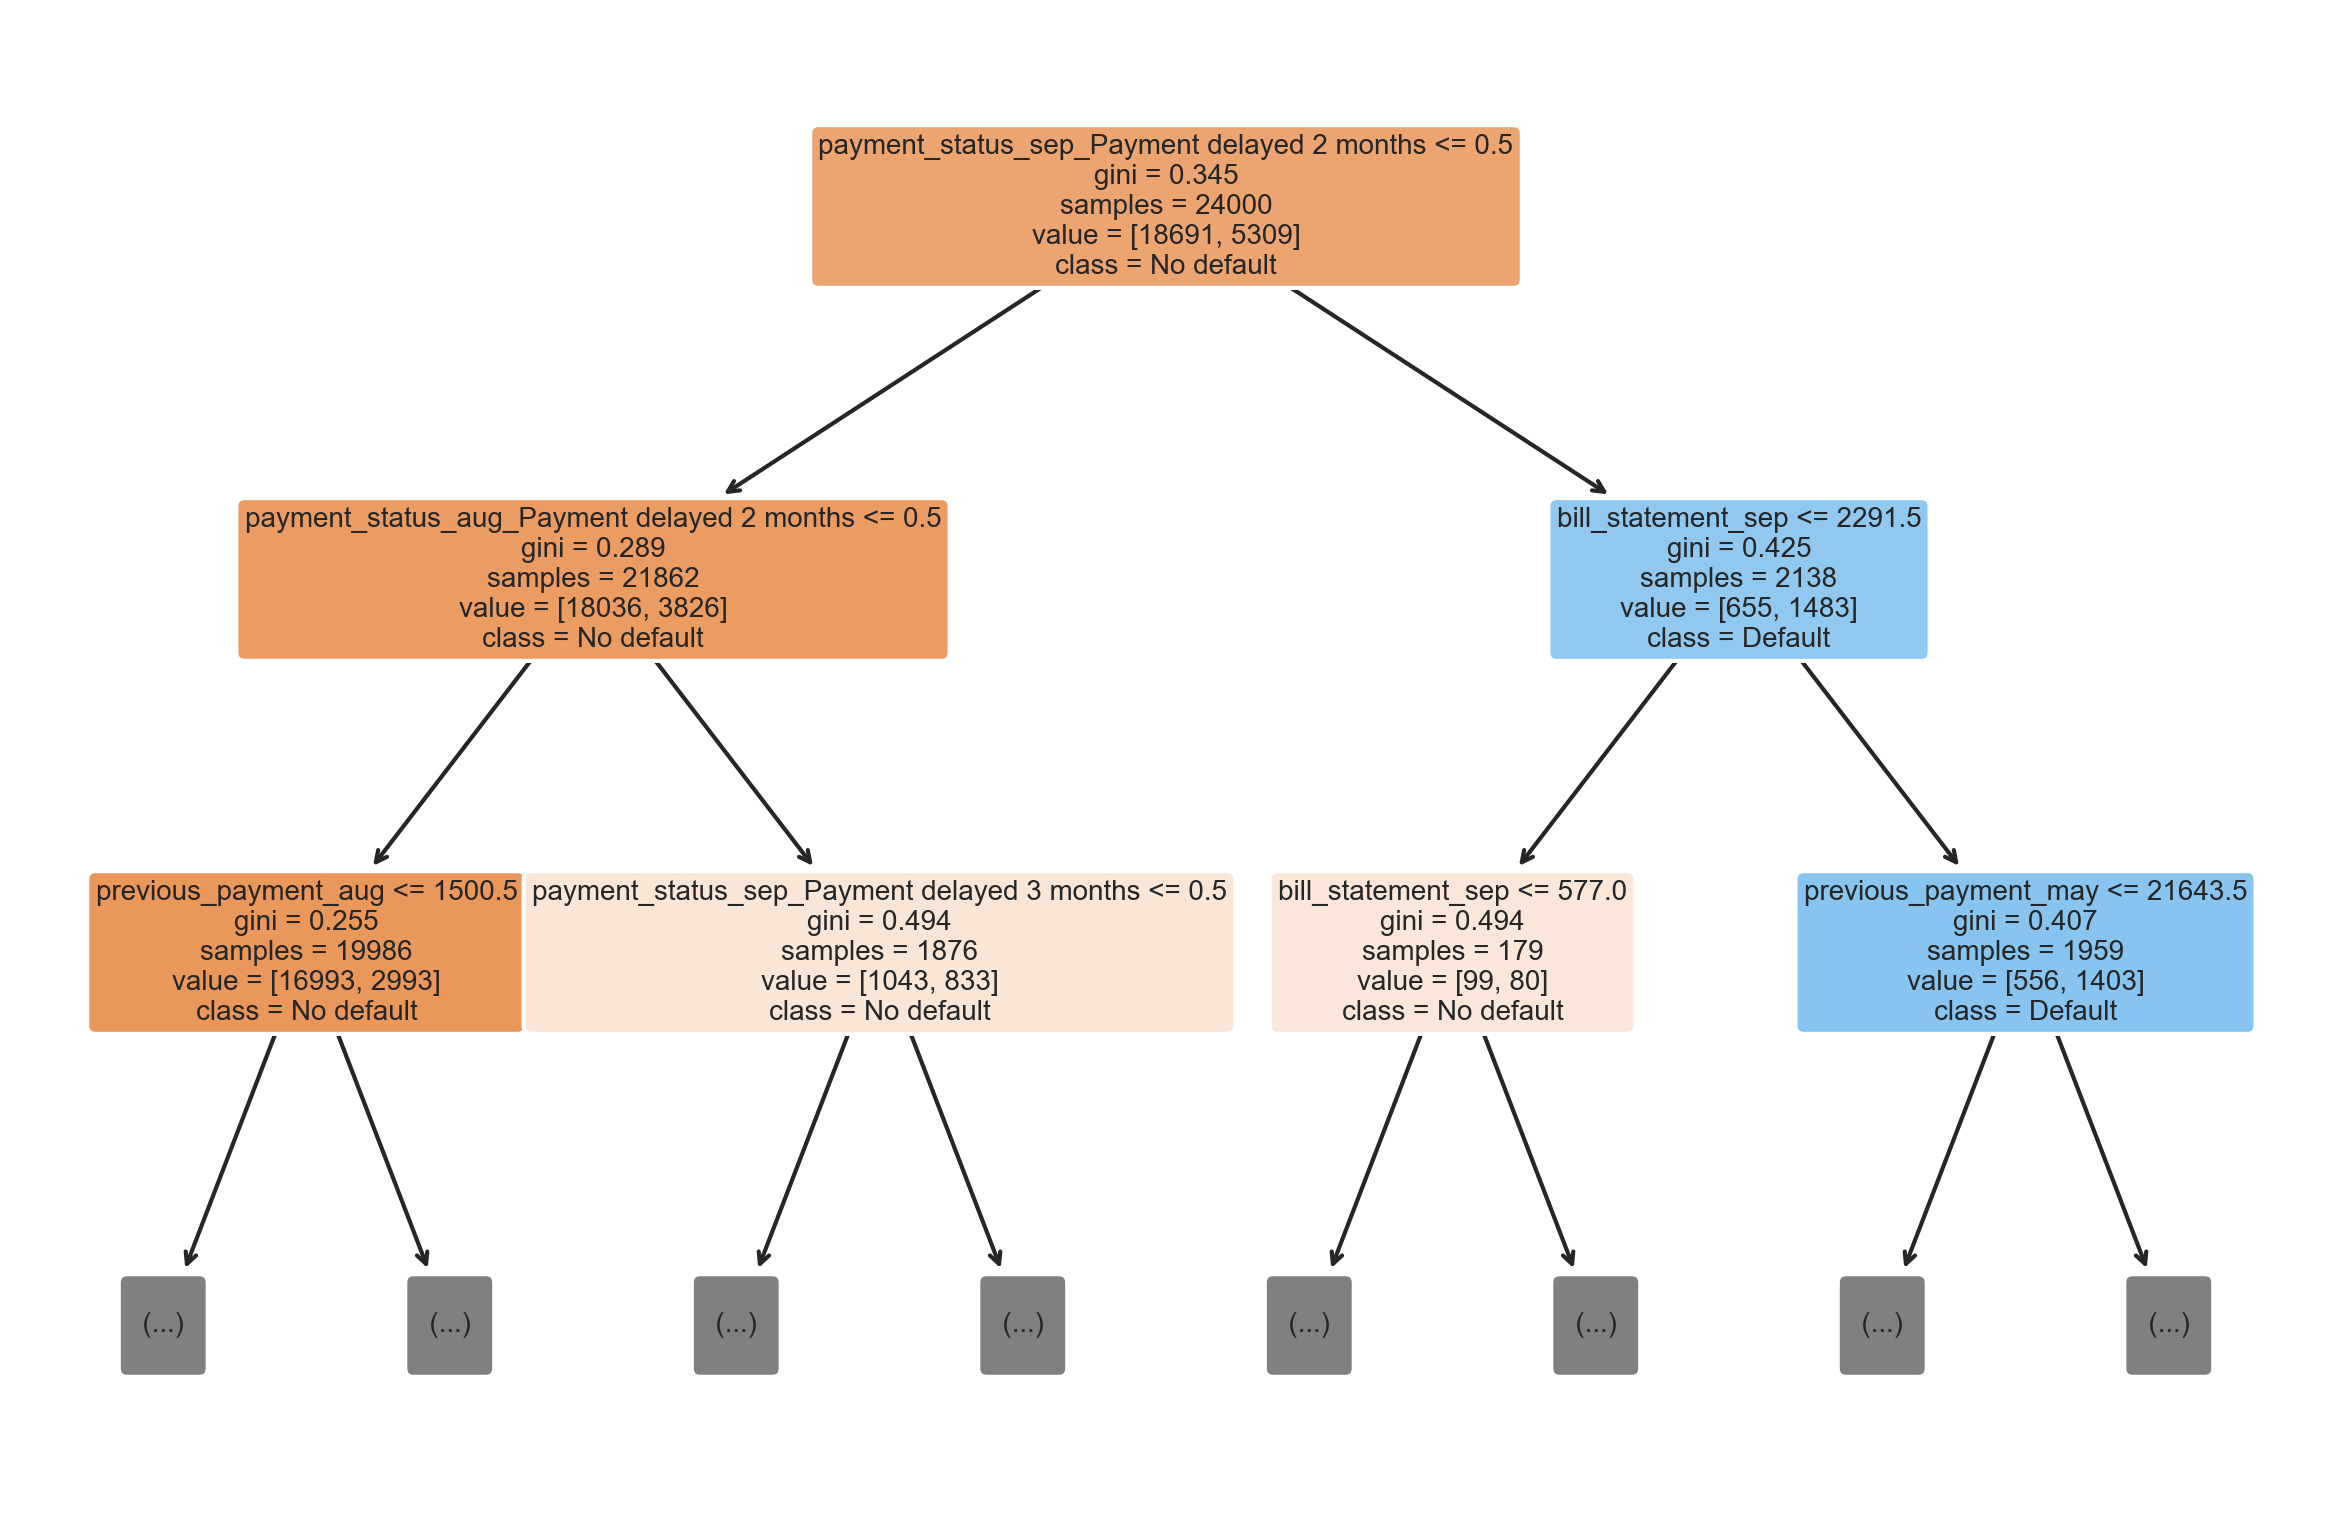

In [10]:
# The plot above only should the culumn number instead of the feature's name.
# We can fix this by setting the `feature_names` parameter to the column names.
plot_tree(
    tree_classifier, 
    max_depth=2,
    feature_names = X_train_ohe.columns.tolist(), 
    class_names=["No default", "Default"],
    rounded=True, 
    filled = True, 
    fontsize=10
)

sns.despine()
plt.tight_layout()